[View in Colaboratory](https://colab.research.google.com/github/harvinder-power/machine-learning/blob/master/image_classifier_xray.ipynb)

#1.  Data Setup
For this code, the data will be used from the Kaggle repository, available here - https://www.kaggle.com/nih-chest-xrays/data

In [2]:
#install kaggle to download data repo
!pip install kaggle
!apt-get install unzip
!pip install pillow

    100% |████████████████████████████████| 51kB 6.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/f1/34/79/fe71f4c2bf112baedf4e5c62e07cdecc018e793c735873afe6
Successfully built kaggle
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [3]:
#Upload Kaggle API key

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes


In [5]:
#Make a .kaggle file, and move the Kaggle API Key there
!mkdir ~/.kaggle
!mv ~/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/content/.kaggle’: File exists


In [4]:
#Download the required dataset (NB the dataset is 42Gb, so will take some time to download!)
!kaggle datasets download -d nih-chest-xrays/data

data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
ls

datalab/  image_dataset/  images/


In [6]:
#Verify all data is present
!unzip images_001.zip -d /content/

unzip:  cannot find or open images_001.zip, images_001.zip.zip or images_001.zip.ZIP.


#2. Moving files to required folders
This stage involves determining which image belongs to which category, and then moving it to the respective folder

In [115]:
'''
import os
import csv
import pandas as pd
from shutil import copyfile
from PIL import Image


data_loc = '/content/datasets/nih-chest-xrays/data/Data_Entry_2017.csv'

#Gets a list of all the classifications present, and adds them to the variable classifications, which is returned.
def get_classification_list(labels_dir):
  labels_data = pd.read_csv(labels_dir)
  findings = labels_data['Finding Labels']

  classifications = []  
  for i in range(len(labels_data)):
    if labels_data.iloc[i,1].split('|')[0] in classifications:
      pass
    else:
      classifications.append(labels_data.iloc[i,1].split('|')[0])

  print (len(classifications), classifications)
  return classifications

#Uses the output from function get_classification_list, and uses it to produce folders if they don't already exist.
def make_classification_folders():  
  classifications = get_classification_list(data_loc)
  for i in range(len(classifications)):
    if os.path.exists('/content/' + classifications[i]):
      pass
    else:
      os.mkdir('/content/' + classifications[i])

      
      
#Checks to see if the first mentioned classification is the same as the classifiction being iterated through in list (j), and if it is, moves the image to the corresponding folder

def move_to_folders(labels_dir, source_folder, sink_folder):
  count = 0
  labels_data = pd.read_csv(labels_dir)
  classifications = get_classification_list(data_loc)
  for i in range(len(labels_data)):
      for j in range(len(classifications)):
          if labels_data.iloc[i,1].split('|')[0] == classifications[j]:
              source_loc = (source_folder + labels_data.iloc[i, 0])
              sink_loc = (sink_folder + classifications[j] + "/" + labels_data.iloc[i, 0])
              if os.path.isfile(source_loc):
                  im = Image.open(source_folder + labels_data.iloc[i, 0])
                  im = im.convert('RGB')
                  filename_with_new_extension = (labels_data.iloc[i, 0]).split('.')[0] + '.jpg'
                  sink_loc = sink_folder + classifications[j] + "/" + filename_with_new_extension
                  copyfile(source_loc, sink_loc)
                  count += 1
                  print ('Images copied = ', count)
              else:
                  pass

          else:
              pass

  print (count)
  

  
  
  
  
get_classification_list(data_loc)
make_classification_folders()

while (count < (len())
move_to_folders(data_loc, '/content/images/', '/content/')
'''

15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
Images copied =  1
Images copied =  2
Images copied =  3
Images copied =  4
Images copied =  5
Images copied =  6
Images copied =  7
Images copied =  8
Images copied =  9
Images copied =  10
Images copied =  11
Images copied =  12
Images copied =  13
Images copied =  14
Images copied =  15
Images copied =  16
Images copied =  17
Images copied =  18
Images copied =  19
Images c


Images copied =  303
Images copied =  304
Images copied =  305
Images copied =  306
Images copied =  307
Images copied =  308
Images copied =  309
Images copied =  310
Images copied =  311
Images copied =  312
Images copied =  313
Images copied =  314
Images copied =  315
Images copied =  316
Images copied =  317
Images copied =  318
Images copied =  319
Images copied =  320
Images copied =  321
Images copied =  322
Images copied =  323
Images copied =  324
Images copied =  325
Images copied =  326
Images copied =  327
Images copied =  328
Images copied =  329
Images copied =  330
Images copied =  331
Images copied =  332
Images copied =  333
Images copied =  334
Images copied =  335
Images copied =  336
Images copied =  337
Images copied =  338
Images copied =  339
Images copied =  340
Images copied =  341
Images copied =  342
Images copied =  343
Images copied =  344
Images copied =  345
Images copied =  346
Images copied =  347
Images copied =  348
Images copied =  349
Images copie

Images copied =  621
Images copied =  622
Images copied =  623
Images copied =  624
Images copied =  625
Images copied =  626
Images copied =  627
Images copied =  628
Images copied =  629
Images copied =  630
Images copied =  631
Images copied =  632
Images copied =  633
Images copied =  634
Images copied =  635
Images copied =  636
Images copied =  637
Images copied =  638
Images copied =  639
Images copied =  640
Images copied =  641
Images copied =  642
Images copied =  643
Images copied =  644
Images copied =  645
Images copied =  646
Images copied =  647
Images copied =  648
Images copied =  649
Images copied =  650
Images copied =  651
Images copied =  652
Images copied =  653
Images copied =  654
Images copied =  655
Images copied =  656
Images copied =  657
Images copied =  658
Images copied =  659
Images copied =  660
Images copied =  661
Images copied =  662
Images copied =  663
Images copied =  664
Images copied =  665
Images copied =  666
Images copied =  667
Images copied

Images copied =  943
Images copied =  944
Images copied =  945
Images copied =  946
Images copied =  947
Images copied =  948
Images copied =  949
Images copied =  950
Images copied =  951
Images copied =  952
Images copied =  953
Images copied =  954
Images copied =  955
Images copied =  956
Images copied =  957
Images copied =  958
Images copied =  959
Images copied =  960
Images copied =  961
Images copied =  962
Images copied =  963
Images copied =  964
Images copied =  965
Images copied =  966
Images copied =  967
Images copied =  968
Images copied =  969
Images copied =  970
Images copied =  971
Images copied =  972
Images copied =  973
Images copied =  974
Images copied =  975
Images copied =  976
Images copied =  977
Images copied =  978
Images copied =  979
Images copied =  980
Images copied =  981
Images copied =  982
Images copied =  983
Images copied =  984
Images copied =  985
Images copied =  986
Images copied =  987
Images copied =  988
Images copied =  989
Images copied

Images copied =  1259
Images copied =  1260
Images copied =  1261
Images copied =  1262
Images copied =  1263
Images copied =  1264
Images copied =  1265
Images copied =  1266
Images copied =  1267
Images copied =  1268
Images copied =  1269
Images copied =  1270
Images copied =  1271
Images copied =  1272
Images copied =  1273
Images copied =  1274
Images copied =  1275
Images copied =  1276
Images copied =  1277
Images copied =  1278
Images copied =  1279
Images copied =  1280
Images copied =  1281
Images copied =  1282
Images copied =  1283
Images copied =  1284
Images copied =  1285
Images copied =  1286
Images copied =  1287
Images copied =  1288
Images copied =  1289
Images copied =  1290
Images copied =  1291
Images copied =  1292
Images copied =  1293
Images copied =  1294
Images copied =  1295
Images copied =  1296
Images copied =  1297
Images copied =  1298
Images copied =  1299
Images copied =  1300
Images copied =  1301
Images copied =  1302
Images copied =  1303
Images cop

Images copied =  1572
Images copied =  1573
Images copied =  1574
Images copied =  1575
Images copied =  1576
Images copied =  1577
Images copied =  1578
Images copied =  1579
Images copied =  1580
Images copied =  1581
Images copied =  1582
Images copied =  1583
Images copied =  1584
Images copied =  1585
Images copied =  1586
Images copied =  1587
Images copied =  1588
Images copied =  1589
Images copied =  1590
Images copied =  1591
Images copied =  1592
Images copied =  1593
Images copied =  1594
Images copied =  1595
Images copied =  1596
Images copied =  1597
Images copied =  1598
Images copied =  1599
Images copied =  1600
Images copied =  1601
Images copied =  1602
Images copied =  1603
Images copied =  1604
Images copied =  1605
Images copied =  1606
Images copied =  1607
Images copied =  1608
Images copied =  1609
Images copied =  1610
Images copied =  1611
Images copied =  1612
Images copied =  1613
Images copied =  1614
Images copied =  1615
Images copied =  1616
Images cop

Images copied =  1890
Images copied =  1891
Images copied =  1892
Images copied =  1893
Images copied =  1894
Images copied =  1895
Images copied =  1896
Images copied =  1897
Images copied =  1898
Images copied =  1899
Images copied =  1900
Images copied =  1901
Images copied =  1902
Images copied =  1903
Images copied =  1904
Images copied =  1905
Images copied =  1906
Images copied =  1907
Images copied =  1908
Images copied =  1909
Images copied =  1910
Images copied =  1911
Images copied =  1912
Images copied =  1913
Images copied =  1914
Images copied =  1915
Images copied =  1916
Images copied =  1917
Images copied =  1918
Images copied =  1919
Images copied =  1920
Images copied =  1921
Images copied =  1922
Images copied =  1923
Images copied =  1924
Images copied =  1925
Images copied =  1926
Images copied =  1927
Images copied =  1928
Images copied =  1929
Images copied =  1930
Images copied =  1931
Images copied =  1932
Images copied =  1933
Images copied =  1934
Images cop

Images copied =  2203
Images copied =  2204
Images copied =  2205
Images copied =  2206
Images copied =  2207
Images copied =  2208
Images copied =  2209
Images copied =  2210
Images copied =  2211
Images copied =  2212
Images copied =  2213
Images copied =  2214
Images copied =  2215
Images copied =  2216
Images copied =  2217
Images copied =  2218
Images copied =  2219
Images copied =  2220
Images copied =  2221
Images copied =  2222
Images copied =  2223
Images copied =  2224
Images copied =  2225
Images copied =  2226
Images copied =  2227
Images copied =  2228
Images copied =  2229
Images copied =  2230
Images copied =  2231
Images copied =  2232
Images copied =  2233
Images copied =  2234
Images copied =  2235
Images copied =  2236
Images copied =  2237
Images copied =  2238
Images copied =  2239
Images copied =  2240
Images copied =  2241
Images copied =  2242
Images copied =  2243
Images copied =  2244
Images copied =  2245
Images copied =  2246
Images copied =  2247
Images cop

Images copied =  2519
Images copied =  2520
Images copied =  2521
Images copied =  2522
Images copied =  2523
Images copied =  2524
Images copied =  2525
Images copied =  2526
Images copied =  2527
Images copied =  2528
Images copied =  2529
Images copied =  2530
Images copied =  2531
Images copied =  2532
Images copied =  2533
Images copied =  2534
Images copied =  2535
Images copied =  2536
Images copied =  2537
Images copied =  2538
Images copied =  2539
Images copied =  2540
Images copied =  2541
Images copied =  2542
Images copied =  2543
Images copied =  2544
Images copied =  2545
Images copied =  2546
Images copied =  2547
Images copied =  2548
Images copied =  2549
Images copied =  2550
Images copied =  2551
Images copied =  2552
Images copied =  2553
Images copied =  2554
Images copied =  2555
Images copied =  2556
Images copied =  2557
Images copied =  2558
Images copied =  2559
Images copied =  2560
Images copied =  2561
Images copied =  2562
Images copied =  2563
Images cop

 2835
Images copied =  2836
Images copied =  2837
Images copied =  2838
Images copied =  2839
Images copied =  2840
Images copied =  2841
Images copied =  2842
Images copied =  2843
Images copied =  2844
Images copied =  2845
Images copied =  2846
Images copied =  2847
Images copied =  2848
Images copied =  2849
Images copied =  2850
Images copied =  2851
Images copied =  2852
Images copied =  2853
Images copied =  2854
Images copied =  2855
Images copied =  2856
Images copied =  2857
Images copied =  2858
Images copied =  2859
Images copied =  2860
Images copied =  2861
Images copied =  2862
Images copied =  2863
Images copied =  2864
Images copied =  2865
Images copied =  2866
Images copied =  2867
Images copied =  2868
Images copied =  2869
Images copied =  2870
Images copied =  2871
Images copied =  2872
Images copied =  2873
Images copied =  2874
Images copied =  2875
Images copied =  2876
Images copied =  2877
Images copied =  2878
Images copied =  2879
Images copied =  2880
Imag

Images copied =  3144
Images copied =  3145
Images copied =  3146
Images copied =  3147
Images copied =  3148
Images copied =  3149
Images copied =  3150
Images copied =  3151
Images copied =  3152
Images copied =  3153
Images copied =  3154
Images copied =  3155
Images copied =  3156
Images copied =  3157
Images copied =  3158
Images copied =  3159
Images copied =  3160
Images copied =  3161
Images copied =  3162
Images copied =  3163
Images copied =  3164
Images copied =  3165
Images copied =  3166
Images copied =  3167
Images copied =  3168
Images copied =  3169
Images copied =  3170
Images copied =  3171
Images copied =  3172
Images copied =  3173
Images copied =  3174
Images copied =  3175
Images copied =  3176
Images copied =  3177
Images copied =  3178
Images copied =  3179
Images copied =  3180
Images copied =  3181
Images copied =  3182
Images copied =  3183
Images copied =  3184
Images copied =  3185
Images copied =  3186
Images copied =  3187
Images copied =  3188
Images cop

Images copied =  3458
Images copied =  3459
Images copied =  3460
Images copied =  3461
Images copied =  3462
Images copied =  3463
Images copied =  3464
Images copied =  3465
Images copied =  3466
Images copied =  3467
Images copied =  3468
Images copied =  3469
Images copied =  3470
Images copied =  3471
Images copied =  3472
Images copied =  3473
Images copied =  3474
Images copied =  3475
Images copied =  3476
Images copied =  3477
Images copied =  3478
Images copied =  3479
Images copied =  3480
Images copied =  3481
Images copied =  3482
Images copied =  3483
Images copied =  3484
Images copied =  3485
Images copied =  3486
Images copied =  3487
Images copied =  3488
Images copied =  3489
Images copied =  3490
Images copied =  3491
Images copied =  3492
Images copied =  3493
Images copied =  3494
Images copied =  3495
Images copied =  3496
Images copied =  3497
Images copied =  3498
Images copied =  3499
Images copied =  3500
Images copied =  3501
Images copied =  3502
Images cop

Images copied =  3769
Images copied =  3770
Images copied =  3771
Images copied =  3772
Images copied =  3773
Images copied =  3774
Images copied =  3775
Images copied =  3776
Images copied =  3777
Images copied =  3778
Images copied =  3779
Images copied =  3780
Images copied =  3781
Images copied =  3782
Images copied =  3783
Images copied =  3784
Images copied =  3785
Images copied =  3786
Images copied =  3787
Images copied =  3788
Images copied =  3789
Images copied =  3790
Images copied =  3791
Images copied =  3792
Images copied =  3793
Images copied =  3794
Images copied =  3795
Images copied =  3796
Images copied =  3797
Images copied =  3798
Images copied =  3799
Images copied =  3800
Images copied =  3801
Images copied =  3802
Images copied =  3803
Images copied =  3804
Images copied =  3805
Images copied =  3806
Images copied =  3807
Images copied =  3808
Images copied =  3809
Images copied =  3810
Images copied =  3811
Images copied =  3812
Images copied =  3813
Images cop

Images copied =  4088
Images copied =  4089
Images copied =  4090
Images copied =  4091
Images copied =  4092
Images copied =  4093
Images copied =  4094
Images copied =  4095
Images copied =  4096
Images copied =  4097
Images copied =  4098
Images copied =  4099
Images copied =  4100
Images copied =  4101
Images copied =  4102
Images copied =  4103
Images copied =  4104
Images copied =  4105
Images copied =  4106
Images copied =  4107
Images copied =  4108
Images copied =  4109
Images copied =  4110
Images copied =  4111
Images copied =  4112
Images copied =  4113
Images copied =  4114
Images copied =  4115
Images copied =  4116
Images copied =  4117
Images copied =  4118
Images copied =  4119
Images copied =  4120
Images copied =  4121
Images copied =  4122
Images copied =  4123
Images copied =  4124
Images copied =  4125
Images copied =  4126
Images copied =  4127
Images copied =  4128
Images copied =  4129
Images copied =  4130
Images copied =  4131
Images copied =  4132
Images cop


Images copied =  4406
Images copied =  4407
Images copied =  4408
Images copied =  4409
Images copied =  4410
Images copied =  4411
Images copied =  4412
Images copied =  4413
Images copied =  4414
Images copied =  4415
Images copied =  4416
Images copied =  4417
Images copied =  4418
Images copied =  4419
Images copied =  4420
Images copied =  4421
Images copied =  4422
Images copied =  4423
Images copied =  4424
Images copied =  4425
Images copied =  4426
Images copied =  4427
Images copied =  4428
Images copied =  4429
Images copied =  4430
Images copied =  4431
Images copied =  4432
Images copied =  4433
Images copied =  4434
Images copied =  4435
Images copied =  4436
Images copied =  4437
Images copied =  4438
Images copied =  4439
Images copied =  4440
Images copied =  4441
Images copied =  4442
Images copied =  4443
Images copied =  4444
Images copied =  4445
Images copied =  4446
Images copied =  4447
Images copied =  4448
Images copied =  4449
Images copied =  4450
Images co

Images copied =  4725
Images copied =  4726
Images copied =  4727
Images copied =  4728
Images copied =  4729
Images copied =  4730
Images copied =  4731
Images copied =  4732
Images copied =  4733
Images copied =  4734
Images copied =  4735
Images copied =  4736
Images copied =  4737
Images copied =  4738
Images copied =  4739
Images copied =  4740
Images copied =  4741
Images copied =  4742
Images copied =  4743
Images copied =  4744
Images copied =  4745
Images copied =  4746
Images copied =  4747
Images copied =  4748
Images copied =  4749
Images copied =  4750
Images copied =  4751
Images copied =  4752
Images copied =  4753
Images copied =  4754
Images copied =  4755
Images copied =  4756
Images copied =  4757
Images copied =  4758
Images copied =  4759
Images copied =  4760
Images copied =  4761
Images copied =  4762
Images copied =  4763
Images copied =  4764
Images copied =  4765
Images copied =  4766
Images copied =  4767
Images copied =  4768
Images copied =  4769
Images cop

In [1]:
Image.open('00000032_028.jpg')

NameError: ignored

In [0]:
!pip install pandas
!pip install shutil
!pip install pillow
!pip install fastai
!mkdir image_dataset

  Could not find a version that satisfies the requirement shutil (from versions: )
No matching distribution found for shutil
    100% |████████████████████████████████| 122kB 8.3MB/s 
    100% |████████████████████████████████| 61kB 22.1MB/s 
    100% |████████████████████████████████| 2.2MB 12.1MB/s 
    100% |████████████████████████████████| 174kB 23.0MB/s 
    100% |████████████████████████████████| 112kB 25.7MB/s 
    100% |████████████████████████████████| 51kB 17.1MB/s 


    100% |████████████████████████████████| 1.5MB 14.1MB/s 
    100% |████████████████████████████████| 3.4MB 11.4MB/s 
    20% |██████▊                         | 104.0MB 33.6MB/s eta 0:00:12

    100% |████████████████████████████████| 496.4MB 27kB/s 
    100% |████████████████████████████████| 112kB 24.4MB/s 
    100% |████████████████████████████████| 13.7MB 4.5MB/s 
    100% |████████████████████████████████| 92kB 20.9MB/s 
    100% |████████████████████████████████| 71kB 19.1MB/s 
    100% |████████████████████████████████| 81kB 17.5MB/s 
  Running setup.py bdist_wheel for feather-format ... - \ done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for torchtext ... - \

 done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for bcolz ... - \ | /

In [0]:
#Modified script to split data in half between test and train folders

import os
import csv
import pandas as pd
from shutil import copyfile
from PIL import Image


data_loc = '/content/.kaggle/datasets/nih-chest-xrays/data/Data_Entry_2017.csv'
train_split = 0.9

#Gets a list of all the classifications present, and adds them to the variable classifications, which is returned.
def get_classification_list(labels_dir):
  labels_data = pd.read_csv(labels_dir)
  findings = labels_data['Finding Labels']

  classifications = []  
  for i in range(len(labels_data)):
    if labels_data.iloc[i,1].split('|')[0] in classifications:
      pass
    else:
      classifications.append(labels_data.iloc[i,1].split('|')[0])

  print (len(classifications), classifications)
  return classifications

#Uses the output from function get_classification_list, and uses it to produce folders if they don't already exist.
def make_classification_folders():  
  classifications = get_classification_list(data_loc)
  for i in range(len(classifications)):
    if os.path.exists('/content/' + classifications[i]):
      pass
    else:
      os.mkdir('/content/image_dataset/validation/' + classifications[i])
      os.mkdir('/content/image_dataset/train/' + classifications[i])

      
      
#Checks to see if the first mentioned classification is the same as the classifiction being iterated through in list (j), and if it is, moves the image to the corresponding folder

def move_to_folders(labels_dir, source_folder, sink_folder):
  count = 0
  labels_data = pd.read_csv(labels_dir)
  classifications = get_classification_list(data_loc)
  for i in range(len(labels_data)):
      for j in range(len(classifications)):
          if labels_data.iloc[i,1].split('|')[0] == classifications[j]:
              source_loc = (source_folder + labels_data.iloc[i, 0])
              sink_loc = (sink_folder + classifications[j] + "/" + labels_data.iloc[i, 0])
              if os.path.isfile(source_loc):
                  im = Image.open(source_folder + labels_data.iloc[i, 0])
                  im = im.convert('RGB')
                  filename_with_new_extension = (labels_data.iloc[i, 0]).split('.')[0] + '.jpg'
                  sink_loc = sink_folder + classifications[j] + "/" + filename_with_new_extension
                  copyfile(source_loc, sink_loc)
                  count += 1
                  print ('Images copied = ', count)
              else:
                  pass

          else:
              pass

  print (count)
  

  
  
  
get_classification_list(data_loc)
make_classification_folders()

counter = 0
while (counter < ((int(len(pd.read_csv(data_loc)))*train_split))):
    move_to_folders(data_loc, '/content/images/', '/content/image_dataset/train/')
    counter += 1
if (counter < ((int(len(pd.read_csv(data_loc)))*(1-train_split)))):
    move_to_folders(data_loc, '/content/images/', '/content/image_dataset/validation/')
    counter += 1

15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
Images copied =  1
Images copied =  2
Images copied =  3
Images copied =  4
Images copied =  5
Images copied =  6
Images copied =  7
Images copied =  8
Images copied =  9
Images copied =  10
Images copied =  11
Images copied =  12
Images copied =  13
Images copied =  14
Images copied =  15
Images copied =  16
Images copied =  17
Images copied =  18
Images copied =  19
Images c

Images copied =  316
Images copied =  317
Images copied =  318
Images copied =  319
Images copied =  320
Images copied =  321
Images copied =  322
Images copied =  323
Images copied =  324
Images copied =  325
Images copied =  326
Images copied =  327
Images copied =  328
Images copied =  329
Images copied =  330
Images copied =  331
Images copied =  332
Images copied =  333
Images copied =  334
Images copied =  335
Images copied =  336
Images copied =  337
Images copied =  338
Images copied =  339
Images copied =  340
Images copied =  341
Images copied =  342
Images copied =  343
Images copied =  344
Images copied =  345
Images copied =  346
Images copied =  347
Images copied =  348
Images copied =  349
Images copied =  350
Images copied =  351
Images copied =  352
Images copied =  353
Images copied =  354
Images copied =  355
Images copied =  356
Images copied =  357
Images copied =  358
Images copied =  359
Images copied =  360
Images copied =  361
Images copied =  362
Images copied

Images copied =  647
Images copied =  648
Images copied =  649
Images copied =  650
Images copied =  651
Images copied =  652
Images copied =  653
Images copied =  654
Images copied =  655
Images copied =  656
Images copied =  657
Images copied =  658
Images copied =  659
Images copied =  660
Images copied =  661
Images copied =  662
Images copied =  663
Images copied =  664
Images copied =  665
Images copied =  666
Images copied =  667
Images copied =  668
Images copied =  669
Images copied =  670
Images copied =  671
Images copied =  672
Images copied =  673
Images copied =  674
Images copied =  675
Images copied =  676
Images copied =  677
Images copied =  678
Images copied =  679
Images copied =  680
Images copied =  681
Images copied =  682
Images copied =  683
Images copied =  684
Images copied =  685
Images copied =  686
Images copied =  687
Images copied =  688
Images copied =  689
Images copied =  690
Images copied =  691
Images copied =  692
Images copied =  693
Images copied

Images copied =  981
Images copied =  982
Images copied =  983
Images copied =  984
Images copied =  985
Images copied =  986
Images copied =  987
Images copied =  988
Images copied =  989
Images copied =  990
Images copied =  991
Images copied =  992
Images copied =  993
Images copied =  994
Images copied =  995
Images copied =  996
Images copied =  997
Images copied =  998
Images copied =  999
Images copied =  1000
Images copied =  1001
Images copied =  1002
Images copied =  1003
Images copied =  1004
Images copied =  1005
Images copied =  1006
Images copied =  1007
Images copied =  1008
Images copied =  1009
Images copied =  1010
Images copied =  1011
Images copied =  1012
Images copied =  1013
Images copied =  1014
Images copied =  1015
Images copied =  1016
Images copied =  1017
Images copied =  1018
Images copied =  1019
Images copied =  1020
Images copied =  1021
Images copied =  1022
Images copied =  1023
Images copied =  1024
Images copied =  1025
Images copied =  1026
Images 

Images copied =  1307
Images copied =  1308
Images copied =  1309
Images copied =  1310
Images copied =  1311
Images copied =  1312
Images copied =  1313
Images copied =  1314
Images copied =  1315
Images copied =  1316
Images copied =  1317
Images copied =  1318
Images copied =  1319
Images copied =  1320
Images copied =  1321
Images copied =  1322
Images copied =  1323
Images copied =  1324
Images copied =  1325
Images copied =  1326
Images copied =  1327
Images copied =  1328
Images copied =  1329
Images copied =  1330
Images copied =  1331
Images copied =  1332
Images copied =  1333
Images copied =  1334
Images copied =  1335
Images copied =  1336
Images copied =  1337
Images copied =  1338
Images copied =  1339
Images copied =  1340
Images copied =  1341
Images copied =  1342
Images copied =  1343
Images copied =  1344
Images copied =  1345
Images copied =  1346
Images copied =  1347
Images copied =  1348
Images copied =  1349
Images copied =  1350
Images copied =  1351
Images cop

Images copied =  1635
Images copied =  1636
Images copied =  1637
Images copied =  1638
Images copied =  1639
Images copied =  1640
Images copied =  1641
Images copied =  1642
Images copied =  1643
Images copied =  1644
Images copied =  1645
Images copied =  1646
Images copied =  1647
Images copied =  1648
Images copied =  1649
Images copied =  1650
Images copied =  1651
Images copied =  1652
Images copied =  1653
Images copied =  1654
Images copied =  1655
Images copied =  1656
Images copied =  1657
Images copied =  1658
Images copied =  1659
Images copied =  1660
Images copied =  1661
Images copied =  1662
Images copied =  1663
Images copied =  1664
Images copied =  1665
Images copied =  1666
Images copied =  1667
Images copied =  1668
Images copied =  1669
Images copied =  1670
Images copied =  1671
Images copied =  1672
Images copied =  1673
Images copied =  1674
Images copied =  1675
Images copied =  1676
Images copied =  1677
Images copied =  1678
Images copied =  1679
Images cop

Images copied =  1961
Images copied =  1962
Images copied =  1963
Images copied =  1964
Images copied =  1965
Images copied =  1966
Images copied =  1967
Images copied =  1968
Images copied =  1969
Images copied =  1970
Images copied =  1971
Images copied =  1972
Images copied =  1973
Images copied =  1974
Images copied =  1975
Images copied =  1976
Images copied =  1977
Images copied =  1978
Images copied =  1979
Images copied =  1980
Images copied =  1981
Images copied =  1982
Images copied =  1983
Images copied =  1984
Images copied =  1985
Images copied =  1986
Images copied =  1987
Images copied =  1988
Images copied =  1989
Images copied =  1990
Images copied =  1991
Images copied =  1992
Images copied =  1993
Images copied =  1994
Images copied =  1995
Images copied =  1996
Images copied =  1997
Images copied =  1998
Images copied =  1999
Images copied =  2000
Images copied =  2001
Images copied =  2002
Images copied =  2003
Images copied =  2004
Images copied =  2005
Images cop

Images copied =  2304
Images copied =  2305
Images copied =  2306
Images copied =  2307
Images copied =  2308
Images copied =  2309
Images copied =  2310
Images copied =  2311
Images copied =  2312
Images copied =  2313
Images copied =  2314
Images copied =  2315
Images copied =  2316
Images copied =  2317
Images copied =  2318
Images copied =  2319
Images copied =  2320
Images copied =  2321
Images copied =  2322
Images copied =  2323
Images copied =  2324
Images copied =  2325
Images copied =  2326
Images copied =  2327
Images copied =  2328
Images copied =  2329
Images copied =  2330
Images copied =  2331
Images copied =  2332
Images copied =  2333
Images copied =  2334
Images copied =  2335
Images copied =  2336
Images copied =  2337
Images copied =  2338
Images copied =  2339
Images copied =  2340
Images copied =  2341
Images copied =  2342
Images copied =  2343
Images copied =  2344
Images copied =  2345
Images copied =  2346
Images copied =  2347
Images copied =  2348
Images cop

Images copied =  2644
Images copied =  2645
Images copied =  2646
Images copied =  2647
Images copied =  2648
Images copied =  2649
Images copied =  2650
Images copied =  2651
Images copied =  2652
Images copied =  2653
Images copied =  2654
Images copied =  2655
Images copied =  2656
Images copied =  2657
Images copied =  2658
Images copied =  2659
Images copied =  2660
Images copied =  2661
Images copied =  2662
Images copied =  2663
Images copied =  2664
Images copied =  2665
Images copied =  2666
Images copied =  2667
Images copied =  2668
Images copied =  2669
Images copied =  2670
Images copied =  2671
Images copied =  2672
Images copied =  2673
Images copied =  2674
Images copied =  2675
Images copied =  2676
Images copied =  2677
Images copied =  2678
Images copied =  2679
Images copied =  2680
Images copied =  2681
Images copied =  2682
Images copied =  2683
Images copied =  2684
Images copied =  2685
Images copied =  2686
Images copied =  2687
Images copied =  2688
Images cop

Images copied =  2979
Images copied =  2980
Images copied =  2981
Images copied =  2982
Images copied =  2983
Images copied =  2984
Images copied =  2985
Images copied =  2986
Images copied =  2987
Images copied =  2988
Images copied =  2989
Images copied =  2990
Images copied =  2991
Images copied =  2992
Images copied =  2993
Images copied =  2994
Images copied =  2995
Images copied =  2996
Images copied =  2997
Images copied =  2998
Images copied =  2999
Images copied =  3000
Images copied =  3001
Images copied =  3002
Images copied =  3003
Images copied =  3004
Images copied =  3005
Images copied =  3006
Images copied =  3007
Images copied =  3008
Images copied =  3009
Images copied =  3010
Images copied =  3011
Images copied =  3012
Images copied =  3013
Images copied =  3014
Images copied =  3015
Images copied =  3016
Images copied =  3017
Images copied =  3018
Images copied =  3019
Images copied =  3020
Images copied =  3021
Images copied =  3022
Images copied =  3023
Images cop

Images copied =  3309
Images copied =  3310
Images copied =  3311
Images copied =  3312
Images copied =  3313
Images copied =  3314
Images copied =  3315
Images copied =  3316
Images copied =  3317
Images copied =  3318
Images copied =  3319
Images copied =  3320
Images copied =  3321
Images copied =  3322
Images copied =  3323
Images copied =  3324
Images copied =  3325
Images copied =  3326
Images copied =  3327
Images copied =  3328
Images copied =  3329
Images copied =  3330
Images copied =  3331
Images copied =  3332
Images copied =  3333
Images copied =  3334
Images copied =  3335
Images copied =  3336
Images copied =  3337
Images copied =  3338
Images copied =  3339
Images copied =  3340
Images copied =  3341
Images copied =  3342
Images copied =  3343
Images copied =  3344
Images copied =  3345
Images copied =  3346
Images copied =  3347
Images copied =  3348
Images copied =  3349
Images copied =  3350
Images copied =  3351
Images copied =  3352
Images copied =  3353
Images cop

Images copied =  3643
Images copied =  3644
Images copied =  3645
Images copied =  3646
Images copied =  3647
Images copied =  3648
Images copied =  3649
Images copied =  3650
Images copied =  3651
Images copied =  3652
Images copied =  3653
Images copied =  3654
Images copied =  3655
Images copied =  3656
Images copied =  3657
Images copied =  3658
Images copied =  3659
Images copied =  3660
Images copied =  3661
Images copied =  3662
Images copied =  3663
Images copied =  3664
Images copied =  3665
Images copied =  3666
Images copied =  3667
Images copied =  3668
Images copied =  3669
Images copied =  3670
Images copied =  3671
Images copied =  3672
Images copied =  3673
Images copied =  3674
Images copied =  3675
Images copied =  3676
Images copied =  3677
Images copied =  3678
Images copied =  3679
Images copied =  3680
Images copied =  3681
Images copied =  3682
Images copied =  3683
Images copied =  3684
Images copied =  3685
Images copied =  3686
Images copied =  3687
Images cop

Images copied =  3979
Images copied =  3980
Images copied =  3981
Images copied =  3982
Images copied =  3983
Images copied =  3984
Images copied =  3985
Images copied =  3986
Images copied =  3987
Images copied =  3988
Images copied =  3989
Images copied =  3990
Images copied =  3991
Images copied =  3992
Images copied =  3993
Images copied =  3994
Images copied =  3995
Images copied =  3996
Images copied =  3997
Images copied =  3998
Images copied =  3999
Images copied =  4000
Images copied =  4001
Images copied =  4002
Images copied =  4003
Images copied =  4004
Images copied =  4005
Images copied =  4006
Images copied =  4007
Images copied =  4008
Images copied =  4009
Images copied =  4010
Images copied =  4011
Images copied =  4012
Images copied =  4013
Images copied =  4014
Images copied =  4015
Images copied =  4016
Images copied =  4017
Images copied =  4018
Images copied =  4019
Images copied =  4020
Images copied =  4021
Images copied =  4022
Images copied =  4023
Images cop

Images copied =  4314
Images copied =  4315
Images copied =  4316
Images copied =  4317
Images copied =  4318
Images copied =  4319
Images copied =  4320
Images copied =  4321
Images copied =  4322
Images copied =  4323
Images copied =  4324
Images copied =  4325
Images copied =  4326
Images copied =  4327
Images copied =  4328
Images copied =  4329
Images copied =  4330
Images copied =  4331
Images copied =  4332
Images copied =  4333
Images copied =  4334
Images copied =  4335
Images copied =  4336
Images copied =  4337
Images copied =  4338
Images copied =  4339
Images copied =  4340
Images copied =  4341
Images copied =  4342
Images copied =  4343
Images copied =  4344
Images copied =  4345
Images copied =  4346
Images copied =  4347
Images copied =  4348
Images copied =  4349
Images copied =  4350
Images copied =  4351
Images copied =  4352
Images copied =  4353
Images copied =  4354
Images copied =  4355
Images copied =  4356
Images copied =  4357
Images copied =  4358
Images cop

Images copied =  4657
Images copied =  4658
Images copied =  4659
Images copied =  4660
Images copied =  4661
Images copied =  4662
Images copied =  4663
Images copied =  4664
Images copied =  4665
Images copied =  4666
Images copied =  4667
Images copied =  4668
Images copied =  4669
Images copied =  4670
Images copied =  4671
Images copied =  4672
Images copied =  4673
Images copied =  4674
Images copied =  4675
Images copied =  4676
Images copied =  4677
Images copied =  4678
Images copied =  4679
Images copied =  4680
Images copied =  4681
Images copied =  4682
Images copied =  4683
Images copied =  4684
Images copied =  4685
Images copied =  4686
Images copied =  4687
Images copied =  4688
Images copied =  4689
Images copied =  4690
Images copied =  4691
Images copied =  4692
Images copied =  4693
Images copied =  4694
Images copied =  4695
Images copied =  4696
Images copied =  4697
Images copied =  4698
Images copied =  4699
Images copied =  4700
Images copied =  4701
Images cop

Images copied =  4995
Images copied =  4996
Images copied =  4997
Images copied =  4998
Images copied =  4999
4999
15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
Images copied =  1
Images copied =  2
Images copied =  3
Images copied =  4
Images copied =  5
Images copied =  6
Images copied =  7
Images copied =  8
Images copied =  9
Images copied =  10
Images copied =  11
Images copied =  12
Images copied =  13
Images copied =  14
Images copied =  15
Images copied =  16
Images copied =  17
Images copied =  18
Images copied =  19
Images copied =  20
Images copied =  21
Images copied =  22
Images copied =  23
Images copied =  24
Images copied =  25
Images copied =  26
Images copied =  27
Images copied =  28
Images copied =  29
Images copied =  30
Images copied =  31
Images copied =  32
Images copied =  33
Images copied =  34
Images 

Images copied =  341
Images copied =  342
Images copied =  343
Images copied =  344
Images copied =  345
Images copied =  346
Images copied =  347
Images copied =  348
Images copied =  349
Images copied =  350
Images copied =  351
Images copied =  352
Images copied =  353
Images copied =  354
Images copied =  355
Images copied =  356
Images copied =  357
Images copied =  358
Images copied =  359
Images copied =  360
Images copied =  361
Images copied =  362
Images copied =  363
Images copied =  364
Images copied =  365
Images copied =  366
Images copied =  367
Images copied =  368
Images copied =  369
Images copied =  370
Images copied =  371
Images copied =  372
Images copied =  373
Images copied =  374
Images copied =  375
Images copied =  376
Images copied =  377
Images copied =  378
Images copied =  379
Images copied =  380
Images copied =  381
Images copied =  382
Images copied =  383
Images copied =  384
Images copied =  385
Images copied =  386
Images copied =  387
Images copied

Images copied =  690
Images copied =  691
Images copied =  692
Images copied =  693
Images copied =  694
Images copied =  695
Images copied =  696
Images copied =  697
Images copied =  698
Images copied =  699
Images copied =  700
Images copied =  701
Images copied =  702
Images copied =  703
Images copied =  704
Images copied =  705
Images copied =  706
Images copied =  707
Images copied =  708
Images copied =  709
Images copied =  710
Images copied =  711
Images copied =  712
Images copied =  713
Images copied =  714
Images copied =  715
Images copied =  716
Images copied =  717
Images copied =  718
Images copied =  719
Images copied =  720
Images copied =  721
Images copied =  722
Images copied =  723
Images copied =  724
Images copied =  725
Images copied =  726
Images copied =  727
Images copied =  728
Images copied =  729
Images copied =  730
Images copied =  731
Images copied =  732
Images copied =  733
Images copied =  734
Images copied =  735
Images copied =  736
Images copied

Images copied =  1038
Images copied =  1039
Images copied =  1040
Images copied =  1041
Images copied =  1042
Images copied =  1043
Images copied =  1044
Images copied =  1045
Images copied =  1046
Images copied =  1047
Images copied =  1048
Images copied =  1049
Images copied =  1050
Images copied =  1051
Images copied =  1052
Images copied =  1053
Images copied =  1054
Images copied =  1055
Images copied =  1056
Images copied =  1057
Images copied =  1058
Images copied =  1059
Images copied =  1060
Images copied =  1061
Images copied =  1062
Images copied =  1063
Images copied =  1064
Images copied =  1065
Images copied =  1066
Images copied =  1067
Images copied =  1068
Images copied =  1069
Images copied =  1070
Images copied =  1071
Images copied =  1072
Images copied =  1073
Images copied =  1074
Images copied =  1075
Images copied =  1076
Images copied =  1077
Images copied =  1078
Images copied =  1079
Images copied =  1080
Images copied =  1081
Images copied =  1082
Images cop

Images copied =  1368
Images copied =  1369
Images copied =  1370
Images copied =  1371
Images copied =  1372
Images copied =  1373
Images copied =  1374
Images copied =  1375
Images copied =  1376
Images copied =  1377
Images copied =  1378
Images copied =  1379
Images copied =  1380
Images copied =  1381
Images copied =  1382
Images copied =  1383
Images copied =  1384
Images copied =  1385
Images copied =  1386
Images copied =  1387
Images copied =  1388
Images copied =  1389
Images copied =  1390
Images copied =  1391
Images copied =  1392
Images copied =  1393
Images copied =  1394
Images copied =  1395
Images copied =  1396
Images copied =  1397
Images copied =  1398
Images copied =  1399
Images copied =  1400
Images copied =  1401
Images copied =  1402
Images copied =  1403
Images copied =  1404
Images copied =  1405
Images copied =  1406
Images copied =  1407
Images copied =  1408
Images copied =  1409
Images copied =  1410
Images copied =  1411
Images copied =  1412
Images cop

Images copied =  1715
Images copied =  1716
Images copied =  1717
Images copied =  1718
Images copied =  1719
Images copied =  1720
Images copied =  1721
Images copied =  1722
Images copied =  1723
Images copied =  1724
Images copied =  1725
Images copied =  1726
Images copied =  1727
Images copied =  1728
Images copied =  1729
Images copied =  1730
Images copied =  1731
Images copied =  1732
Images copied =  1733
Images copied =  1734
Images copied =  1735
Images copied =  1736
Images copied =  1737
Images copied =  1738
Images copied =  1739
Images copied =  1740
Images copied =  1741
Images copied =  1742
Images copied =  1743
Images copied =  1744
Images copied =  1745
Images copied =  1746
Images copied =  1747
Images copied =  1748
Images copied =  1749
Images copied =  1750
Images copied =  1751
Images copied =  1752
Images copied =  1753
Images copied =  1754
Images copied =  1755
Images copied =  1756
Images copied =  1757
Images copied =  1758
Images copied =  1759
Images cop

Images copied =  2055
Images copied =  2056
Images copied =  2057
Images copied =  2058
Images copied =  2059
Images copied =  2060
Images copied =  2061
Images copied =  2062
Images copied =  2063
Images copied =  2064
Images copied =  2065
Images copied =  2066
Images copied =  2067
Images copied =  2068
Images copied =  2069
Images copied =  2070
Images copied =  2071
Images copied =  2072
Images copied =  2073
Images copied =  2074
Images copied =  2075
Images copied =  2076
Images copied =  2077
Images copied =  2078
Images copied =  2079
Images copied =  2080
Images copied =  2081
Images copied =  2082
Images copied =  2083
Images copied =  2084
Images copied =  2085
Images copied =  2086
Images copied =  2087
Images copied =  2088
Images copied =  2089
Images copied =  2090
Images copied =  2091
Images copied =  2092
Images copied =  2093
Images copied =  2094
Images copied =  2095
Images copied =  2096
Images copied =  2097
Images copied =  2098
Images copied =  2099
Images cop

Images copied =  2406
Images copied =  2407
Images copied =  2408
Images copied =  2409
Images copied =  2410
Images copied =  2411
Images copied =  2412
Images copied =  2413
Images copied =  2414
Images copied =  2415
Images copied =  2416
Images copied =  2417
Images copied =  2418
Images copied =  2419
Images copied =  2420
Images copied =  2421
Images copied =  2422
Images copied =  2423
Images copied =  2424
Images copied =  2425
Images copied =  2426
Images copied =  2427
Images copied =  2428
Images copied =  2429
Images copied =  2430
Images copied =  2431
Images copied =  2432
Images copied =  2433
Images copied =  2434
Images copied =  2435
Images copied =  2436
Images copied =  2437
Images copied =  2438
Images copied =  2439
Images copied =  2440
Images copied =  2441
Images copied =  2442
Images copied =  2443
Images copied =  2444
Images copied =  2445
Images copied =  2446
Images copied =  2447
Images copied =  2448
Images copied =  2449
Images copied =  2450
Images cop

Images copied =  2756
Images copied =  2757
Images copied =  2758
Images copied =  2759
Images copied =  2760
Images copied =  2761
Images copied =  2762
Images copied =  2763
Images copied =  2764
Images copied =  2765
Images copied =  2766
Images copied =  2767
Images copied =  2768
Images copied =  2769
Images copied =  2770
Images copied =  2771
Images copied =  2772
Images copied =  2773
Images copied =  2774
Images copied =  2775
Images copied =  2776
Images copied =  2777
Images copied =  2778
Images copied =  2779
Images copied =  2780
Images copied =  2781
Images copied =  2782
Images copied =  2783
Images copied =  2784
Images copied =  2785
Images copied =  2786
Images copied =  2787
Images copied =  2788
Images copied =  2789
Images copied =  2790
Images copied =  2791
Images copied =  2792
Images copied =  2793
Images copied =  2794
Images copied =  2795
Images copied =  2796
Images copied =  2797
Images copied =  2798
Images copied =  2799
Images copied =  2800
Images cop

Images copied =  3100
Images copied =  3101
Images copied =  3102
Images copied =  3103
Images copied =  3104
Images copied =  3105
Images copied =  3106
Images copied =  3107
Images copied =  3108
Images copied =  3109
Images copied =  3110
Images copied =  3111
Images copied =  3112
Images copied =  3113
Images copied =  3114
Images copied =  3115
Images copied =  3116
Images copied =  3117
Images copied =  3118
Images copied =  3119
Images copied =  3120
Images copied =  3121
Images copied =  3122
Images copied =  3123
Images copied =  3124
Images copied =  3125
Images copied =  3126
Images copied =  3127
Images copied =  3128
Images copied =  3129
Images copied =  3130
Images copied =  3131
Images copied =  3132
Images copied =  3133
Images copied =  3134
Images copied =  3135
Images copied =  3136
Images copied =  3137
Images copied =  3138
Images copied =  3139
Images copied =  3140
Images copied =  3141
Images copied =  3142
Images copied =  3143
Images copied =  3144
Images cop

Images copied =  3441
Images copied =  3442
Images copied =  3443
Images copied =  3444
Images copied =  3445
Images copied =  3446
Images copied =  3447
Images copied =  3448
Images copied =  3449
Images copied =  3450
Images copied =  3451
Images copied =  3452
Images copied =  3453
Images copied =  3454
Images copied =  3455
Images copied =  3456
Images copied =  3457
Images copied =  3458
Images copied =  3459
Images copied =  3460
Images copied =  3461
Images copied =  3462
Images copied =  3463
Images copied =  3464
Images copied =  3465
Images copied =  3466
Images copied =  3467
Images copied =  3468
Images copied =  3469
Images copied =  3470
Images copied =  3471
Images copied =  3472
Images copied =  3473
Images copied =  3474
Images copied =  3475
Images copied =  3476
Images copied =  3477
Images copied =  3478
Images copied =  3479
Images copied =  3480
Images copied =  3481
Images copied =  3482
Images copied =  3483
Images copied =  3484
Images copied =  3485
Images cop

Images copied =  3777
Images copied =  3778
Images copied =  3779
Images copied =  3780
Images copied =  3781
Images copied =  3782
Images copied =  3783
Images copied =  3784
Images copied =  3785
Images copied =  3786
Images copied =  3787
Images copied =  3788
Images copied =  3789
Images copied =  3790
Images copied =  3791
Images copied =  3792
Images copied =  3793
Images copied =  3794
Images copied =  3795
Images copied =  3796
Images copied =  3797
Images copied =  3798
Images copied =  3799
Images copied =  3800
Images copied =  3801
Images copied =  3802
Images copied =  3803
Images copied =  3804
Images copied =  3805
Images copied =  3806
Images copied =  3807
Images copied =  3808
Images copied =  3809
Images copied =  3810
Images copied =  3811
Images copied =  3812
Images copied =  3813
Images copied =  3814
Images copied =  3815
Images copied =  3816
Images copied =  3817
Images copied =  3818
Images copied =  3819
Images copied =  3820
Images copied =  3821
Images cop

Images copied =  4123
Images copied =  4124
Images copied =  4125
Images copied =  4126
Images copied =  4127
Images copied =  4128
Images copied =  4129
Images copied =  4130
Images copied =  4131
Images copied =  4132
Images copied =  4133
Images copied =  4134
Images copied =  4135
Images copied =  4136
Images copied =  4137
Images copied =  4138
Images copied =  4139
Images copied =  4140
Images copied =  4141
Images copied =  4142
Images copied =  4143
Images copied =  4144
Images copied =  4145
Images copied =  4146
Images copied =  4147
Images copied =  4148
Images copied =  4149
Images copied =  4150
Images copied =  4151
Images copied =  4152
Images copied =  4153
Images copied =  4154
Images copied =  4155
Images copied =  4156
Images copied =  4157
Images copied =  4158
Images copied =  4159
Images copied =  4160
Images copied =  4161
Images copied =  4162
Images copied =  4163
Images copied =  4164
Images copied =  4165
Images copied =  4166
Images copied =  4167
Images cop

Images copied =  4456
Images copied =  4457
Images copied =  4458
Images copied =  4459
Images copied =  4460
Images copied =  4461
Images copied =  4462
Images copied =  4463
Images copied =  4464
Images copied =  4465
Images copied =  4466
Images copied =  4467
Images copied =  4468
Images copied =  4469
Images copied =  4470
Images copied =  4471
Images copied =  4472
Images copied =  4473
Images copied =  4474
Images copied =  4475
Images copied =  4476
Images copied =  4477
Images copied =  4478
Images copied =  4479
Images copied =  4480
Images copied =  4481
Images copied =  4482
Images copied =  4483
Images copied =  4484
Images copied =  4485
Images copied =  4486
Images copied =  4487
Images copied =  4488
Images copied =  4489
Images copied =  4490
Images copied =  4491
Images copied =  4492
Images copied =  4493
Images copied =  4494
Images copied =  4495
Images copied =  4496
Images copied =  4497
Images copied =  4498
Images copied =  4499
Images copied =  4500
Images cop

Images copied =  4798
Images copied =  4799
Images copied =  4800
Images copied =  4801
Images copied =  4802
Images copied =  4803
Images copied =  4804
Images copied =  4805
Images copied =  4806
Images copied =  4807
Images copied =  4808
Images copied =  4809
Images copied =  4810
Images copied =  4811
Images copied =  4812
Images copied =  4813
Images copied =  4814
Images copied =  4815
Images copied =  4816
Images copied =  4817
Images copied =  4818
Images copied =  4819
Images copied =  4820
Images copied =  4821
Images copied =  4822
Images copied =  4823
Images copied =  4824
Images copied =  4825
Images copied =  4826
Images copied =  4827
Images copied =  4828
Images copied =  4829
Images copied =  4830
Images copied =  4831
Images copied =  4832
Images copied =  4833
Images copied =  4834
Images copied =  4835
Images copied =  4836
Images copied =  4837
Images copied =  4838
Images copied =  4839
Images copied =  4840
Images copied =  4841
Images copied =  4842
Images cop

Images copied =  123
Images copied =  124
Images copied =  125
Images copied =  126
Images copied =  127
Images copied =  128
Images copied =  129
Images copied =  130
Images copied =  131
Images copied =  132
Images copied =  133
Images copied =  134
Images copied =  135
Images copied =  136
Images copied =  137
Images copied =  138
Images copied =  139
Images copied =  140
Images copied =  141
Images copied =  142
Images copied =  143
Images copied =  144
Images copied =  145
Images copied =  146
Images copied =  147
Images copied =  148
Images copied =  149
Images copied =  150
Images copied =  151
Images copied =  152
Images copied =  153
Images copied =  154
Images copied =  155
Images copied =  156
Images copied =  157
Images copied =  158
Images copied =  159
Images copied =  160
Images copied =  161
Images copied =  162
Images copied =  163
Images copied =  164
Images copied =  165
Images copied =  166
Images copied =  167
Images copied =  168
Images copied =  169
Images copied

Images copied =  469
Images copied =  470
Images copied =  471
Images copied =  472
Images copied =  473
Images copied =  474
Images copied =  475
Images copied =  476
Images copied =  477
Images copied =  478
Images copied =  479
Images copied =  480
Images copied =  481
Images copied =  482
Images copied =  483
Images copied =  484
Images copied =  485
Images copied =  486
Images copied =  487
Images copied =  488
Images copied =  489
Images copied =  490
Images copied =  491
Images copied =  492
Images copied =  493
Images copied =  494
Images copied =  495
Images copied =  496
Images copied =  497
Images copied =  498
Images copied =  499
Images copied =  500
Images copied =  501
Images copied =  502
Images copied =  503
Images copied =  504
Images copied =  505
Images copied =  506
Images copied =  507
Images copied =  508
Images copied =  509
Images copied =  510
Images copied =  511
Images copied =  512
Images copied =  513
Images copied =  514
Images copied =  515
Images copied

Images copied =  817
Images copied =  818
Images copied =  819
Images copied =  820
Images copied =  821
Images copied =  822
Images copied =  823
Images copied =  824
Images copied =  825
Images copied =  826
Images copied =  827
Images copied =  828
Images copied =  829
Images copied =  830
Images copied =  831
Images copied =  832
Images copied =  833
Images copied =  834
Images copied =  835
Images copied =  836
Images copied =  837
Images copied =  838
Images copied =  839
Images copied =  840
Images copied =  841
Images copied =  842
Images copied =  843
Images copied =  844
Images copied =  845
Images copied =  846
Images copied =  847
Images copied =  848
Images copied =  849
Images copied =  850
Images copied =  851
Images copied =  852
Images copied =  853
Images copied =  854
Images copied =  855
Images copied =  856
Images copied =  857
Images copied =  858
Images copied =  859
Images copied =  860
Images copied =  861
Images copied =  862
Images copied =  863
Images copied

Images copied =  1166
Images copied =  1167
Images copied =  1168
Images copied =  1169
Images copied =  1170
Images copied =  1171
Images copied =  1172
Images copied =  1173
Images copied =  1174
Images copied =  1175
Images copied =  1176
Images copied =  1177
Images copied =  1178
Images copied =  1179
Images copied =  1180
Images copied =  1181
Images copied =  1182
Images copied =  1183
Images copied =  1184
Images copied =  1185
Images copied =  1186
Images copied =  1187
Images copied =  1188
Images copied =  1189
Images copied =  1190
Images copied =  1191
Images copied =  1192
Images copied =  1193
Images copied =  1194
Images copied =  1195
Images copied =  1196
Images copied =  1197
Images copied =  1198
Images copied =  1199
Images copied =  1200
Images copied =  1201
Images copied =  1202
Images copied =  1203
Images copied =  1204
Images copied =  1205
Images copied =  1206
Images copied =  1207
Images copied =  1208
Images copied =  1209
Images copied =  1210
Images cop

 1510
Images copied =  1511
Images copied =  1512
Images copied =  1513
Images copied =  1514
Images copied =  1515
Images copied =  1516
Images copied =  1517
Images copied =  1518
Images copied =  1519
Images copied =  1520
Images copied =  1521
Images copied =  1522
Images copied =  1523
Images copied =  1524
Images copied =  1525
Images copied =  1526
Images copied =  1527
Images copied =  1528
Images copied =  1529
Images copied =  1530
Images copied =  1531
Images copied =  1532
Images copied =  1533
Images copied =  1534
Images copied =  1535
Images copied =  1536
Images copied =  1537
Images copied =  1538
Images copied =  1539
Images copied =  1540
Images copied =  1541
Images copied =  1542
Images copied =  1543
Images copied =  1544
Images copied =  1545
Images copied =  1546
Images copied =  1547
Images copied =  1548
Images copied =  1549
Images copied =  1550
Images copied =  1551
Images copied =  1552
Images copied =  1553
Images copied =  1554
Images copied =  1555
Imag

Images copied =  1851
Images copied =  1852
Images copied =  1853
Images copied =  1854
Images copied =  1855
Images copied =  1856
Images copied =  1857
Images copied =  1858
Images copied =  1859
Images copied =  1860
Images copied =  1861
Images copied =  1862
Images copied =  1863
Images copied =  1864
Images copied =  1865
Images copied =  1866
Images copied =  1867
Images copied =  1868
Images copied =  1869
Images copied =  1870
Images copied =  1871
Images copied =  1872
Images copied =  1873
Images copied =  1874
Images copied =  1875
Images copied =  1876
Images copied =  1877
Images copied =  1878
Images copied =  1879
Images copied =  1880
Images copied =  1881
Images copied =  1882
Images copied =  1883
Images copied =  1884
Images copied =  1885
Images copied =  1886
Images copied =  1887
Images copied =  1888
Images copied =  1889
Images copied =  1890
Images copied =  1891
Images copied =  1892
Images copied =  1893
Images copied =  1894
Images copied =  1895
Images cop

Images copied =  2197
Images copied =  2198
Images copied =  2199
Images copied =  2200
Images copied =  2201
Images copied =  2202
Images copied =  2203
Images copied =  2204
Images copied =  2205
Images copied =  2206
Images copied =  2207
Images copied =  2208
Images copied =  2209
Images copied =  2210
Images copied =  2211
Images copied =  2212
Images copied =  2213
Images copied =  2214
Images copied =  2215
Images copied =  2216
Images copied =  2217
Images copied =  2218
Images copied =  2219
Images copied =  2220
Images copied =  2221
Images copied =  2222
Images copied =  2223
Images copied =  2224
Images copied =  2225
Images copied =  2226
Images copied =  2227
Images copied =  2228
Images copied =  2229
Images copied =  2230
Images copied =  2231
Images copied =  2232
Images copied =  2233
Images copied =  2234
Images copied =  2235
Images copied =  2236
Images copied =  2237
Images copied =  2238
Images copied =  2239
Images copied =  2240
Images copied =  2241
Images cop

Images copied =  2534
Images copied =  2535
Images copied =  2536
Images copied =  2537
Images copied =  2538
Images copied =  2539
Images copied =  2540
Images copied =  2541
Images copied =  2542
Images copied =  2543
Images copied =  2544
Images copied =  2545
Images copied =  2546
Images copied =  2547
Images copied =  2548
Images copied =  2549
Images copied =  2550
Images copied =  2551
Images copied =  2552
Images copied =  2553
Images copied =  2554
Images copied =  2555
Images copied =  2556
Images copied =  2557
Images copied =  2558
Images copied =  2559
Images copied =  2560
Images copied =  2561
Images copied =  2562
Images copied =  2563
Images copied =  2564
Images copied =  2565
Images copied =  2566
Images copied =  2567
Images copied =  2568
Images copied =  2569
Images copied =  2570
Images copied =  2571
Images copied =  2572
Images copied =  2573
Images copied =  2574
Images copied =  2575
Images copied =  2576
Images copied =  2577
Images copied =  2578
Images cop

 2875
Images copied =  2876
Images copied =  2877
Images copied =  2878
Images copied =  2879
Images copied =  2880
Images copied =  2881
Images copied =  2882
Images copied =  2883
Images copied =  2884
Images copied =  2885
Images copied =  2886
Images copied =  2887
Images copied =  2888
Images copied =  2889
Images copied =  2890
Images copied =  2891
Images copied =  2892
Images copied =  2893
Images copied =  2894
Images copied =  2895
Images copied =  2896
Images copied =  2897
Images copied =  2898
Images copied =  2899
Images copied =  2900
Images copied =  2901
Images copied =  2902
Images copied =  2903
Images copied =  2904
Images copied =  2905
Images copied =  2906
Images copied =  2907
Images copied =  2908
Images copied =  2909
Images copied =  2910
Images copied =  2911
Images copied =  2912
Images copied =  2913
Images copied =  2914
Images copied =  2915
Images copied =  2916
Images copied =  2917
Images copied =  2918
Images copied =  2919
Images copied =  2920
Imag

Images copied =  3213
Images copied =  3214
Images copied =  3215
Images copied =  3216
Images copied =  3217
Images copied =  3218
Images copied =  3219
Images copied =  3220
Images copied =  3221
Images copied =  3222
Images copied =  3223
Images copied =  3224
Images copied =  3225
Images copied =  3226
Images copied =  3227
Images copied =  3228
Images copied =  3229
Images copied =  3230
Images copied =  3231
Images copied =  3232
Images copied =  3233
Images copied =  3234
Images copied =  3235
Images copied =  3236
Images copied =  3237
Images copied =  3238
Images copied =  3239
Images copied =  3240
Images copied =  3241
Images copied =  3242
Images copied =  3243
Images copied =  3244
Images copied =  3245
Images copied =  3246
Images copied =  3247
Images copied =  3248
Images copied =  3249
Images copied =  3250
Images copied =  3251
Images copied =  3252
Images copied =  3253
Images copied =  3254
Images copied =  3255
Images copied =  3256
Images copied =  3257
Images cop


Images copied =  3543
Images copied =  3544
Images copied =  3545
Images copied =  3546
Images copied =  3547
Images copied =  3548
Images copied =  3549
Images copied =  3550
Images copied =  3551
Images copied =  3552
Images copied =  3553
Images copied =  3554
Images copied =  3555
Images copied =  3556
Images copied =  3557
Images copied =  3558
Images copied =  3559
Images copied =  3560
Images copied =  3561
Images copied =  3562
Images copied =  3563
Images copied =  3564
Images copied =  3565
Images copied =  3566
Images copied =  3567
Images copied =  3568
Images copied =  3569
Images copied =  3570
Images copied =  3571
Images copied =  3572
Images copied =  3573
Images copied =  3574
Images copied =  3575
Images copied =  3576
Images copied =  3577
Images copied =  3578
Images copied =  3579
Images copied =  3580
Images copied =  3581
Images copied =  3582
Images copied =  3583
Images copied =  3584
Images copied =  3585
Images copied =  3586
Images copied =  3587
Images co

Images copied =  3872
Images copied =  3873
Images copied =  3874
Images copied =  3875
Images copied =  3876
Images copied =  3877
Images copied =  3878
Images copied =  3879
Images copied =  3880
Images copied =  3881
Images copied =  3882
Images copied =  3883
Images copied =  3884
Images copied =  3885
Images copied =  3886
Images copied =  3887
Images copied =  3888
Images copied =  3889
Images copied =  3890
Images copied =  3891
Images copied =  3892
Images copied =  3893
Images copied =  3894
Images copied =  3895
Images copied =  3896
Images copied =  3897
Images copied =  3898
Images copied =  3899
Images copied =  3900
Images copied =  3901
Images copied =  3902
Images copied =  3903
Images copied =  3904
Images copied =  3905
Images copied =  3906
Images copied =  3907
Images copied =  3908
Images copied =  3909
Images copied =  3910
Images copied =  3911
Images copied =  3912
Images copied =  3913
Images copied =  3914
Images copied =  3915
Images copied =  3916
Images cop

Images copied =  4212
Images copied =  4213
Images copied =  4214
Images copied =  4215
Images copied =  4216
Images copied =  4217
Images copied =  4218
Images copied =  4219
Images copied =  4220
Images copied =  4221
Images copied =  4222
Images copied =  4223
Images copied =  4224
Images copied =  4225
Images copied =  4226
Images copied =  4227
Images copied =  4228
Images copied =  4229
Images copied =  4230
Images copied =  4231
Images copied =  4232
Images copied =  4233
Images copied =  4234
Images copied =  4235
Images copied =  4236
Images copied =  4237
Images copied =  4238
Images copied =  4239
Images copied =  4240
Images copied =  4241
Images copied =  4242
Images copied =  4243
Images copied =  4244
Images copied =  4245
Images copied =  4246
Images copied =  4247
Images copied =  4248
Images copied =  4249
Images copied =  4250
Images copied =  4251
Images copied =  4252
Images copied =  4253
Images copied =  4254
Images copied =  4255
Images copied =  4256
Images cop

Images copied =  4544
Images copied =  4545
Images copied =  4546
Images copied =  4547
Images copied =  4548
Images copied =  4549
Images copied =  4550
Images copied =  4551
Images copied =  4552
Images copied =  4553
Images copied =  4554
Images copied =  4555
Images copied =  4556
Images copied =  4557
Images copied =  4558
Images copied =  4559
Images copied =  4560
Images copied =  4561
Images copied =  4562
Images copied =  4563
Images copied =  4564
Images copied =  4565
Images copied =  4566
Images copied =  4567
Images copied =  4568
Images copied =  4569
Images copied =  4570
Images copied =  4571
Images copied =  4572
Images copied =  4573
Images copied =  4574
Images copied =  4575
Images copied =  4576
Images copied =  4577
Images copied =  4578
Images copied =  4579
Images copied =  4580
Images copied =  4581
Images copied =  4582
Images copied =  4583
Images copied =  4584
Images copied =  4585
Images copied =  4586
Images copied =  4587
Images copied =  4588
Images cop

Images copied =  4884
Images copied =  4885
Images copied =  4886
Images copied =  4887
Images copied =  4888
Images copied =  4889
Images copied =  4890
Images copied =  4891
Images copied =  4892
Images copied =  4893
Images copied =  4894
Images copied =  4895
Images copied =  4896
Images copied =  4897
Images copied =  4898
Images copied =  4899
Images copied =  4900
Images copied =  4901
Images copied =  4902
Images copied =  4903
Images copied =  4904
Images copied =  4905
Images copied =  4906
Images copied =  4907
Images copied =  4908
Images copied =  4909
Images copied =  4910
Images copied =  4911
Images copied =  4912
Images copied =  4913
Images copied =  4914
Images copied =  4915
Images copied =  4916
Images copied =  4917
Images copied =  4918
Images copied =  4919
Images copied =  4920
Images copied =  4921
Images copied =  4922
Images copied =  4923
Images copied =  4924
Images copied =  4925
Images copied =  4926
Images copied =  4927
Images copied =  4928
Images cop

Images copied =  218
Images copied =  219
Images copied =  220
Images copied =  221
Images copied =  222
Images copied =  223
Images copied =  224
Images copied =  225
Images copied =  226
Images copied =  227
Images copied =  228
Images copied =  229
Images copied =  230
Images copied =  231
Images copied =  232
Images copied =  233
Images copied =  234
Images copied =  235
Images copied =  236
Images copied =  237
Images copied =  238
Images copied =  239
Images copied =  240
Images copied =  241
Images copied =  242
Images copied =  243
Images copied =  244
Images copied =  245
Images copied =  246
Images copied =  247
Images copied =  248
Images copied =  249
Images copied =  250
Images copied =  251
Images copied =  252
Images copied =  253
Images copied =  254
Images copied =  255
Images copied =  256
Images copied =  257
Images copied =  258
Images copied =  259
Images copied =  260
Images copied =  261
Images copied =  262
Images copied =  263
Images copied =  264
Images copied

Images copied =  565
Images copied =  566
Images copied =  567
Images copied =  568
Images copied =  569
Images copied =  570
Images copied =  571
Images copied =  572
Images copied =  573
Images copied =  574
Images copied =  575
Images copied =  576
Images copied =  577
Images copied =  578
Images copied =  579
Images copied =  580
Images copied =  581
Images copied =  582
Images copied =  583
Images copied =  584
Images copied =  585
Images copied =  586
Images copied =  587
Images copied =  588
Images copied =  589
Images copied =  590
Images copied =  591
Images copied =  592
Images copied =  593
Images copied =  594
Images copied =  595
Images copied =  596
Images copied =  597
Images copied =  598
Images copied =  599
Images copied =  600
Images copied =  601
Images copied =  602
Images copied =  603
Images copied =  604
Images copied =  605
Images copied =  606
Images copied =  607
Images copied =  608
Images copied =  609
Images copied =  610
Images copied =  611
Images copied

Images copied =  906
Images copied =  907
Images copied =  908
Images copied =  909
Images copied =  910
Images copied =  911
Images copied =  912
Images copied =  913
Images copied =  914
Images copied =  915
Images copied =  916
Images copied =  917
Images copied =  918
Images copied =  919
Images copied =  920
Images copied =  921
Images copied =  922
Images copied =  923
Images copied =  924
Images copied =  925
Images copied =  926
Images copied =  927
Images copied =  928
Images copied =  929
Images copied =  930
Images copied =  931
Images copied =  932
Images copied =  933
Images copied =  934
Images copied =  935
Images copied =  936
Images copied =  937
Images copied =  938
Images copied =  939
Images copied =  940
Images copied =  941
Images copied =  942
Images copied =  943
Images copied =  944
Images copied =  945
Images copied =  946
Images copied =  947
Images copied =  948
Images copied =  949
Images copied =  950
Images copied =  951
Images copied =  952
Images copied

Images copied =  1232
Images copied =  1233
Images copied =  1234
Images copied =  1235
Images copied =  1236
Images copied =  1237
Images copied =  1238
Images copied =  1239
Images copied =  1240
Images copied =  1241
Images copied =  1242
Images copied =  1243
Images copied =  1244
Images copied =  1245
Images copied =  1246
Images copied =  1247
Images copied =  1248
Images copied =  1249
Images copied =  1250
Images copied =  1251
Images copied =  1252
Images copied =  1253
Images copied =  1254
Images copied =  1255
Images copied =  1256
Images copied =  1257
Images copied =  1258
Images copied =  1259
Images copied =  1260
Images copied =  1261
Images copied =  1262
Images copied =  1263
Images copied =  1264
Images copied =  1265
Images copied =  1266
Images copied =  1267
Images copied =  1268
Images copied =  1269
Images copied =  1270
Images copied =  1271
Images copied =  1272
Images copied =  1273
Images copied =  1274
Images copied =  1275
Images copied =  1276
Images cop

Images copied =  1564
Images copied =  1565
Images copied =  1566
Images copied =  1567
Images copied =  1568
Images copied =  1569
Images copied =  1570
Images copied =  1571
Images copied =  1572
Images copied =  1573
Images copied =  1574
Images copied =  1575
Images copied =  1576
Images copied =  1577
Images copied =  1578
Images copied =  1579
Images copied =  1580
Images copied =  1581
Images copied =  1582
Images copied =  1583
Images copied =  1584
Images copied =  1585
Images copied =  1586
Images copied =  1587
Images copied =  1588
Images copied =  1589
Images copied =  1590
Images copied =  1591
Images copied =  1592
Images copied =  1593
Images copied =  1594
Images copied =  1595
Images copied =  1596
Images copied =  1597
Images copied =  1598
Images copied =  1599
Images copied =  1600
Images copied =  1601
Images copied =  1602
Images copied =  1603
Images copied =  1604
Images copied =  1605
Images copied =  1606
Images copied =  1607
Images copied =  1608
Images cop

 1904
Images copied =  1905
Images copied =  1906
Images copied =  1907
Images copied =  1908
Images copied =  1909
Images copied =  1910
Images copied =  1911
Images copied =  1912
Images copied =  1913
Images copied =  1914
Images copied =  1915
Images copied =  1916
Images copied =  1917
Images copied =  1918
Images copied =  1919
Images copied =  1920
Images copied =  1921
Images copied =  1922
Images copied =  1923
Images copied =  1924
Images copied =  1925
Images copied =  1926
Images copied =  1927
Images copied =  1928
Images copied =  1929
Images copied =  1930
Images copied =  1931
Images copied =  1932
Images copied =  1933
Images copied =  1934
Images copied =  1935
Images copied =  1936
Images copied =  1937
Images copied =  1938
Images copied =  1939
Images copied =  1940
Images copied =  1941
Images copied =  1942
Images copied =  1943
Images copied =  1944
Images copied =  1945
Images copied =  1946
Images copied =  1947
Images copied =  1948
Images copied =  1949
Imag

2251
Images copied =  2252
Images copied =  2253
Images copied =  2254
Images copied =  2255
Images copied =  2256
Images copied =  2257
Images copied =  2258
Images copied =  2259
Images copied =  2260
Images copied =  2261
Images copied =  2262
Images copied =  2263
Images copied =  2264
Images copied =  2265
Images copied =  2266
Images copied =  2267
Images copied =  2268
Images copied =  2269
Images copied =  2270
Images copied =  2271
Images copied =  2272
Images copied =  2273
Images copied =  2274
Images copied =  2275
Images copied =  2276
Images copied =  2277
Images copied =  2278
Images copied =  2279
Images copied =  2280
Images copied =  2281
Images copied =  2282
Images copied =  2283
Images copied =  2284
Images copied =  2285
Images copied =  2286
Images copied =  2287
Images copied =  2288
Images copied =  2289
Images copied =  2290
Images copied =  2291
Images copied =  2292
Images copied =  2293
Images copied =  2294
Images copied =  2295
Images copied =  2296
Image

 2600
Images copied =  2601
Images copied =  2602
Images copied =  2603
Images copied =  2604
Images copied =  2605
Images copied =  2606
Images copied =  2607
Images copied =  2608
Images copied =  2609
Images copied =  2610
Images copied =  2611
Images copied =  2612
Images copied =  2613
Images copied =  2614
Images copied =  2615
Images copied =  2616
Images copied =  2617
Images copied =  2618
Images copied =  2619
Images copied =  2620
Images copied =  2621
Images copied =  2622
Images copied =  2623
Images copied =  2624
Images copied =  2625
Images copied =  2626
Images copied =  2627
Images copied =  2628
Images copied =  2629
Images copied =  2630
Images copied =  2631
Images copied =  2632
Images copied =  2633
Images copied =  2634
Images copied =  2635
Images copied =  2636
Images copied =  2637
Images copied =  2638
Images copied =  2639
Images copied =  2640
Images copied =  2641
Images copied =  2642
Images copied =  2643
Images copied =  2644
Images copied =  2645
Imag

Images copied =  2943
Images copied =  2944
Images copied =  2945
Images copied =  2946
Images copied =  2947
Images copied =  2948
Images copied =  2949
Images copied =  2950
Images copied =  2951
Images copied =  2952
Images copied =  2953
Images copied =  2954
Images copied =  2955
Images copied =  2956
Images copied =  2957
Images copied =  2958
Images copied =  2959
Images copied =  2960
Images copied =  2961
Images copied =  2962
Images copied =  2963
Images copied =  2964
Images copied =  2965
Images copied =  2966
Images copied =  2967
Images copied =  2968
Images copied =  2969
Images copied =  2970
Images copied =  2971
Images copied =  2972
Images copied =  2973
Images copied =  2974
Images copied =  2975
Images copied =  2976
Images copied =  2977
Images copied =  2978
Images copied =  2979
Images copied =  2980
Images copied =  2981
Images copied =  2982
Images copied =  2983
Images copied =  2984
Images copied =  2985
Images copied =  2986
Images copied =  2987
Images cop

Images copied =  3294
Images copied =  3295
Images copied =  3296
Images copied =  3297
Images copied =  3298
Images copied =  3299
Images copied =  3300
Images copied =  3301
Images copied =  3302
Images copied =  3303
Images copied =  3304
Images copied =  3305
Images copied =  3306
Images copied =  3307
Images copied =  3308
Images copied =  3309
Images copied =  3310
Images copied =  3311
Images copied =  3312
Images copied =  3313
Images copied =  3314
Images copied =  3315
Images copied =  3316
Images copied =  3317
Images copied =  3318
Images copied =  3319
Images copied =  3320
Images copied =  3321
Images copied =  3322
Images copied =  3323
Images copied =  3324
Images copied =  3325
Images copied =  3326
Images copied =  3327
Images copied =  3328
Images copied =  3329
Images copied =  3330
Images copied =  3331
Images copied =  3332
Images copied =  3333
Images copied =  3334
Images copied =  3335
Images copied =  3336
Images copied =  3337
Images copied =  3338
Images cop

Images copied =  3632
Images copied =  3633
Images copied =  3634
Images copied =  3635
Images copied =  3636
Images copied =  3637
Images copied =  3638
Images copied =  3639
Images copied =  3640
Images copied =  3641
Images copied =  3642
Images copied =  3643
Images copied =  3644
Images copied =  3645
Images copied =  3646
Images copied =  3647
Images copied =  3648
Images copied =  3649
Images copied =  3650
Images copied =  3651
Images copied =  3652
Images copied =  3653
Images copied =  3654
Images copied =  3655
Images copied =  3656
Images copied =  3657
Images copied =  3658
Images copied =  3659
Images copied =  3660
Images copied =  3661
Images copied =  3662
Images copied =  3663
Images copied =  3664
Images copied =  3665
Images copied =  3666
Images copied =  3667
Images copied =  3668
Images copied =  3669
Images copied =  3670
Images copied =  3671
Images copied =  3672
Images copied =  3673
Images copied =  3674
Images copied =  3675
Images copied =  3676
Images cop

Images copied =  3970
Images copied =  3971
Images copied =  3972
Images copied =  3973
Images copied =  3974
Images copied =  3975
Images copied =  3976
Images copied =  3977
Images copied =  3978
Images copied =  3979
Images copied =  3980
Images copied =  3981
Images copied =  3982
Images copied =  3983
Images copied =  3984
Images copied =  3985
Images copied =  3986
Images copied =  3987
Images copied =  3988
Images copied =  3989
Images copied =  3990
Images copied =  3991
Images copied =  3992
Images copied =  3993
Images copied =  3994
Images copied =  3995
Images copied =  3996
Images copied =  3997
Images copied =  3998
Images copied =  3999
Images copied =  4000
Images copied =  4001
Images copied =  4002
Images copied =  4003
Images copied =  4004
Images copied =  4005
Images copied =  4006
Images copied =  4007
Images copied =  4008
Images copied =  4009
Images copied =  4010
Images copied =  4011
Images copied =  4012
Images copied =  4013
Images copied =  4014
Images cop

Images copied =  4317
Images copied =  4318
Images copied =  4319
Images copied =  4320
Images copied =  4321
Images copied =  4322
Images copied =  4323
Images copied =  4324
Images copied =  4325
Images copied =  4326
Images copied =  4327
Images copied =  4328
Images copied =  4329
Images copied =  4330
Images copied =  4331
Images copied =  4332
Images copied =  4333
Images copied =  4334
Images copied =  4335
Images copied =  4336
Images copied =  4337
Images copied =  4338
Images copied =  4339
Images copied =  4340
Images copied =  4341
Images copied =  4342
Images copied =  4343
Images copied =  4344
Images copied =  4345
Images copied =  4346
Images copied =  4347
Images copied =  4348
Images copied =  4349
Images copied =  4350
Images copied =  4351
Images copied =  4352
Images copied =  4353
Images copied =  4354
Images copied =  4355
Images copied =  4356
Images copied =  4357
Images copied =  4358
Images copied =  4359
Images copied =  4360
Images copied =  4361
Images cop

Images copied =  4659
Images copied =  4660
Images copied =  4661
Images copied =  4662
Images copied =  4663
Images copied =  4664
Images copied =  4665
Images copied =  4666
Images copied =  4667
Images copied =  4668
Images copied =  4669
Images copied =  4670
Images copied =  4671
Images copied =  4672
Images copied =  4673
Images copied =  4674
Images copied =  4675
Images copied =  4676
Images copied =  4677
Images copied =  4678
Images copied =  4679
Images copied =  4680
Images copied =  4681
Images copied =  4682
Images copied =  4683
Images copied =  4684
Images copied =  4685
Images copied =  4686
Images copied =  4687
Images copied =  4688
Images copied =  4689
Images copied =  4690
Images copied =  4691
Images copied =  4692
Images copied =  4693
Images copied =  4694
Images copied =  4695
Images copied =  4696
Images copied =  4697
Images copied =  4698
Images copied =  4699
Images copied =  4700
Images copied =  4701
Images copied =  4702
Images copied =  4703
Images cop

 4999
4999
15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
Images copied =  1
Images copied =  2
Images copied =  3
Images copied =  4
Images copied =  5
Images copied =  6
Images copied =  7
Images copied =  8
Images copied =  9
Images copied =  10
Images copied =  11
Images copied =  12
Images copied =  13
Images copied =  14
Images copied =  15
Images copied =  16
Images copied =  17
Images copied =  18
Images copied =  19
Images copied =  20
Images copied =  21
Images copied =  22
Images copied =  23
Images copied =  24
Images copied =  25
Images copied =  26
Images copied =  27
Images copied =  28
Images copied =  29
Images copied =  30
Images copied =  31
Images copied =  32
Images copied =  33
Images copied =  34
Images copied =  35
Images copied =  36
Images copied =  37
Images copied =  38
Images copied =  39
Images copi

Images copied =  352
Images copied =  353
Images copied =  354
Images copied =  355
Images copied =  356
Images copied =  357
Images copied =  358
Images copied =  359
Images copied =  360
Images copied =  361
Images copied =  362
Images copied =  363
Images copied =  364
Images copied =  365
Images copied =  366
Images copied =  367
Images copied =  368
Images copied =  369
Images copied =  370
Images copied =  371
Images copied =  372
Images copied =  373
Images copied =  374
Images copied =  375
Images copied =  376
Images copied =  377
Images copied =  378
Images copied =  379
Images copied =  380
Images copied =  381
Images copied =  382
Images copied =  383
Images copied =  384
Images copied =  385
Images copied =  386
Images copied =  387
Images copied =  388
Images copied =  389
Images copied =  390
Images copied =  391
Images copied =  392
Images copied =  393
Images copied =  394
Images copied =  395
Images copied =  396
Images copied =  397
Images copied =  398
Images copied

Images copied =  705
Images copied =  706
Images copied =  707
Images copied =  708
Images copied =  709
Images copied =  710
Images copied =  711
Images copied =  712
Images copied =  713
Images copied =  714
Images copied =  715
Images copied =  716
Images copied =  717
Images copied =  718
Images copied =  719
Images copied =  720
Images copied =  721
Images copied =  722
Images copied =  723
Images copied =  724
Images copied =  725
Images copied =  726
Images copied =  727
Images copied =  728
Images copied =  729
Images copied =  730
Images copied =  731
Images copied =  732
Images copied =  733
Images copied =  734
Images copied =  735
Images copied =  736
Images copied =  737
Images copied =  738
Images copied =  739
Images copied =  740
Images copied =  741
Images copied =  742
Images copied =  743
Images copied =  744
Images copied =  745
Images copied =  746
Images copied =  747
Images copied =  748
Images copied =  749
Images copied =  750
Images copied =  751
Images copied

Images copied =  1057
Images copied =  1058
Images copied =  1059
Images copied =  1060
Images copied =  1061
Images copied =  1062
Images copied =  1063
Images copied =  1064
Images copied =  1065
Images copied =  1066
Images copied =  1067
Images copied =  1068
Images copied =  1069
Images copied =  1070
Images copied =  1071
Images copied =  1072
Images copied =  1073
Images copied =  1074
Images copied =  1075
Images copied =  1076
Images copied =  1077
Images copied =  1078
Images copied =  1079
Images copied =  1080
Images copied =  1081
Images copied =  1082
Images copied =  1083
Images copied =  1084
Images copied =  1085
Images copied =  1086
Images copied =  1087
Images copied =  1088
Images copied =  1089
Images copied =  1090
Images copied =  1091
Images copied =  1092
Images copied =  1093
Images copied =  1094
Images copied =  1095
Images copied =  1096
Images copied =  1097
Images copied =  1098
Images copied =  1099
Images copied =  1100
Images copied =  1101
Images cop

Images copied =  1395
Images copied =  1396
Images copied =  1397
Images copied =  1398
Images copied =  1399
Images copied =  1400
Images copied =  1401
Images copied =  1402
Images copied =  1403
Images copied =  1404
Images copied =  1405
Images copied =  1406
Images copied =  1407
Images copied =  1408
Images copied =  1409
Images copied =  1410
Images copied =  1411
Images copied =  1412
Images copied =  1413
Images copied =  1414
Images copied =  1415
Images copied =  1416
Images copied =  1417
Images copied =  1418
Images copied =  1419
Images copied =  1420
Images copied =  1421
Images copied =  1422
Images copied =  1423
Images copied =  1424
Images copied =  1425
Images copied =  1426
Images copied =  1427
Images copied =  1428
Images copied =  1429
Images copied =  1430
Images copied =  1431
Images copied =  1432
Images copied =  1433
Images copied =  1434
Images copied =  1435
Images copied =  1436
Images copied =  1437
Images copied =  1438
Images copied =  1439
Images cop

Images copied =  1746
Images copied =  1747
Images copied =  1748
Images copied =  1749
Images copied =  1750
Images copied =  1751
Images copied =  1752
Images copied =  1753
Images copied =  1754
Images copied =  1755
Images copied =  1756
Images copied =  1757
Images copied =  1758
Images copied =  1759
Images copied =  1760
Images copied =  1761
Images copied =  1762
Images copied =  1763
Images copied =  1764
Images copied =  1765
Images copied =  1766
Images copied =  1767
Images copied =  1768
Images copied =  1769
Images copied =  1770
Images copied =  1771
Images copied =  1772
Images copied =  1773
Images copied =  1774
Images copied =  1775
Images copied =  1776
Images copied =  1777
Images copied =  1778
Images copied =  1779
Images copied =  1780
Images copied =  1781
Images copied =  1782
Images copied =  1783
Images copied =  1784
Images copied =  1785
Images copied =  1786
Images copied =  1787
Images copied =  1788
Images copied =  1789
Images copied =  1790
Images cop

Images copied =  2091
Images copied =  2092
Images copied =  2093
Images copied =  2094
Images copied =  2095
Images copied =  2096
Images copied =  2097
Images copied =  2098
Images copied =  2099
Images copied =  2100
Images copied =  2101
Images copied =  2102
Images copied =  2103
Images copied =  2104
Images copied =  2105
Images copied =  2106
Images copied =  2107
Images copied =  2108
Images copied =  2109
Images copied =  2110
Images copied =  2111
Images copied =  2112
Images copied =  2113
Images copied =  2114
Images copied =  2115
Images copied =  2116
Images copied =  2117
Images copied =  2118
Images copied =  2119
Images copied =  2120
Images copied =  2121
Images copied =  2122
Images copied =  2123
Images copied =  2124
Images copied =  2125
Images copied =  2126
Images copied =  2127
Images copied =  2128
Images copied =  2129
Images copied =  2130
Images copied =  2131
Images copied =  2132
Images copied =  2133
Images copied =  2134
Images copied =  2135
Images cop

Images copied =  2429
Images copied =  2430
Images copied =  2431
Images copied =  2432
Images copied =  2433
Images copied =  2434
Images copied =  2435
Images copied =  2436
Images copied =  2437
Images copied =  2438
Images copied =  2439
Images copied =  2440
Images copied =  2441
Images copied =  2442
Images copied =  2443
Images copied =  2444
Images copied =  2445
Images copied =  2446
Images copied =  2447
Images copied =  2448
Images copied =  2449
Images copied =  2450
Images copied =  2451
Images copied =  2452
Images copied =  2453
Images copied =  2454
Images copied =  2455
Images copied =  2456
Images copied =  2457
Images copied =  2458
Images copied =  2459
Images copied =  2460
Images copied =  2461
Images copied =  2462
Images copied =  2463
Images copied =  2464
Images copied =  2465
Images copied =  2466
Images copied =  2467
Images copied =  2468
Images copied =  2469
Images copied =  2470
Images copied =  2471
Images copied =  2472
Images copied =  2473
Images cop

Images copied =  2773
Images copied =  2774
Images copied =  2775
Images copied =  2776
Images copied =  2777
Images copied =  2778
Images copied =  2779
Images copied =  2780
Images copied =  2781
Images copied =  2782
Images copied =  2783
Images copied =  2784
Images copied =  2785
Images copied =  2786
Images copied =  2787
Images copied =  2788
Images copied =  2789
Images copied =  2790
Images copied =  2791
Images copied =  2792
Images copied =  2793
Images copied =  2794
Images copied =  2795
Images copied =  2796
Images copied =  2797
Images copied =  2798
Images copied =  2799
Images copied =  2800
Images copied =  2801
Images copied =  2802
Images copied =  2803
Images copied =  2804
Images copied =  2805
Images copied =  2806
Images copied =  2807
Images copied =  2808
Images copied =  2809
Images copied =  2810
Images copied =  2811
Images copied =  2812
Images copied =  2813
Images copied =  2814
Images copied =  2815
Images copied =  2816
Images copied =  2817
Images cop

Images copied =  3108
Images copied =  3109
Images copied =  3110
Images copied =  3111
Images copied =  3112
Images copied =  3113
Images copied =  3114
Images copied =  3115
Images copied =  3116
Images copied =  3117
Images copied =  3118
Images copied =  3119
Images copied =  3120
Images copied =  3121
Images copied =  3122
Images copied =  3123
Images copied =  3124
Images copied =  3125
Images copied =  3126
Images copied =  3127
Images copied =  3128
Images copied =  3129
Images copied =  3130
Images copied =  3131
Images copied =  3132
Images copied =  3133
Images copied =  3134
Images copied =  3135
Images copied =  3136
Images copied =  3137
Images copied =  3138
Images copied =  3139
Images copied =  3140
Images copied =  3141
Images copied =  3142
Images copied =  3143
Images copied =  3144
Images copied =  3145
Images copied =  3146
Images copied =  3147
Images copied =  3148
Images copied =  3149
Images copied =  3150
Images copied =  3151
Images copied =  3152
Images cop

Images copied =  3451
Images copied =  3452
Images copied =  3453
Images copied =  3454
Images copied =  3455
Images copied =  3456
Images copied =  3457
Images copied =  3458
Images copied =  3459
Images copied =  3460
Images copied =  3461
Images copied =  3462
Images copied =  3463
Images copied =  3464
Images copied =  3465
Images copied =  3466
Images copied =  3467
Images copied =  3468
Images copied =  3469
Images copied =  3470
Images copied =  3471
Images copied =  3472
Images copied =  3473
Images copied =  3474
Images copied =  3475
Images copied =  3476
Images copied =  3477
Images copied =  3478
Images copied =  3479
Images copied =  3480
Images copied =  3481
Images copied =  3482
Images copied =  3483
Images copied =  3484
Images copied =  3485
Images copied =  3486
Images copied =  3487
Images copied =  3488
Images copied =  3489
Images copied =  3490
Images copied =  3491
Images copied =  3492
Images copied =  3493
Images copied =  3494
Images copied =  3495
Images cop

Images copied =  3790
Images copied =  3791
Images copied =  3792
Images copied =  3793
Images copied =  3794
Images copied =  3795
Images copied =  3796
Images copied =  3797
Images copied =  3798
Images copied =  3799
Images copied =  3800
Images copied =  3801
Images copied =  3802
Images copied =  3803
Images copied =  3804
Images copied =  3805
Images copied =  3806
Images copied =  3807
Images copied =  3808
Images copied =  3809
Images copied =  3810
Images copied =  3811
Images copied =  3812
Images copied =  3813
Images copied =  3814
Images copied =  3815
Images copied =  3816
Images copied =  3817
Images copied =  3818
Images copied =  3819
Images copied =  3820
Images copied =  3821
Images copied =  3822
Images copied =  3823
Images copied =  3824
Images copied =  3825
Images copied =  3826
Images copied =  3827
Images copied =  3828
Images copied =  3829
Images copied =  3830
Images copied =  3831
Images copied =  3832
Images copied =  3833
Images copied =  3834
Images cop

 4145
Images copied =  4146
Images copied =  4147
Images copied =  4148
Images copied =  4149
Images copied =  4150
Images copied =  4151
Images copied =  4152
Images copied =  4153
Images copied =  4154
Images copied =  4155
Images copied =  4156
Images copied =  4157
Images copied =  4158
Images copied =  4159
Images copied =  4160
Images copied =  4161
Images copied =  4162
Images copied =  4163
Images copied =  4164
Images copied =  4165
Images copied =  4166
Images copied =  4167
Images copied =  4168
Images copied =  4169
Images copied =  4170
Images copied =  4171
Images copied =  4172
Images copied =  4173
Images copied =  4174
Images copied =  4175
Images copied =  4176
Images copied =  4177
Images copied =  4178
Images copied =  4179
Images copied =  4180
Images copied =  4181
Images copied =  4182
Images copied =  4183
Images copied =  4184
Images copied =  4185
Images copied =  4186
Images copied =  4187
Images copied =  4188
Images copied =  4189
Images copied =  4190
Imag

Images copied =  4495
Images copied =  4496
Images copied =  4497
Images copied =  4498
Images copied =  4499
Images copied =  4500
Images copied =  4501
Images copied =  4502
Images copied =  4503
Images copied =  4504
Images copied =  4505
Images copied =  4506
Images copied =  4507
Images copied =  4508
Images copied =  4509
Images copied =  4510
Images copied =  4511
Images copied =  4512
Images copied =  4513
Images copied =  4514
Images copied =  4515
Images copied =  4516
Images copied =  4517
Images copied =  4518
Images copied =  4519
Images copied =  4520
Images copied =  4521
Images copied =  4522
Images copied =  4523
Images copied =  4524
Images copied =  4525
Images copied =  4526
Images copied =  4527
Images copied =  4528
Images copied =  4529
Images copied =  4530
Images copied =  4531
Images copied =  4532
Images copied =  4533
Images copied =  4534
Images copied =  4535
Images copied =  4536
Images copied =  4537
Images copied =  4538
Images copied =  4539
Images cop

Images copied =  4845
Images copied =  4846
Images copied =  4847
Images copied =  4848
Images copied =  4849
Images copied =  4850
Images copied =  4851
Images copied =  4852
Images copied =  4853
Images copied =  4854
Images copied =  4855
Images copied =  4856
Images copied =  4857
Images copied =  4858
Images copied =  4859
Images copied =  4860
Images copied =  4861
Images copied =  4862
Images copied =  4863
Images copied =  4864
Images copied =  4865
Images copied =  4866
Images copied =  4867
Images copied =  4868
Images copied =  4869
Images copied =  4870
Images copied =  4871
Images copied =  4872
Images copied =  4873
Images copied =  4874
Images copied =  4875
Images copied =  4876
Images copied =  4877
Images copied =  4878
Images copied =  4879
Images copied =  4880
Images copied =  4881
Images copied =  4882
Images copied =  4883
Images copied =  4884
Images copied =  4885
Images copied =  4886
Images copied =  4887
Images copied =  4888
Images copied =  4889
Images cop

Images copied =  188
Images copied =  189
Images copied =  190
Images copied =  191
Images copied =  192
Images copied =  193
Images copied =  194
Images copied =  195
Images copied =  196
Images copied =  197
Images copied =  198
Images copied =  199
Images copied =  200
Images copied =  201
Images copied =  202
Images copied =  203
Images copied =  204
Images copied =  205
Images copied =  206
Images copied =  207
Images copied =  208
Images copied =  209
Images copied =  210
Images copied =  211
Images copied =  212
Images copied =  213
Images copied =  214
Images copied =  215
Images copied =  216
Images copied =  217
Images copied =  218
Images copied =  219
Images copied =  220
Images copied =  221
Images copied =  222
Images copied =  223
Images copied =  224
Images copied =  225
Images copied =  226
Images copied =  227
Images copied =  228
Images copied =  229
Images copied =  230
Images copied =  231
Images copied =  232
Images copied =  233
Images copied =  234
Images copied

Images copied =  535
Images copied =  536
Images copied =  537
Images copied =  538
Images copied =  539
Images copied =  540
Images copied =  541
Images copied =  542
Images copied =  543
Images copied =  544
Images copied =  545
Images copied =  546
Images copied =  547
Images copied =  548
Images copied =  549
Images copied =  550
Images copied =  551
Images copied =  552
Images copied =  553
Images copied =  554
Images copied =  555
Images copied =  556
Images copied =  557
Images copied =  558
Images copied =  559
Images copied =  560
Images copied =  561
Images copied =  562
Images copied =  563
Images copied =  564
Images copied =  565
Images copied =  566
Images copied =  567
Images copied =  568
Images copied =  569
Images copied =  570
Images copied =  571
Images copied =  572
Images copied =  573
Images copied =  574
Images copied =  575
Images copied =  576
Images copied =  577
Images copied =  578
Images copied =  579
Images copied =  580
Images copied =  581
Images copied

Images copied =  873
Images copied =  874
Images copied =  875
Images copied =  876
Images copied =  877
Images copied =  878
Images copied =  879
Images copied =  880
Images copied =  881
Images copied =  882
Images copied =  883
Images copied =  884
Images copied =  885
Images copied =  886
Images copied =  887
Images copied =  888
Images copied =  889
Images copied =  890
Images copied =  891
Images copied =  892
Images copied =  893
Images copied =  894
Images copied =  895
Images copied =  896
Images copied =  897
Images copied =  898
Images copied =  899
Images copied =  900
Images copied =  901
Images copied =  902
Images copied =  903
Images copied =  904
Images copied =  905
Images copied =  906
Images copied =  907
Images copied =  908
Images copied =  909
Images copied =  910
Images copied =  911
Images copied =  912
Images copied =  913
Images copied =  914
Images copied =  915
Images copied =  916
Images copied =  917
Images copied =  918
Images copied =  919
Images copied

Images copied =  1208
Images copied =  1209
Images copied =  1210
Images copied =  1211
Images copied =  1212
Images copied =  1213
Images copied =  1214
Images copied =  1215
Images copied =  1216
Images copied =  1217
Images copied =  1218
Images copied =  1219
Images copied =  1220
Images copied =  1221
Images copied =  1222
Images copied =  1223
Images copied =  1224
Images copied =  1225
Images copied =  1226
Images copied =  1227
Images copied =  1228
Images copied =  1229
Images copied =  1230
Images copied =  1231
Images copied =  1232
Images copied =  1233
Images copied =  1234
Images copied =  1235
Images copied =  1236
Images copied =  1237
Images copied =  1238
Images copied =  1239
Images copied =  1240
Images copied =  1241
Images copied =  1242
Images copied =  1243
Images copied =  1244
Images copied =  1245
Images copied =  1246
Images copied =  1247
Images copied =  1248
Images copied =  1249
Images copied =  1250
Images copied =  1251
Images copied =  1252
Images cop

Images copied =  1540
Images copied =  1541
Images copied =  1542
Images copied =  1543
Images copied =  1544
Images copied =  1545
Images copied =  1546
Images copied =  1547
Images copied =  1548
Images copied =  1549
Images copied =  1550
Images copied =  1551
Images copied =  1552
Images copied =  1553
Images copied =  1554
Images copied =  1555
Images copied =  1556
Images copied =  1557
Images copied =  1558
Images copied =  1559
Images copied =  1560
Images copied =  1561
Images copied =  1562
Images copied =  1563
Images copied =  1564
Images copied =  1565
Images copied =  1566
Images copied =  1567
Images copied =  1568
Images copied =  1569
Images copied =  1570
Images copied =  1571
Images copied =  1572
Images copied =  1573
Images copied =  1574
Images copied =  1575
Images copied =  1576
Images copied =  1577
Images copied =  1578
Images copied =  1579
Images copied =  1580
Images copied =  1581
Images copied =  1582
Images copied =  1583
Images copied =  1584
Images cop

Images copied =  1881
Images copied =  1882
Images copied =  1883
Images copied =  1884
Images copied =  1885
Images copied =  1886
Images copied =  1887
Images copied =  1888
Images copied =  1889
Images copied =  1890
Images copied =  1891
Images copied =  1892
Images copied =  1893
Images copied =  1894
Images copied =  1895
Images copied =  1896
Images copied =  1897
Images copied =  1898
Images copied =  1899
Images copied =  1900
Images copied =  1901
Images copied =  1902
Images copied =  1903
Images copied =  1904
Images copied =  1905
Images copied =  1906
Images copied =  1907
Images copied =  1908
Images copied =  1909
Images copied =  1910
Images copied =  1911
Images copied =  1912
Images copied =  1913
Images copied =  1914
Images copied =  1915
Images copied =  1916
Images copied =  1917
Images copied =  1918
Images copied =  1919
Images copied =  1920
Images copied =  1921
Images copied =  1922
Images copied =  1923
Images copied =  1924
Images copied =  1925
Images cop

Images copied =  2225
Images copied =  2226
Images copied =  2227
Images copied =  2228
Images copied =  2229
Images copied =  2230
Images copied =  2231
Images copied =  2232
Images copied =  2233
Images copied =  2234
Images copied =  2235
Images copied =  2236
Images copied =  2237
Images copied =  2238
Images copied =  2239
Images copied =  2240
Images copied =  2241
Images copied =  2242
Images copied =  2243
Images copied =  2244
Images copied =  2245
Images copied =  2246
Images copied =  2247
Images copied =  2248
Images copied =  2249
Images copied =  2250
Images copied =  2251
Images copied =  2252
Images copied =  2253
Images copied =  2254
Images copied =  2255
Images copied =  2256
Images copied =  2257
Images copied =  2258
Images copied =  2259
Images copied =  2260
Images copied =  2261
Images copied =  2262
Images copied =  2263
Images copied =  2264
Images copied =  2265
Images copied =  2266
Images copied =  2267
Images copied =  2268
Images copied =  2269
Images cop

2555
Images copied =  2556
Images copied =  2557
Images copied =  2558
Images copied =  2559
Images copied =  2560
Images copied =  2561
Images copied =  2562
Images copied =  2563
Images copied =  2564
Images copied =  2565
Images copied =  2566
Images copied =  2567
Images copied =  2568
Images copied =  2569
Images copied =  2570
Images copied =  2571
Images copied =  2572
Images copied =  2573
Images copied =  2574
Images copied =  2575
Images copied =  2576
Images copied =  2577
Images copied =  2578
Images copied =  2579
Images copied =  2580
Images copied =  2581
Images copied =  2582
Images copied =  2583
Images copied =  2584
Images copied =  2585
Images copied =  2586
Images copied =  2587
Images copied =  2588
Images copied =  2589
Images copied =  2590
Images copied =  2591
Images copied =  2592
Images copied =  2593
Images copied =  2594
Images copied =  2595
Images copied =  2596
Images copied =  2597
Images copied =  2598
Images copied =  2599
Images copied =  2600
Image

Images copied =  2895
Images copied =  2896
Images copied =  2897
Images copied =  2898
Images copied =  2899
Images copied =  2900
Images copied =  2901
Images copied =  2902
Images copied =  2903
Images copied =  2904
Images copied =  2905
Images copied =  2906
Images copied =  2907
Images copied =  2908
Images copied =  2909
Images copied =  2910
Images copied =  2911
Images copied =  2912
Images copied =  2913
Images copied =  2914
Images copied =  2915
Images copied =  2916
Images copied =  2917
Images copied =  2918
Images copied =  2919
Images copied =  2920
Images copied =  2921
Images copied =  2922
Images copied =  2923
Images copied =  2924
Images copied =  2925
Images copied =  2926
Images copied =  2927
Images copied =  2928
Images copied =  2929
Images copied =  2930
Images copied =  2931
Images copied =  2932
Images copied =  2933
Images copied =  2934
Images copied =  2935
Images copied =  2936
Images copied =  2937
Images copied =  2938
Images copied =  2939
Images cop

Images copied =  3231
Images copied =  3232
Images copied =  3233
Images copied =  3234
Images copied =  3235
Images copied =  3236
Images copied =  3237
Images copied =  3238
Images copied =  3239
Images copied =  3240
Images copied =  3241
Images copied =  3242
Images copied =  3243
Images copied =  3244
Images copied =  3245
Images copied =  3246
Images copied =  3247
Images copied =  3248
Images copied =  3249
Images copied =  3250
Images copied =  3251
Images copied =  3252
Images copied =  3253
Images copied =  3254
Images copied =  3255
Images copied =  3256
Images copied =  3257
Images copied =  3258
Images copied =  3259
Images copied =  3260
Images copied =  3261
Images copied =  3262
Images copied =  3263
Images copied =  3264
Images copied =  3265
Images copied =  3266
Images copied =  3267
Images copied =  3268
Images copied =  3269
Images copied =  3270
Images copied =  3271
Images copied =  3272
Images copied =  3273
Images copied =  3274
Images copied =  3275
Images cop


Images copied =  3567
Images copied =  3568
Images copied =  3569
Images copied =  3570
Images copied =  3571
Images copied =  3572
Images copied =  3573
Images copied =  3574
Images copied =  3575
Images copied =  3576
Images copied =  3577
Images copied =  3578
Images copied =  3579
Images copied =  3580
Images copied =  3581
Images copied =  3582
Images copied =  3583
Images copied =  3584
Images copied =  3585
Images copied =  3586
Images copied =  3587
Images copied =  3588
Images copied =  3589
Images copied =  3590
Images copied =  3591
Images copied =  3592
Images copied =  3593
Images copied =  3594
Images copied =  3595
Images copied =  3596
Images copied =  3597
Images copied =  3598
Images copied =  3599
Images copied =  3600
Images copied =  3601
Images copied =  3602
Images copied =  3603
Images copied =  3604
Images copied =  3605
Images copied =  3606
Images copied =  3607
Images copied =  3608
Images copied =  3609
Images copied =  3610
Images copied =  3611
Images co

Images copied =  3891
Images copied =  3892
Images copied =  3893
Images copied =  3894
Images copied =  3895
Images copied =  3896
Images copied =  3897
Images copied =  3898
Images copied =  3899
Images copied =  3900
Images copied =  3901
Images copied =  3902
Images copied =  3903
Images copied =  3904
Images copied =  3905
Images copied =  3906
Images copied =  3907
Images copied =  3908
Images copied =  3909
Images copied =  3910
Images copied =  3911
Images copied =  3912
Images copied =  3913
Images copied =  3914
Images copied =  3915
Images copied =  3916
Images copied =  3917
Images copied =  3918
Images copied =  3919
Images copied =  3920
Images copied =  3921
Images copied =  3922
Images copied =  3923
Images copied =  3924
Images copied =  3925
Images copied =  3926
Images copied =  3927
Images copied =  3928
Images copied =  3929
Images copied =  3930
Images copied =  3931
Images copied =  3932
Images copied =  3933
Images copied =  3934
Images copied =  3935
Images cop

Images copied =  4234
Images copied =  4235
Images copied =  4236
Images copied =  4237
Images copied =  4238
Images copied =  4239
Images copied =  4240
Images copied =  4241
Images copied =  4242
Images copied =  4243
Images copied =  4244
Images copied =  4245
Images copied =  4246
Images copied =  4247
Images copied =  4248
Images copied =  4249
Images copied =  4250
Images copied =  4251
Images copied =  4252
Images copied =  4253
Images copied =  4254
Images copied =  4255
Images copied =  4256
Images copied =  4257
Images copied =  4258
Images copied =  4259
Images copied =  4260
Images copied =  4261
Images copied =  4262
Images copied =  4263
Images copied =  4264
Images copied =  4265
Images copied =  4266
Images copied =  4267
Images copied =  4268
Images copied =  4269
Images copied =  4270
Images copied =  4271
Images copied =  4272
Images copied =  4273
Images copied =  4274
Images copied =  4275
Images copied =  4276
Images copied =  4277
Images copied =  4278
Images cop

Images copied =  4571
Images copied =  4572
Images copied =  4573
Images copied =  4574
Images copied =  4575
Images copied =  4576
Images copied =  4577
Images copied =  4578
Images copied =  4579
Images copied =  4580
Images copied =  4581
Images copied =  4582
Images copied =  4583
Images copied =  4584
Images copied =  4585
Images copied =  4586
Images copied =  4587
Images copied =  4588
Images copied =  4589
Images copied =  4590
Images copied =  4591
Images copied =  4592
Images copied =  4593
Images copied =  4594
Images copied =  4595
Images copied =  4596
Images copied =  4597
Images copied =  4598
Images copied =  4599
Images copied =  4600
Images copied =  4601
Images copied =  4602
Images copied =  4603
Images copied =  4604
Images copied =  4605
Images copied =  4606
Images copied =  4607
Images copied =  4608
Images copied =  4609
Images copied =  4610
Images copied =  4611
Images copied =  4612
Images copied =  4613
Images copied =  4614
Images copied =  4615
Images cop

Images copied =  4913
Images copied =  4914
Images copied =  4915
Images copied =  4916
Images copied =  4917
Images copied =  4918
Images copied =  4919
Images copied =  4920
Images copied =  4921
Images copied =  4922
Images copied =  4923
Images copied =  4924
Images copied =  4925
Images copied =  4926
Images copied =  4927
Images copied =  4928
Images copied =  4929
Images copied =  4930
Images copied =  4931
Images copied =  4932
Images copied =  4933
Images copied =  4934
Images copied =  4935
Images copied =  4936
Images copied =  4937
Images copied =  4938
Images copied =  4939
Images copied =  4940
Images copied =  4941
Images copied =  4942
Images copied =  4943
Images copied =  4944
Images copied =  4945
Images copied =  4946
Images copied =  4947
Images copied =  4948
Images copied =  4949
Images copied =  4950
Images copied =  4951
Images copied =  4952
Images copied =  4953
Images copied =  4954
Images copied =  4955
Images copied =  4956
Images copied =  4957
Images cop

Images copied =  256
Images copied =  257
Images copied =  258
Images copied =  259
Images copied =  260
Images copied =  261
Images copied =  262
Images copied =  263
Images copied =  264
Images copied =  265
Images copied =  266
Images copied =  267
Images copied =  268
Images copied =  269
Images copied =  270
Images copied =  271
Images copied =  272
Images copied =  273
Images copied =  274
Images copied =  275
Images copied =  276
Images copied =  277
Images copied =  278
Images copied =  279
Images copied =  280
Images copied =  281
Images copied =  282
Images copied =  283
Images copied =  284
Images copied =  285
Images copied =  286
Images copied =  287
Images copied =  288
Images copied =  289
Images copied =  290
Images copied =  291
Images copied =  292
Images copied =  293
Images copied =  294
Images copied =  295
Images copied =  296
Images copied =  297
Images copied =  298
Images copied =  299
Images copied =  300
Images copied =  301
Images copied =  302
Images copied

Images copied =  587
Images copied =  588
Images copied =  589
Images copied =  590
Images copied =  591
Images copied =  592
Images copied =  593
Images copied =  594
Images copied =  595
Images copied =  596
Images copied =  597
Images copied =  598
Images copied =  599
Images copied =  600
Images copied =  601
Images copied =  602
Images copied =  603
Images copied =  604
Images copied =  605
Images copied =  606
Images copied =  607
Images copied =  608
Images copied =  609
Images copied =  610
Images copied =  611
Images copied =  612
Images copied =  613
Images copied =  614
Images copied =  615
Images copied =  616
Images copied =  617
Images copied =  618
Images copied =  619
Images copied =  620
Images copied =  621
Images copied =  622
Images copied =  623
Images copied =  624
Images copied =  625
Images copied =  626
Images copied =  627
Images copied =  628
Images copied =  629
Images copied =  630
Images copied =  631
Images copied =  632
Images copied =  633
Images copied

Images copied =  934
Images copied =  935
Images copied =  936
Images copied =  937
Images copied =  938
Images copied =  939
Images copied =  940
Images copied =  941
Images copied =  942
Images copied =  943
Images copied =  944
Images copied =  945
Images copied =  946
Images copied =  947
Images copied =  948
Images copied =  949
Images copied =  950
Images copied =  951
Images copied =  952
Images copied =  953
Images copied =  954
Images copied =  955
Images copied =  956
Images copied =  957
Images copied =  958
Images copied =  959
Images copied =  960
Images copied =  961
Images copied =  962
Images copied =  963
Images copied =  964
Images copied =  965
Images copied =  966
Images copied =  967
Images copied =  968
Images copied =  969
Images copied =  970
Images copied =  971
Images copied =  972
Images copied =  973
Images copied =  974
Images copied =  975
Images copied =  976
Images copied =  977
Images copied =  978
Images copied =  979
Images copied =  980
Images copied

Images copied =  1277
Images copied =  1278
Images copied =  1279
Images copied =  1280
Images copied =  1281
Images copied =  1282
Images copied =  1283
Images copied =  1284
Images copied =  1285
Images copied =  1286
Images copied =  1287
Images copied =  1288
Images copied =  1289
Images copied =  1290
Images copied =  1291
Images copied =  1292
Images copied =  1293
Images copied =  1294
Images copied =  1295
Images copied =  1296
Images copied =  1297
Images copied =  1298
Images copied =  1299
Images copied =  1300
Images copied =  1301
Images copied =  1302
Images copied =  1303
Images copied =  1304
Images copied =  1305
Images copied =  1306
Images copied =  1307
Images copied =  1308
Images copied =  1309
Images copied =  1310
Images copied =  1311
Images copied =  1312
Images copied =  1313
Images copied =  1314
Images copied =  1315
Images copied =  1316
Images copied =  1317
Images copied =  1318
Images copied =  1319
Images copied =  1320
Images copied =  1321
Images cop

Images copied =  1614
Images copied =  1615
Images copied =  1616
Images copied =  1617
Images copied =  1618
Images copied =  1619
Images copied =  1620
Images copied =  1621
Images copied =  1622
Images copied =  1623
Images copied =  1624
Images copied =  1625
Images copied =  1626
Images copied =  1627
Images copied =  1628
Images copied =  1629
Images copied =  1630
Images copied =  1631
Images copied =  1632
Images copied =  1633
Images copied =  1634
Images copied =  1635
Images copied =  1636
Images copied =  1637
Images copied =  1638
Images copied =  1639
Images copied =  1640
Images copied =  1641
Images copied =  1642
Images copied =  1643
Images copied =  1644
Images copied =  1645
Images copied =  1646
Images copied =  1647
Images copied =  1648
Images copied =  1649
Images copied =  1650
Images copied =  1651
Images copied =  1652
Images copied =  1653
Images copied =  1654
Images copied =  1655
Images copied =  1656
Images copied =  1657
Images copied =  1658
Images cop

Images copied =  1958
Images copied =  1959
Images copied =  1960
Images copied =  1961
Images copied =  1962
Images copied =  1963
Images copied =  1964
Images copied =  1965
Images copied =  1966
Images copied =  1967
Images copied =  1968
Images copied =  1969
Images copied =  1970
Images copied =  1971
Images copied =  1972
Images copied =  1973
Images copied =  1974
Images copied =  1975
Images copied =  1976
Images copied =  1977
Images copied =  1978
Images copied =  1979
Images copied =  1980
Images copied =  1981
Images copied =  1982
Images copied =  1983
Images copied =  1984
Images copied =  1985
Images copied =  1986
Images copied =  1987
Images copied =  1988
Images copied =  1989
Images copied =  1990
Images copied =  1991
Images copied =  1992
Images copied =  1993
Images copied =  1994
Images copied =  1995
Images copied =  1996
Images copied =  1997
Images copied =  1998
Images copied =  1999
Images copied =  2000
Images copied =  2001
Images copied =  2002
Images cop

Images copied =  2301
Images copied =  2302
Images copied =  2303
Images copied =  2304
Images copied =  2305
Images copied =  2306
Images copied =  2307
Images copied =  2308
Images copied =  2309
Images copied =  2310
Images copied =  2311
Images copied =  2312
Images copied =  2313
Images copied =  2314
Images copied =  2315
Images copied =  2316
Images copied =  2317
Images copied =  2318
Images copied =  2319
Images copied =  2320
Images copied =  2321
Images copied =  2322
Images copied =  2323
Images copied =  2324
Images copied =  2325
Images copied =  2326
Images copied =  2327
Images copied =  2328
Images copied =  2329
Images copied =  2330
Images copied =  2331
Images copied =  2332
Images copied =  2333
Images copied =  2334
Images copied =  2335
Images copied =  2336
Images copied =  2337
Images copied =  2338
Images copied =  2339
Images copied =  2340
Images copied =  2341
Images copied =  2342
Images copied =  2343
Images copied =  2344
Images copied =  2345
Images cop

Images copied =  2642
Images copied =  2643
Images copied =  2644
Images copied =  2645
Images copied =  2646
Images copied =  2647
Images copied =  2648
Images copied =  2649
Images copied =  2650
Images copied =  2651
Images copied =  2652
Images copied =  2653
Images copied =  2654
Images copied =  2655
Images copied =  2656
Images copied =  2657
Images copied =  2658
Images copied =  2659
Images copied =  2660
Images copied =  2661
Images copied =  2662
Images copied =  2663
Images copied =  2664
Images copied =  2665
Images copied =  2666
Images copied =  2667
Images copied =  2668
Images copied =  2669
Images copied =  2670
Images copied =  2671
Images copied =  2672
Images copied =  2673
Images copied =  2674
Images copied =  2675
Images copied =  2676
Images copied =  2677
Images copied =  2678
Images copied =  2679
Images copied =  2680
Images copied =  2681
Images copied =  2682
Images copied =  2683
Images copied =  2684
Images copied =  2685
Images copied =  2686
Images cop

Images copied =  2979
Images copied =  2980
Images copied =  2981
Images copied =  2982
Images copied =  2983
Images copied =  2984
Images copied =  2985
Images copied =  2986
Images copied =  2987
Images copied =  2988
Images copied =  2989
Images copied =  2990
Images copied =  2991
Images copied =  2992
Images copied =  2993
Images copied =  2994
Images copied =  2995
Images copied =  2996
Images copied =  2997
Images copied =  2998
Images copied =  2999
Images copied =  3000
Images copied =  3001
Images copied =  3002
Images copied =  3003
Images copied =  3004
Images copied =  3005
Images copied =  3006
Images copied =  3007
Images copied =  3008
Images copied =  3009
Images copied =  3010
Images copied =  3011
Images copied =  3012
Images copied =  3013
Images copied =  3014
Images copied =  3015
Images copied =  3016
Images copied =  3017
Images copied =  3018
Images copied =  3019
Images copied =  3020
Images copied =  3021
Images copied =  3022
Images copied =  3023
Images cop

Images copied =  3319
Images copied =  3320
Images copied =  3321
Images copied =  3322
Images copied =  3323
Images copied =  3324
Images copied =  3325
Images copied =  3326
Images copied =  3327
Images copied =  3328
Images copied =  3329
Images copied =  3330
Images copied =  3331
Images copied =  3332
Images copied =  3333
Images copied =  3334
Images copied =  3335
Images copied =  3336
Images copied =  3337
Images copied =  3338
Images copied =  3339
Images copied =  3340
Images copied =  3341
Images copied =  3342
Images copied =  3343
Images copied =  3344
Images copied =  3345
Images copied =  3346
Images copied =  3347
Images copied =  3348
Images copied =  3349
Images copied =  3350
Images copied =  3351
Images copied =  3352
Images copied =  3353
Images copied =  3354
Images copied =  3355
Images copied =  3356
Images copied =  3357
Images copied =  3358
Images copied =  3359
Images copied =  3360
Images copied =  3361
Images copied =  3362
Images copied =  3363
Images cop

Images copied =  3661
Images copied =  3662
Images copied =  3663
Images copied =  3664
Images copied =  3665
Images copied =  3666
Images copied =  3667
Images copied =  3668
Images copied =  3669
Images copied =  3670
Images copied =  3671
Images copied =  3672
Images copied =  3673
Images copied =  3674
Images copied =  3675
Images copied =  3676
Images copied =  3677
Images copied =  3678
Images copied =  3679
Images copied =  3680
Images copied =  3681
Images copied =  3682
Images copied =  3683
Images copied =  3684
Images copied =  3685
Images copied =  3686
Images copied =  3687
Images copied =  3688
Images copied =  3689
Images copied =  3690
Images copied =  3691
Images copied =  3692
Images copied =  3693
Images copied =  3694
Images copied =  3695
Images copied =  3696
Images copied =  3697
Images copied =  3698
Images copied =  3699
Images copied =  3700
Images copied =  3701
Images copied =  3702
Images copied =  3703
Images copied =  3704
Images copied =  3705
Images cop

Images copied =  4009
Images copied =  4010
Images copied =  4011
Images copied =  4012
Images copied =  4013
Images copied =  4014
Images copied =  4015
Images copied =  4016
Images copied =  4017
Images copied =  4018
Images copied =  4019
Images copied =  4020
Images copied =  4021
Images copied =  4022
Images copied =  4023
Images copied =  4024
Images copied =  4025
Images copied =  4026
Images copied =  4027
Images copied =  4028
Images copied =  4029
Images copied =  4030
Images copied =  4031
Images copied =  4032
Images copied =  4033
Images copied =  4034
Images copied =  4035
Images copied =  4036
Images copied =  4037
Images copied =  4038
Images copied =  4039
Images copied =  4040
Images copied =  4041
Images copied =  4042
Images copied =  4043
Images copied =  4044
Images copied =  4045
Images copied =  4046
Images copied =  4047
Images copied =  4048
Images copied =  4049
Images copied =  4050
Images copied =  4051
Images copied =  4052
Images copied =  4053
Images cop

Images copied =  4349
Images copied =  4350
Images copied =  4351
Images copied =  4352
Images copied =  4353
Images copied =  4354
Images copied =  4355
Images copied =  4356
Images copied =  4357
Images copied =  4358
Images copied =  4359
Images copied =  4360
Images copied =  4361
Images copied =  4362
Images copied =  4363
Images copied =  4364
Images copied =  4365
Images copied =  4366
Images copied =  4367
Images copied =  4368
Images copied =  4369
Images copied =  4370
Images copied =  4371
Images copied =  4372
Images copied =  4373
Images copied =  4374
Images copied =  4375
Images copied =  4376
Images copied =  4377
Images copied =  4378
Images copied =  4379
Images copied =  4380
Images copied =  4381
Images copied =  4382
Images copied =  4383
Images copied =  4384
Images copied =  4385
Images copied =  4386
Images copied =  4387
Images copied =  4388
Images copied =  4389
Images copied =  4390
Images copied =  4391
Images copied =  4392
Images copied =  4393
Images cop

Images copied =  4694
Images copied =  4695
Images copied =  4696
Images copied =  4697
Images copied =  4698
Images copied =  4699
Images copied =  4700
Images copied =  4701
Images copied =  4702
Images copied =  4703
Images copied =  4704
Images copied =  4705
Images copied =  4706
Images copied =  4707
Images copied =  4708
Images copied =  4709
Images copied =  4710
Images copied =  4711
Images copied =  4712
Images copied =  4713
Images copied =  4714
Images copied =  4715
Images copied =  4716
Images copied =  4717
Images copied =  4718
Images copied =  4719
Images copied =  4720
Images copied =  4721
Images copied =  4722
Images copied =  4723
Images copied =  4724
Images copied =  4725
Images copied =  4726
Images copied =  4727
Images copied =  4728
Images copied =  4729
Images copied =  4730
Images copied =  4731
Images copied =  4732
Images copied =  4733
Images copied =  4734
Images copied =  4735
Images copied =  4736
Images copied =  4737
Images copied =  4738
Images cop

Images copied =  14
Images copied =  15
Images copied =  16
Images copied =  17
Images copied =  18
Images copied =  19
Images copied =  20
Images copied =  21
Images copied =  22
Images copied =  23
Images copied =  24
Images copied =  25
Images copied =  26
Images copied =  27
Images copied =  28
Images copied =  29
Images copied =  30
Images copied =  31
Images copied =  32
Images copied =  33
Images copied =  34
Images copied =  35
Images copied =  36
Images copied =  37
Images copied =  38
Images copied =  39
Images copied =  40
Images copied =  41
Images copied =  42
Images copied =  43
Images copied =  44
Images copied =  45
Images copied =  46
Images copied =  47
Images copied =  48
Images copied =  49
Images copied =  50
Images copied =  51
Images copied =  52
Images copied =  53
Images copied =  54
Images copied =  55
Images copied =  56
Images copied =  57
Images copied =  58
Images copied =  59
Images copied =  60
Images copied =  61
Images copied =  62
Images copied =  63


Images copied =  369
Images copied =  370
Images copied =  371
Images copied =  372
Images copied =  373
Images copied =  374
Images copied =  375
Images copied =  376
Images copied =  377
Images copied =  378
Images copied =  379
Images copied =  380
Images copied =  381
Images copied =  382
Images copied =  383
Images copied =  384
Images copied =  385
Images copied =  386
Images copied =  387
Images copied =  388
Images copied =  389
Images copied =  390
Images copied =  391
Images copied =  392
Images copied =  393
Images copied =  394
Images copied =  395
Images copied =  396
Images copied =  397
Images copied =  398
Images copied =  399
Images copied =  400
Images copied =  401
Images copied =  402
Images copied =  403
Images copied =  404
Images copied =  405
Images copied =  406
Images copied =  407
Images copied =  408
Images copied =  409
Images copied =  410
Images copied =  411
Images copied =  412
Images copied =  413
Images copied =  414
Images copied =  415
Images copied

Images copied =  723
Images copied =  724
Images copied =  725
Images copied =  726
Images copied =  727
Images copied =  728
Images copied =  729
Images copied =  730
Images copied =  731
Images copied =  732
Images copied =  733
Images copied =  734
Images copied =  735
Images copied =  736
Images copied =  737
Images copied =  738
Images copied =  739
Images copied =  740
Images copied =  741
Images copied =  742
Images copied =  743
Images copied =  744
Images copied =  745
Images copied =  746
Images copied =  747
Images copied =  748
Images copied =  749
Images copied =  750
Images copied =  751
Images copied =  752
Images copied =  753
Images copied =  754
Images copied =  755
Images copied =  756
Images copied =  757
Images copied =  758
Images copied =  759
Images copied =  760
Images copied =  761
Images copied =  762
Images copied =  763
Images copied =  764
Images copied =  765
Images copied =  766
Images copied =  767
Images copied =  768
Images copied =  769
Images copied

Images copied =  1070
Images copied =  1071
Images copied =  1072
Images copied =  1073
Images copied =  1074
Images copied =  1075
Images copied =  1076
Images copied =  1077
Images copied =  1078
Images copied =  1079
Images copied =  1080
Images copied =  1081
Images copied =  1082
Images copied =  1083
Images copied =  1084
Images copied =  1085
Images copied =  1086
Images copied =  1087
Images copied =  1088
Images copied =  1089
Images copied =  1090
Images copied =  1091
Images copied =  1092
Images copied =  1093
Images copied =  1094
Images copied =  1095
Images copied =  1096
Images copied =  1097
Images copied =  1098
Images copied =  1099
Images copied =  1100
Images copied =  1101
Images copied =  1102
Images copied =  1103
Images copied =  1104
Images copied =  1105
Images copied =  1106
Images copied =  1107
Images copied =  1108
Images copied =  1109
Images copied =  1110
Images copied =  1111
Images copied =  1112
Images copied =  1113
Images copied =  1114
Images cop

Images copied =  1399
Images copied =  1400
Images copied =  1401
Images copied =  1402
Images copied =  1403
Images copied =  1404
Images copied =  1405
Images copied =  1406
Images copied =  1407
Images copied =  1408
Images copied =  1409
Images copied =  1410
Images copied =  1411
Images copied =  1412
Images copied =  1413
Images copied =  1414
Images copied =  1415
Images copied =  1416
Images copied =  1417
Images copied =  1418
Images copied =  1419
Images copied =  1420
Images copied =  1421
Images copied =  1422
Images copied =  1423
Images copied =  1424
Images copied =  1425
Images copied =  1426
Images copied =  1427
Images copied =  1428
Images copied =  1429
Images copied =  1430
Images copied =  1431
Images copied =  1432
Images copied =  1433
Images copied =  1434
Images copied =  1435
Images copied =  1436
Images copied =  1437
Images copied =  1438
Images copied =  1439
Images copied =  1440
Images copied =  1441
Images copied =  1442
Images copied =  1443
Images cop

Images copied =  1743
Images copied =  1744
Images copied =  1745
Images copied =  1746
Images copied =  1747
Images copied =  1748
Images copied =  1749
Images copied =  1750
Images copied =  1751
Images copied =  1752
Images copied =  1753
Images copied =  1754
Images copied =  1755
Images copied =  1756
Images copied =  1757
Images copied =  1758
Images copied =  1759
Images copied =  1760
Images copied =  1761
Images copied =  1762
Images copied =  1763
Images copied =  1764
Images copied =  1765
Images copied =  1766
Images copied =  1767
Images copied =  1768
Images copied =  1769
Images copied =  1770
Images copied =  1771
Images copied =  1772
Images copied =  1773
Images copied =  1774
Images copied =  1775
Images copied =  1776
Images copied =  1777
Images copied =  1778
Images copied =  1779
Images copied =  1780
Images copied =  1781
Images copied =  1782
Images copied =  1783
Images copied =  1784
Images copied =  1785
Images copied =  1786
Images copied =  1787
Images cop

Images copied =  2087
Images copied =  2088
Images copied =  2089
Images copied =  2090
Images copied =  2091
Images copied =  2092
Images copied =  2093
Images copied =  2094
Images copied =  2095
Images copied =  2096
Images copied =  2097
Images copied =  2098
Images copied =  2099
Images copied =  2100
Images copied =  2101
Images copied =  2102
Images copied =  2103
Images copied =  2104
Images copied =  2105
Images copied =  2106
Images copied =  2107
Images copied =  2108
Images copied =  2109
Images copied =  2110
Images copied =  2111
Images copied =  2112
Images copied =  2113
Images copied =  2114
Images copied =  2115
Images copied =  2116
Images copied =  2117
Images copied =  2118
Images copied =  2119
Images copied =  2120
Images copied =  2121
Images copied =  2122
Images copied =  2123
Images copied =  2124
Images copied =  2125
Images copied =  2126
Images copied =  2127
Images copied =  2128
Images copied =  2129
Images copied =  2130
Images copied =  2131
Images cop

Images copied =  2425
Images copied =  2426
Images copied =  2427
Images copied =  2428
Images copied =  2429
Images copied =  2430
Images copied =  2431
Images copied =  2432
Images copied =  2433
Images copied =  2434
Images copied =  2435
Images copied =  2436
Images copied =  2437
Images copied =  2438
Images copied =  2439
Images copied =  2440
Images copied =  2441
Images copied =  2442
Images copied =  2443
Images copied =  2444
Images copied =  2445
Images copied =  2446
Images copied =  2447
Images copied =  2448
Images copied =  2449
Images copied =  2450
Images copied =  2451
Images copied =  2452
Images copied =  2453
Images copied =  2454
Images copied =  2455
Images copied =  2456
Images copied =  2457
Images copied =  2458
Images copied =  2459
Images copied =  2460
Images copied =  2461
Images copied =  2462
Images copied =  2463
Images copied =  2464
Images copied =  2465
Images copied =  2466
Images copied =  2467
Images copied =  2468
Images copied =  2469
Images cop

Images copied =  2755
Images copied =  2756
Images copied =  2757
Images copied =  2758
Images copied =  2759
Images copied =  2760
Images copied =  2761
Images copied =  2762
Images copied =  2763
Images copied =  2764
Images copied =  2765
Images copied =  2766
Images copied =  2767
Images copied =  2768
Images copied =  2769
Images copied =  2770
Images copied =  2771
Images copied =  2772
Images copied =  2773
Images copied =  2774
Images copied =  2775
Images copied =  2776
Images copied =  2777
Images copied =  2778
Images copied =  2779
Images copied =  2780
Images copied =  2781
Images copied =  2782
Images copied =  2783
Images copied =  2784
Images copied =  2785
Images copied =  2786
Images copied =  2787
Images copied =  2788
Images copied =  2789
Images copied =  2790
Images copied =  2791
Images copied =  2792
Images copied =  2793
Images copied =  2794
Images copied =  2795
Images copied =  2796
Images copied =  2797
Images copied =  2798
Images copied =  2799
Images cop

Images copied =  3094
Images copied =  3095
Images copied =  3096
Images copied =  3097
Images copied =  3098
Images copied =  3099
Images copied =  3100
Images copied =  3101
Images copied =  3102
Images copied =  3103
Images copied =  3104
Images copied =  3105
Images copied =  3106
Images copied =  3107
Images copied =  3108
Images copied =  3109
Images copied =  3110
Images copied =  3111
Images copied =  3112
Images copied =  3113
Images copied =  3114
Images copied =  3115
Images copied =  3116
Images copied =  3117
Images copied =  3118
Images copied =  3119
Images copied =  3120
Images copied =  3121
Images copied =  3122
Images copied =  3123
Images copied =  3124
Images copied =  3125
Images copied =  3126
Images copied =  3127
Images copied =  3128
Images copied =  3129
Images copied =  3130
Images copied =  3131
Images copied =  3132
Images copied =  3133
Images copied =  3134
Images copied =  3135
Images copied =  3136
Images copied =  3137
Images copied =  3138
Images cop

Images copied =  3427
Images copied =  3428
Images copied =  3429
Images copied =  3430
Images copied =  3431
Images copied =  3432
Images copied =  3433
Images copied =  3434
Images copied =  3435
Images copied =  3436
Images copied =  3437
Images copied =  3438
Images copied =  3439
Images copied =  3440
Images copied =  3441
Images copied =  3442
Images copied =  3443
Images copied =  3444
Images copied =  3445
Images copied =  3446
Images copied =  3447
Images copied =  3448
Images copied =  3449
Images copied =  3450
Images copied =  3451
Images copied =  3452
Images copied =  3453
Images copied =  3454
Images copied =  3455
Images copied =  3456
Images copied =  3457
Images copied =  3458
Images copied =  3459
Images copied =  3460
Images copied =  3461
Images copied =  3462
Images copied =  3463
Images copied =  3464
Images copied =  3465
Images copied =  3466
Images copied =  3467
Images copied =  3468
Images copied =  3469
Images copied =  3470
Images copied =  3471
Images cop

Images copied =  3755
Images copied =  3756
Images copied =  3757
Images copied =  3758
Images copied =  3759
Images copied =  3760
Images copied =  3761
Images copied =  3762
Images copied =  3763
Images copied =  3764
Images copied =  3765
Images copied =  3766
Images copied =  3767
Images copied =  3768
Images copied =  3769
Images copied =  3770
Images copied =  3771
Images copied =  3772
Images copied =  3773
Images copied =  3774
Images copied =  3775
Images copied =  3776
Images copied =  3777
Images copied =  3778
Images copied =  3779
Images copied =  3780
Images copied =  3781
Images copied =  3782
Images copied =  3783
Images copied =  3784
Images copied =  3785
Images copied =  3786
Images copied =  3787
Images copied =  3788
Images copied =  3789
Images copied =  3790
Images copied =  3791
Images copied =  3792
Images copied =  3793
Images copied =  3794
Images copied =  3795
Images copied =  3796
Images copied =  3797
Images copied =  3798
Images copied =  3799
Images cop

Images copied =  4092
Images copied =  4093
Images copied =  4094
Images copied =  4095
Images copied =  4096
Images copied =  4097
Images copied =  4098
Images copied =  4099
Images copied =  4100
Images copied =  4101
Images copied =  4102
Images copied =  4103
Images copied =  4104
Images copied =  4105
Images copied =  4106
Images copied =  4107
Images copied =  4108
Images copied =  4109
Images copied =  4110
Images copied =  4111
Images copied =  4112
Images copied =  4113
Images copied =  4114
Images copied =  4115
Images copied =  4116
Images copied =  4117
Images copied =  4118
Images copied =  4119
Images copied =  4120
Images copied =  4121
Images copied =  4122
Images copied =  4123
Images copied =  4124
Images copied =  4125
Images copied =  4126
Images copied =  4127
Images copied =  4128
Images copied =  4129
Images copied =  4130
Images copied =  4131
Images copied =  4132
Images copied =  4133
Images copied =  4134
Images copied =  4135
Images copied =  4136
Images cop

Images copied =  4429
Images copied =  4430
Images copied =  4431
Images copied =  4432
Images copied =  4433
Images copied =  4434
Images copied =  4435
Images copied =  4436
Images copied =  4437
Images copied =  4438
Images copied =  4439
Images copied =  4440
Images copied =  4441
Images copied =  4442
Images copied =  4443
Images copied =  4444
Images copied =  4445
Images copied =  4446
Images copied =  4447
Images copied =  4448
Images copied =  4449
Images copied =  4450
Images copied =  4451
Images copied =  4452
Images copied =  4453
Images copied =  4454
Images copied =  4455
Images copied =  4456
Images copied =  4457
Images copied =  4458
Images copied =  4459
Images copied =  4460
Images copied =  4461
Images copied =  4462
Images copied =  4463
Images copied =  4464
Images copied =  4465
Images copied =  4466
Images copied =  4467
Images copied =  4468
Images copied =  4469
Images copied =  4470
Images copied =  4471
Images copied =  4472
Images copied =  4473
Images cop

Images copied =  4770
Images copied =  4771
Images copied =  4772
Images copied =  4773
Images copied =  4774
Images copied =  4775
Images copied =  4776
Images copied =  4777
Images copied =  4778
Images copied =  4779
Images copied =  4780
Images copied =  4781
Images copied =  4782
Images copied =  4783
Images copied =  4784
Images copied =  4785
Images copied =  4786
Images copied =  4787
Images copied =  4788
Images copied =  4789
Images copied =  4790
Images copied =  4791
Images copied =  4792
Images copied =  4793
Images copied =  4794
Images copied =  4795
Images copied =  4796
Images copied =  4797
Images copied =  4798
Images copied =  4799
Images copied =  4800
Images copied =  4801
Images copied =  4802
Images copied =  4803
Images copied =  4804
Images copied =  4805
Images copied =  4806
Images copied =  4807
Images copied =  4808
Images copied =  4809
Images copied =  4810
Images copied =  4811
Images copied =  4812
Images copied =  4813
Images copied =  4814
Images cop

Images copied =  99
Images copied =  100
Images copied =  101
Images copied =  102
Images copied =  103
Images copied =  104
Images copied =  105
Images copied =  106
Images copied =  107
Images copied =  108
Images copied =  109
Images copied =  110
Images copied =  111
Images copied =  112
Images copied =  113
Images copied =  114
Images copied =  115
Images copied =  116
Images copied =  117
Images copied =  118
Images copied =  119
Images copied =  120
Images copied =  121
Images copied =  122
Images copied =  123
Images copied =  124
Images copied =  125
Images copied =  126
Images copied =  127
Images copied =  128
Images copied =  129
Images copied =  130
Images copied =  131
Images copied =  132
Images copied =  133
Images copied =  134
Images copied =  135
Images copied =  136
Images copied =  137
Images copied =  138
Images copied =  139
Images copied =  140
Images copied =  141
Images copied =  142
Images copied =  143
Images copied =  144
Images copied =  145
Images copied 

Images copied =  443
Images copied =  444
Images copied =  445
Images copied =  446
Images copied =  447
Images copied =  448
Images copied =  449
Images copied =  450
Images copied =  451
Images copied =  452
Images copied =  453
Images copied =  454
Images copied =  455
Images copied =  456
Images copied =  457
Images copied =  458
Images copied =  459
Images copied =  460
Images copied =  461
Images copied =  462
Images copied =  463
Images copied =  464
Images copied =  465
Images copied =  466
Images copied =  467
Images copied =  468
Images copied =  469
Images copied =  470
Images copied =  471
Images copied =  472
Images copied =  473
Images copied =  474
Images copied =  475
Images copied =  476
Images copied =  477
Images copied =  478
Images copied =  479
Images copied =  480
Images copied =  481
Images copied =  482
Images copied =  483
Images copied =  484
Images copied =  485
Images copied =  486
Images copied =  487
Images copied =  488
Images copied =  489
Images copied

Images copied =  796
Images copied =  797
Images copied =  798
Images copied =  799
Images copied =  800
Images copied =  801
Images copied =  802
Images copied =  803
Images copied =  804
Images copied =  805
Images copied =  806
Images copied =  807
Images copied =  808
Images copied =  809
Images copied =  810
Images copied =  811
Images copied =  812
Images copied =  813
Images copied =  814
Images copied =  815
Images copied =  816
Images copied =  817
Images copied =  818
Images copied =  819
Images copied =  820
Images copied =  821
Images copied =  822
Images copied =  823
Images copied =  824
Images copied =  825
Images copied =  826
Images copied =  827
Images copied =  828
Images copied =  829
Images copied =  830
Images copied =  831
Images copied =  832
Images copied =  833
Images copied =  834
Images copied =  835
Images copied =  836
Images copied =  837
Images copied =  838
Images copied =  839
Images copied =  840
Images copied =  841
Images copied =  842
Images copied

Images copied =  1146
Images copied =  1147
Images copied =  1148
Images copied =  1149
Images copied =  1150
Images copied =  1151
Images copied =  1152
Images copied =  1153
Images copied =  1154
Images copied =  1155
Images copied =  1156
Images copied =  1157
Images copied =  1158
Images copied =  1159
Images copied =  1160
Images copied =  1161
Images copied =  1162
Images copied =  1163
Images copied =  1164
Images copied =  1165
Images copied =  1166
Images copied =  1167
Images copied =  1168
Images copied =  1169
Images copied =  1170
Images copied =  1171
Images copied =  1172
Images copied =  1173
Images copied =  1174
Images copied =  1175
Images copied =  1176
Images copied =  1177
Images copied =  1178
Images copied =  1179
Images copied =  1180
Images copied =  1181
Images copied =  1182
Images copied =  1183
Images copied =  1184
Images copied =  1185
Images copied =  1186
Images copied =  1187
Images copied =  1188
Images copied =  1189
Images copied =  1190
Images cop

 1486
Images copied =  1487
Images copied =  1488
Images copied =  1489
Images copied =  1490
Images copied =  1491
Images copied =  1492
Images copied =  1493
Images copied =  1494
Images copied =  1495
Images copied =  1496
Images copied =  1497
Images copied =  1498
Images copied =  1499
Images copied =  1500
Images copied =  1501
Images copied =  1502
Images copied =  1503
Images copied =  1504
Images copied =  1505
Images copied =  1506
Images copied =  1507
Images copied =  1508
Images copied =  1509
Images copied =  1510
Images copied =  1511
Images copied =  1512
Images copied =  1513
Images copied =  1514
Images copied =  1515
Images copied =  1516
Images copied =  1517
Images copied =  1518
Images copied =  1519
Images copied =  1520
Images copied =  1521
Images copied =  1522
Images copied =  1523
Images copied =  1524
Images copied =  1525
Images copied =  1526
Images copied =  1527
Images copied =  1528
Images copied =  1529
Images copied =  1530
Images copied =  1531
Imag

Images copied =  1829
Images copied =  1830
Images copied =  1831
Images copied =  1832
Images copied =  1833
Images copied =  1834
Images copied =  1835
Images copied =  1836
Images copied =  1837
Images copied =  1838
Images copied =  1839
Images copied =  1840
Images copied =  1841
Images copied =  1842
Images copied =  1843
Images copied =  1844
Images copied =  1845
Images copied =  1846
Images copied =  1847
Images copied =  1848
Images copied =  1849
Images copied =  1850
Images copied =  1851
Images copied =  1852
Images copied =  1853
Images copied =  1854
Images copied =  1855
Images copied =  1856
Images copied =  1857
Images copied =  1858
Images copied =  1859
Images copied =  1860
Images copied =  1861
Images copied =  1862
Images copied =  1863
Images copied =  1864
Images copied =  1865
Images copied =  1866
Images copied =  1867
Images copied =  1868
Images copied =  1869
Images copied =  1870
Images copied =  1871
Images copied =  1872
Images copied =  1873
Images cop

Images copied =  2178
Images copied =  2179
Images copied =  2180
Images copied =  2181
Images copied =  2182
Images copied =  2183
Images copied =  2184
Images copied =  2185
Images copied =  2186
Images copied =  2187
Images copied =  2188
Images copied =  2189
Images copied =  2190
Images copied =  2191
Images copied =  2192
Images copied =  2193
Images copied =  2194
Images copied =  2195
Images copied =  2196
Images copied =  2197
Images copied =  2198
Images copied =  2199
Images copied =  2200
Images copied =  2201
Images copied =  2202
Images copied =  2203
Images copied =  2204
Images copied =  2205
Images copied =  2206
Images copied =  2207
Images copied =  2208
Images copied =  2209
Images copied =  2210
Images copied =  2211
Images copied =  2212
Images copied =  2213
Images copied =  2214
Images copied =  2215
Images copied =  2216
Images copied =  2217
Images copied =  2218
Images copied =  2219
Images copied =  2220
Images copied =  2221
Images copied =  2222
Images cop

Images copied =  2510
Images copied =  2511
Images copied =  2512
Images copied =  2513
Images copied =  2514
Images copied =  2515
Images copied =  2516
Images copied =  2517
Images copied =  2518
Images copied =  2519
Images copied =  2520
Images copied =  2521
Images copied =  2522
Images copied =  2523
Images copied =  2524
Images copied =  2525
Images copied =  2526
Images copied =  2527
Images copied =  2528
Images copied =  2529
Images copied =  2530
Images copied =  2531
Images copied =  2532
Images copied =  2533
Images copied =  2534
Images copied =  2535
Images copied =  2536
Images copied =  2537
Images copied =  2538
Images copied =  2539
Images copied =  2540
Images copied =  2541
Images copied =  2542
Images copied =  2543
Images copied =  2544
Images copied =  2545
Images copied =  2546
Images copied =  2547
Images copied =  2548
Images copied =  2549
Images copied =  2550
Images copied =  2551
Images copied =  2552
Images copied =  2553
Images copied =  2554
Images cop

Images copied =  2841
Images copied =  2842
Images copied =  2843
Images copied =  2844
Images copied =  2845
Images copied =  2846
Images copied =  2847
Images copied =  2848
Images copied =  2849
Images copied =  2850
Images copied =  2851
Images copied =  2852
Images copied =  2853
Images copied =  2854
Images copied =  2855
Images copied =  2856
Images copied =  2857
Images copied =  2858
Images copied =  2859
Images copied =  2860
Images copied =  2861
Images copied =  2862
Images copied =  2863
Images copied =  2864
Images copied =  2865
Images copied =  2866
Images copied =  2867
Images copied =  2868
Images copied =  2869
Images copied =  2870
Images copied =  2871
Images copied =  2872
Images copied =  2873
Images copied =  2874
Images copied =  2875
Images copied =  2876
Images copied =  2877
Images copied =  2878
Images copied =  2879
Images copied =  2880
Images copied =  2881
Images copied =  2882
Images copied =  2883
Images copied =  2884
Images copied =  2885
Images cop

Images copied =  3166
Images copied =  3167
Images copied =  3168
Images copied =  3169
Images copied =  3170
Images copied =  3171
Images copied =  3172
Images copied =  3173
Images copied =  3174
Images copied =  3175
Images copied =  3176
Images copied =  3177
Images copied =  3178
Images copied =  3179
Images copied =  3180
Images copied =  3181
Images copied =  3182
Images copied =  3183
Images copied =  3184
Images copied =  3185
Images copied =  3186
Images copied =  3187
Images copied =  3188
Images copied =  3189
Images copied =  3190
Images copied =  3191
Images copied =  3192
Images copied =  3193
Images copied =  3194
Images copied =  3195
Images copied =  3196
Images copied =  3197
Images copied =  3198
Images copied =  3199
Images copied =  3200
Images copied =  3201
Images copied =  3202
Images copied =  3203
Images copied =  3204
Images copied =  3205
Images copied =  3206
Images copied =  3207
Images copied =  3208
Images copied =  3209
Images copied =  3210
Images cop

Images copied =  3496
Images copied =  3497
Images copied =  3498
Images copied =  3499
Images copied =  3500
Images copied =  3501
Images copied =  3502
Images copied =  3503
Images copied =  3504
Images copied =  3505
Images copied =  3506
Images copied =  3507
Images copied =  3508
Images copied =  3509
Images copied =  3510
Images copied =  3511
Images copied =  3512
Images copied =  3513
Images copied =  3514
Images copied =  3515
Images copied =  3516
Images copied =  3517
Images copied =  3518
Images copied =  3519
Images copied =  3520
Images copied =  3521
Images copied =  3522
Images copied =  3523
Images copied =  3524
Images copied =  3525
Images copied =  3526
Images copied =  3527
Images copied =  3528
Images copied =  3529
Images copied =  3530
Images copied =  3531
Images copied =  3532
Images copied =  3533
Images copied =  3534
Images copied =  3535
Images copied =  3536
Images copied =  3537
Images copied =  3538
Images copied =  3539
Images copied =  3540
Images cop

Images copied =  3818
Images copied =  3819
Images copied =  3820
Images copied =  3821
Images copied =  3822
Images copied =  3823
Images copied =  3824
Images copied =  3825
Images copied =  3826
Images copied =  3827
Images copied =  3828
Images copied =  3829
Images copied =  3830
Images copied =  3831
Images copied =  3832
Images copied =  3833
Images copied =  3834
Images copied =  3835
Images copied =  3836
Images copied =  3837
Images copied =  3838
Images copied =  3839
Images copied =  3840
Images copied =  3841
Images copied =  3842
Images copied =  3843
Images copied =  3844
Images copied =  3845
Images copied =  3846
Images copied =  3847
Images copied =  3848
Images copied =  3849
Images copied =  3850
Images copied =  3851
Images copied =  3852
Images copied =  3853
Images copied =  3854
Images copied =  3855
Images copied =  3856
Images copied =  3857
Images copied =  3858
Images copied =  3859
Images copied =  3860
Images copied =  3861
Images copied =  3862
Images cop

Images copied =  4144
Images copied =  4145
Images copied =  4146
Images copied =  4147
Images copied =  4148
Images copied =  4149
Images copied =  4150
Images copied =  4151
Images copied =  4152
Images copied =  4153
Images copied =  4154
Images copied =  4155
Images copied =  4156
Images copied =  4157
Images copied =  4158
Images copied =  4159
Images copied =  4160
Images copied =  4161
Images copied =  4162
Images copied =  4163
Images copied =  4164
Images copied =  4165
Images copied =  4166
Images copied =  4167
Images copied =  4168
Images copied =  4169
Images copied =  4170
Images copied =  4171
Images copied =  4172
Images copied =  4173
Images copied =  4174
Images copied =  4175
Images copied =  4176
Images copied =  4177
Images copied =  4178
Images copied =  4179
Images copied =  4180
Images copied =  4181
Images copied =  4182
Images copied =  4183
Images copied =  4184
Images copied =  4185
Images copied =  4186
Images copied =  4187
Images copied =  4188
Images cop

Images copied =  4484
Images copied =  4485
Images copied =  4486
Images copied =  4487
Images copied =  4488
Images copied =  4489
Images copied =  4490
Images copied =  4491
Images copied =  4492
Images copied =  4493
Images copied =  4494
Images copied =  4495
Images copied =  4496
Images copied =  4497
Images copied =  4498
Images copied =  4499
Images copied =  4500
Images copied =  4501
Images copied =  4502
Images copied =  4503
Images copied =  4504
Images copied =  4505
Images copied =  4506
Images copied =  4507
Images copied =  4508
Images copied =  4509
Images copied =  4510
Images copied =  4511
Images copied =  4512
Images copied =  4513
Images copied =  4514
Images copied =  4515
Images copied =  4516
Images copied =  4517
Images copied =  4518
Images copied =  4519
Images copied =  4520
Images copied =  4521
Images copied =  4522
Images copied =  4523
Images copied =  4524
Images copied =  4525
Images copied =  4526
Images copied =  4527
Images copied =  4528
Images cop

Images copied =  4824
Images copied =  4825
Images copied =  4826
Images copied =  4827
Images copied =  4828
Images copied =  4829
Images copied =  4830
Images copied =  4831
Images copied =  4832
Images copied =  4833
Images copied =  4834
Images copied =  4835
Images copied =  4836
Images copied =  4837
Images copied =  4838
Images copied =  4839
Images copied =  4840
Images copied =  4841
Images copied =  4842
Images copied =  4843
Images copied =  4844
Images copied =  4845
Images copied =  4846
Images copied =  4847
Images copied =  4848
Images copied =  4849
Images copied =  4850
Images copied =  4851
Images copied =  4852
Images copied =  4853
Images copied =  4854
Images copied =  4855
Images copied =  4856
Images copied =  4857
Images copied =  4858
Images copied =  4859
Images copied =  4860
Images copied =  4861
Images copied =  4862
Images copied =  4863
Images copied =  4864
Images copied =  4865
Images copied =  4866
Images copied =  4867
Images copied =  4868
Images cop

Images copied =  144
Images copied =  145
Images copied =  146
Images copied =  147
Images copied =  148
Images copied =  149
Images copied =  150
Images copied =  151
Images copied =  152
Images copied =  153
Images copied =  154
Images copied =  155
Images copied =  156
Images copied =  157
Images copied =  158
Images copied =  159
Images copied =  160
Images copied =  161
Images copied =  162
Images copied =  163
Images copied =  164
Images copied =  165
Images copied =  166
Images copied =  167
Images copied =  168
Images copied =  169
Images copied =  170
Images copied =  171
Images copied =  172
Images copied =  173
Images copied =  174
Images copied =  175
Images copied =  176
Images copied =  177
Images copied =  178
Images copied =  179
Images copied =  180
Images copied =  181
Images copied =  182
Images copied =  183
Images copied =  184
Images copied =  185
Images copied =  186
Images copied =  187
Images copied =  188
Images copied =  189
Images copied =  190
Images copied

Images copied =  470
Images copied =  471
Images copied =  472
Images copied =  473
Images copied =  474
Images copied =  475
Images copied =  476
Images copied =  477
Images copied =  478
Images copied =  479
Images copied =  480
Images copied =  481
Images copied =  482
Images copied =  483
Images copied =  484
Images copied =  485
Images copied =  486
Images copied =  487
Images copied =  488
Images copied =  489
Images copied =  490
Images copied =  491
Images copied =  492
Images copied =  493
Images copied =  494
Images copied =  495
Images copied =  496
Images copied =  497
Images copied =  498
Images copied =  499
Images copied =  500
Images copied =  501
Images copied =  502
Images copied =  503
Images copied =  504
Images copied =  505
Images copied =  506
Images copied =  507
Images copied =  508
Images copied =  509
Images copied =  510
Images copied =  511
Images copied =  512
Images copied =  513
Images copied =  514
Images copied =  515
Images copied =  516
Images copied

Images copied =  805
Images copied =  806
Images copied =  807
Images copied =  808
Images copied =  809
Images copied =  810
Images copied =  811
Images copied =  812
Images copied =  813
Images copied =  814
Images copied =  815
Images copied =  816
Images copied =  817
Images copied =  818
Images copied =  819
Images copied =  820
Images copied =  821
Images copied =  822
Images copied =  823
Images copied =  824
Images copied =  825
Images copied =  826
Images copied =  827
Images copied =  828
Images copied =  829
Images copied =  830
Images copied =  831
Images copied =  832
Images copied =  833
Images copied =  834
Images copied =  835
Images copied =  836
Images copied =  837
Images copied =  838
Images copied =  839
Images copied =  840
Images copied =  841
Images copied =  842
Images copied =  843
Images copied =  844
Images copied =  845
Images copied =  846
Images copied =  847
Images copied =  848
Images copied =  849
Images copied =  850
Images copied =  851
Images copied

Images copied =  1135
Images copied =  1136
Images copied =  1137
Images copied =  1138
Images copied =  1139
Images copied =  1140
Images copied =  1141
Images copied =  1142
Images copied =  1143
Images copied =  1144
Images copied =  1145
Images copied =  1146
Images copied =  1147
Images copied =  1148
Images copied =  1149
Images copied =  1150
Images copied =  1151
Images copied =  1152
Images copied =  1153
Images copied =  1154
Images copied =  1155
Images copied =  1156
Images copied =  1157
Images copied =  1158
Images copied =  1159
Images copied =  1160
Images copied =  1161
Images copied =  1162
Images copied =  1163
Images copied =  1164
Images copied =  1165
Images copied =  1166
Images copied =  1167
Images copied =  1168
Images copied =  1169
Images copied =  1170
Images copied =  1171
Images copied =  1172
Images copied =  1173
Images copied =  1174
Images copied =  1175
Images copied =  1176
Images copied =  1177
Images copied =  1178
Images copied =  1179
Images cop

Images copied =  1449
Images copied =  1450
Images copied =  1451
Images copied =  1452
Images copied =  1453
Images copied =  1454
Images copied =  1455
Images copied =  1456
Images copied =  1457
Images copied =  1458
Images copied =  1459
Images copied =  1460
Images copied =  1461
Images copied =  1462
Images copied =  1463
Images copied =  1464
Images copied =  1465
Images copied =  1466
Images copied =  1467
Images copied =  1468
Images copied =  1469
Images copied =  1470
Images copied =  1471
Images copied =  1472
Images copied =  1473
Images copied =  1474
Images copied =  1475
Images copied =  1476
Images copied =  1477
Images copied =  1478
Images copied =  1479
Images copied =  1480
Images copied =  1481
Images copied =  1482
Images copied =  1483
Images copied =  1484
Images copied =  1485
Images copied =  1486
Images copied =  1487
Images copied =  1488
Images copied =  1489
Images copied =  1490
Images copied =  1491
Images copied =  1492
Images copied =  1493
Images cop

Images copied =  1774
Images copied =  1775
Images copied =  1776
Images copied =  1777
Images copied =  1778
Images copied =  1779
Images copied =  1780
Images copied =  1781
Images copied =  1782
Images copied =  1783
Images copied =  1784
Images copied =  1785
Images copied =  1786
Images copied =  1787
Images copied =  1788
Images copied =  1789
Images copied =  1790
Images copied =  1791
Images copied =  1792
Images copied =  1793
Images copied =  1794
Images copied =  1795
Images copied =  1796
Images copied =  1797
Images copied =  1798
Images copied =  1799
Images copied =  1800
Images copied =  1801
Images copied =  1802
Images copied =  1803
Images copied =  1804
Images copied =  1805
Images copied =  1806
Images copied =  1807
Images copied =  1808
Images copied =  1809
Images copied =  1810
Images copied =  1811
Images copied =  1812
Images copied =  1813
Images copied =  1814
Images copied =  1815
Images copied =  1816
Images copied =  1817
Images copied =  1818
Images cop

Images copied =  2094
Images copied =  2095
Images copied =  2096
Images copied =  2097
Images copied =  2098
Images copied =  2099
Images copied =  2100
Images copied =  2101
Images copied =  2102
Images copied =  2103
Images copied =  2104
Images copied =  2105
Images copied =  2106
Images copied =  2107
Images copied =  2108
Images copied =  2109
Images copied =  2110
Images copied =  2111
Images copied =  2112
Images copied =  2113
Images copied =  2114
Images copied =  2115
Images copied =  2116
Images copied =  2117
Images copied =  2118
Images copied =  2119
Images copied =  2120
Images copied =  2121
Images copied =  2122
Images copied =  2123
Images copied =  2124
Images copied =  2125
Images copied =  2126
Images copied =  2127
Images copied =  2128
Images copied =  2129
Images copied =  2130
Images copied =  2131
Images copied =  2132
Images copied =  2133
Images copied =  2134
Images copied =  2135
Images copied =  2136
Images copied =  2137
Images copied =  2138
Images cop

Images copied =  2413
Images copied =  2414
Images copied =  2415
Images copied =  2416
Images copied =  2417
Images copied =  2418
Images copied =  2419
Images copied =  2420
Images copied =  2421
Images copied =  2422
Images copied =  2423
Images copied =  2424
Images copied =  2425
Images copied =  2426
Images copied =  2427
Images copied =  2428
Images copied =  2429
Images copied =  2430
Images copied =  2431
Images copied =  2432
Images copied =  2433
Images copied =  2434
Images copied =  2435
Images copied =  2436
Images copied =  2437
Images copied =  2438
Images copied =  2439
Images copied =  2440
Images copied =  2441
Images copied =  2442
Images copied =  2443
Images copied =  2444
Images copied =  2445
Images copied =  2446
Images copied =  2447
Images copied =  2448
Images copied =  2449
Images copied =  2450
Images copied =  2451
Images copied =  2452
Images copied =  2453
Images copied =  2454
Images copied =  2455
Images copied =  2456
Images copied =  2457
Images cop

Images copied =  2741
Images copied =  2742
Images copied =  2743
Images copied =  2744
Images copied =  2745
Images copied =  2746
Images copied =  2747
Images copied =  2748
Images copied =  2749
Images copied =  2750
Images copied =  2751
Images copied =  2752
Images copied =  2753
Images copied =  2754
Images copied =  2755
Images copied =  2756
Images copied =  2757
Images copied =  2758
Images copied =  2759
Images copied =  2760
Images copied =  2761
Images copied =  2762
Images copied =  2763
Images copied =  2764
Images copied =  2765
Images copied =  2766
Images copied =  2767
Images copied =  2768
Images copied =  2769
Images copied =  2770
Images copied =  2771
Images copied =  2772
Images copied =  2773
Images copied =  2774
Images copied =  2775
Images copied =  2776
Images copied =  2777
Images copied =  2778
Images copied =  2779
Images copied =  2780
Images copied =  2781
Images copied =  2782
Images copied =  2783
Images copied =  2784
Images copied =  2785
Images cop

Images copied =  3068
Images copied =  3069
Images copied =  3070
Images copied =  3071
Images copied =  3072
Images copied =  3073
Images copied =  3074
Images copied =  3075
Images copied =  3076
Images copied =  3077
Images copied =  3078
Images copied =  3079
Images copied =  3080
Images copied =  3081
Images copied =  3082
Images copied =  3083
Images copied =  3084
Images copied =  3085
Images copied =  3086
Images copied =  3087
Images copied =  3088
Images copied =  3089
Images copied =  3090
Images copied =  3091
Images copied =  3092
Images copied =  3093
Images copied =  3094
Images copied =  3095
Images copied =  3096
Images copied =  3097
Images copied =  3098
Images copied =  3099
Images copied =  3100
Images copied =  3101
Images copied =  3102
Images copied =  3103
Images copied =  3104
Images copied =  3105
Images copied =  3106
Images copied =  3107
Images copied =  3108
Images copied =  3109
Images copied =  3110
Images copied =  3111
Images copied =  3112
Images cop

Images copied =  3390
Images copied =  3391
Images copied =  3392
Images copied =  3393
Images copied =  3394
Images copied =  3395
Images copied =  3396
Images copied =  3397
Images copied =  3398
Images copied =  3399
Images copied =  3400
Images copied =  3401
Images copied =  3402
Images copied =  3403
Images copied =  3404
Images copied =  3405
Images copied =  3406
Images copied =  3407
Images copied =  3408
Images copied =  3409
Images copied =  3410
Images copied =  3411
Images copied =  3412
Images copied =  3413
Images copied =  3414
Images copied =  3415
Images copied =  3416
Images copied =  3417
Images copied =  3418
Images copied =  3419
Images copied =  3420
Images copied =  3421
Images copied =  3422
Images copied =  3423
Images copied =  3424
Images copied =  3425
Images copied =  3426
Images copied =  3427
Images copied =  3428
Images copied =  3429
Images copied =  3430
Images copied =  3431
Images copied =  3432
Images copied =  3433
Images copied =  3434
Images cop

Images copied =  3702
Images copied =  3703
Images copied =  3704
Images copied =  3705
Images copied =  3706
Images copied =  3707
Images copied =  3708
Images copied =  3709
Images copied =  3710
Images copied =  3711
Images copied =  3712
Images copied =  3713
Images copied =  3714
Images copied =  3715
Images copied =  3716
Images copied =  3717
Images copied =  3718
Images copied =  3719
Images copied =  3720
Images copied =  3721
Images copied =  3722
Images copied =  3723
Images copied =  3724
Images copied =  3725
Images copied =  3726
Images copied =  3727
Images copied =  3728
Images copied =  3729
Images copied =  3730
Images copied =  3731
Images copied =  3732
Images copied =  3733
Images copied =  3734
Images copied =  3735
Images copied =  3736
Images copied =  3737
Images copied =  3738
Images copied =  3739
Images copied =  3740
Images copied =  3741
Images copied =  3742
Images copied =  3743
Images copied =  3744
Images copied =  3745
Images copied =  3746
Images cop

Images copied =  4029
Images copied =  4030
Images copied =  4031
Images copied =  4032
Images copied =  4033
Images copied =  4034
Images copied =  4035
Images copied =  4036
Images copied =  4037
Images copied =  4038
Images copied =  4039
Images copied =  4040
Images copied =  4041
Images copied =  4042
Images copied =  4043
Images copied =  4044
Images copied =  4045
Images copied =  4046
Images copied =  4047
Images copied =  4048
Images copied =  4049
Images copied =  4050
Images copied =  4051
Images copied =  4052
Images copied =  4053
Images copied =  4054
Images copied =  4055
Images copied =  4056
Images copied =  4057
Images copied =  4058
Images copied =  4059
Images copied =  4060
Images copied =  4061
Images copied =  4062
Images copied =  4063
Images copied =  4064
Images copied =  4065
Images copied =  4066
Images copied =  4067
Images copied =  4068
Images copied =  4069
Images copied =  4070
Images copied =  4071
Images copied =  4072
Images copied =  4073
Images cop

Images copied =  4341
Images copied =  4342
Images copied =  4343
Images copied =  4344
Images copied =  4345
Images copied =  4346
Images copied =  4347
Images copied =  4348
Images copied =  4349
Images copied =  4350
Images copied =  4351
Images copied =  4352
Images copied =  4353
Images copied =  4354
Images copied =  4355
Images copied =  4356
Images copied =  4357
Images copied =  4358
Images copied =  4359
Images copied =  4360
Images copied =  4361
Images copied =  4362
Images copied =  4363
Images copied =  4364
Images copied =  4365
Images copied =  4366
Images copied =  4367
Images copied =  4368
Images copied =  4369
Images copied =  4370
Images copied =  4371
Images copied =  4372
Images copied =  4373
Images copied =  4374
Images copied =  4375
Images copied =  4376
Images copied =  4377
Images copied =  4378
Images copied =  4379
Images copied =  4380
Images copied =  4381
Images copied =  4382
Images copied =  4383
Images copied =  4384
Images copied =  4385
Images cop

Images copied =  4664
Images copied =  4665
Images copied =  4666
Images copied =  4667
Images copied =  4668
Images copied =  4669
Images copied =  4670
Images copied =  4671
Images copied =  4672
Images copied =  4673
Images copied =  4674
Images copied =  4675
Images copied =  4676
Images copied =  4677
Images copied =  4678
Images copied =  4679
Images copied =  4680
Images copied =  4681
Images copied =  4682
Images copied =  4683
Images copied =  4684
Images copied =  4685
Images copied =  4686
Images copied =  4687
Images copied =  4688
Images copied =  4689
Images copied =  4690
Images copied =  4691
Images copied =  4692
Images copied =  4693
Images copied =  4694
Images copied =  4695
Images copied =  4696
Images copied =  4697
Images copied =  4698
Images copied =  4699
Images copied =  4700
Images copied =  4701
Images copied =  4702
Images copied =  4703
Images copied =  4704
Images copied =  4705
Images copied =  4706
Images copied =  4707
Images copied =  4708
Images cop

Images copied =  4988
Images copied =  4989
Images copied =  4990
Images copied =  4991
Images copied =  4992
Images copied =  4993
Images copied =  4994
Images copied =  4995
Images copied =  4996
Images copied =  4997
Images copied =  4998
Images copied =  4999
4999
15 ['Cardiomegaly', 'No Finding', 'Hernia', 'Mass', 'Infiltration', 'Effusion', 'Nodule', 'Emphysema', 'Atelectasis', 'Pleural_Thickening', 'Pneumothorax', 'Fibrosis', 'Consolidation', 'Edema', 'Pneumonia']
Images copied =  1
Images copied =  2
Images copied =  3
Images copied =  4
Images copied =  5
Images copied =  6
Images copied =  7
Images copied =  8
Images copied =  9
Images copied =  10
Images copied =  11
Images copied =  12
Images copied =  13
Images copied =  14
Images copied =  15
Images copied =  16
Images copied =  17
Images copied =  18
Images copied =  19
Images copied =  20
Images copied =  21
Images copied =  22
Images copied =  23
Images copied =  24
Images copied =  25
Images copied =  26
Images copied

Images copied =  326
Images copied =  327
Images copied =  328
Images copied =  329
Images copied =  330
Images copied =  331
Images copied =  332
Images copied =  333
Images copied =  334
Images copied =  335
Images copied =  336
Images copied =  337
Images copied =  338
Images copied =  339
Images copied =  340
Images copied =  341
Images copied =  342
Images copied =  343
Images copied =  344
Images copied =  345
Images copied =  346
Images copied =  347
Images copied =  348
Images copied =  349
Images copied =  350
Images copied =  351
Images copied =  352
Images copied =  353
Images copied =  354
Images copied =  355
Images copied =  356
Images copied =  357
Images copied =  358
Images copied =  359
Images copied =  360
Images copied =  361
Images copied =  362
Images copied =  363
Images copied =  364
Images copied =  365
Images copied =  366
Images copied =  367
Images copied =  368
Images copied =  369
Images copied =  370
Images copied =  371
Images copied =  372
Images copied

 667
Images copied =  668
Images copied =  669
Images copied =  670
Images copied =  671
Images copied =  672
Images copied =  673
Images copied =  674
Images copied =  675
Images copied =  676
Images copied =  677
Images copied =  678
Images copied =  679
Images copied =  680
Images copied =  681
Images copied =  682
Images copied =  683
Images copied =  684
Images copied =  685
Images copied =  686
Images copied =  687
Images copied =  688
Images copied =  689
Images copied =  690
Images copied =  691
Images copied =  692
Images copied =  693
Images copied =  694
Images copied =  695
Images copied =  696
Images copied =  697
Images copied =  698
Images copied =  699
Images copied =  700
Images copied =  701
Images copied =  702
Images copied =  703
Images copied =  704
Images copied =  705
Images copied =  706
Images copied =  707
Images copied =  708
Images copied =  709
Images copied =  710
Images copied =  711
Images copied =  712
Images copied =  713
Images copied =  714
Images c

Images copied =  1005
Images copied =  1006
Images copied =  1007
Images copied =  1008
Images copied =  1009
Images copied =  1010
Images copied =  1011
Images copied =  1012
Images copied =  1013
Images copied =  1014
Images copied =  1015
Images copied =  1016
Images copied =  1017
Images copied =  1018
Images copied =  1019
Images copied =  1020
Images copied =  1021
Images copied =  1022
Images copied =  1023
Images copied =  1024
Images copied =  1025
Images copied =  1026
Images copied =  1027
Images copied =  1028
Images copied =  1029
Images copied =  1030
Images copied =  1031
Images copied =  1032
Images copied =  1033
Images copied =  1034
Images copied =  1035
Images copied =  1036
Images copied =  1037
Images copied =  1038
Images copied =  1039
Images copied =  1040
Images copied =  1041
Images copied =  1042
Images copied =  1043
Images copied =  1044
Images copied =  1045
Images copied =  1046
Images copied =  1047
Images copied =  1048
Images copied =  1049
Images cop

Images copied =  1324
Images copied =  1325
Images copied =  1326
Images copied =  1327
Images copied =  1328
Images copied =  1329
Images copied =  1330
Images copied =  1331
Images copied =  1332
Images copied =  1333
Images copied =  1334
Images copied =  1335
Images copied =  1336
Images copied =  1337
Images copied =  1338
Images copied =  1339
Images copied =  1340
Images copied =  1341
Images copied =  1342
Images copied =  1343
Images copied =  1344
Images copied =  1345
Images copied =  1346
Images copied =  1347
Images copied =  1348
Images copied =  1349
Images copied =  1350
Images copied =  1351
Images copied =  1352
Images copied =  1353
Images copied =  1354
Images copied =  1355
Images copied =  1356
Images copied =  1357
Images copied =  1358
Images copied =  1359
Images copied =  1360
Images copied =  1361
Images copied =  1362
Images copied =  1363
Images copied =  1364
Images copied =  1365
Images copied =  1366
Images copied =  1367
Images copied =  1368
Images cop

Images copied =  1656
Images copied =  1657
Images copied =  1658
Images copied =  1659
Images copied =  1660
Images copied =  1661
Images copied =  1662
Images copied =  1663
Images copied =  1664
Images copied =  1665
Images copied =  1666
Images copied =  1667
Images copied =  1668
Images copied =  1669
Images copied =  1670
Images copied =  1671
Images copied =  1672
Images copied =  1673
Images copied =  1674
Images copied =  1675
Images copied =  1676
Images copied =  1677
Images copied =  1678
Images copied =  1679
Images copied =  1680
Images copied =  1681
Images copied =  1682
Images copied =  1683
Images copied =  1684
Images copied =  1685
Images copied =  1686
Images copied =  1687
Images copied =  1688
Images copied =  1689
Images copied =  1690
Images copied =  1691
Images copied =  1692
Images copied =  1693
Images copied =  1694
Images copied =  1695
Images copied =  1696
Images copied =  1697
Images copied =  1698
Images copied =  1699
Images copied =  1700
Images cop

Images copied =  1981
Images copied =  1982
Images copied =  1983
Images copied =  1984
Images copied =  1985
Images copied =  1986
Images copied =  1987
Images copied =  1988
Images copied =  1989
Images copied =  1990
Images copied =  1991
Images copied =  1992
Images copied =  1993
Images copied =  1994
Images copied =  1995
Images copied =  1996
Images copied =  1997
Images copied =  1998
Images copied =  1999
Images copied =  2000
Images copied =  2001
Images copied =  2002
Images copied =  2003
Images copied =  2004
Images copied =  2005
Images copied =  2006
Images copied =  2007
Images copied =  2008
Images copied =  2009
Images copied =  2010
Images copied =  2011
Images copied =  2012
Images copied =  2013
Images copied =  2014
Images copied =  2015
Images copied =  2016
Images copied =  2017
Images copied =  2018
Images copied =  2019
Images copied =  2020
Images copied =  2021
Images copied =  2022
Images copied =  2023
Images copied =  2024
Images copied =  2025
Images cop

Images copied =  2323
Images copied =  2324
Images copied =  2325
Images copied =  2326
Images copied =  2327
Images copied =  2328
Images copied =  2329
Images copied =  2330
Images copied =  2331
Images copied =  2332
Images copied =  2333
Images copied =  2334
Images copied =  2335
Images copied =  2336
Images copied =  2337
Images copied =  2338
Images copied =  2339
Images copied =  2340
Images copied =  2341
Images copied =  2342
Images copied =  2343
Images copied =  2344
Images copied =  2345
Images copied =  2346
Images copied =  2347
Images copied =  2348
Images copied =  2349
Images copied =  2350
Images copied =  2351
Images copied =  2352
Images copied =  2353
Images copied =  2354
Images copied =  2355
Images copied =  2356
Images copied =  2357
Images copied =  2358
Images copied =  2359
Images copied =  2360
Images copied =  2361
Images copied =  2362
Images copied =  2363
Images copied =  2364
Images copied =  2365
Images copied =  2366
Images copied =  2367
Images cop

Images copied =  2653
Images copied =  2654
Images copied =  2655
Images copied =  2656
Images copied =  2657
Images copied =  2658
Images copied =  2659
Images copied =  2660
Images copied =  2661
Images copied =  2662
Images copied =  2663
Images copied =  2664
Images copied =  2665
Images copied =  2666
Images copied =  2667
Images copied =  2668
Images copied =  2669
Images copied =  2670
Images copied =  2671
Images copied =  2672
Images copied =  2673
Images copied =  2674
Images copied =  2675
Images copied =  2676
Images copied =  2677
Images copied =  2678
Images copied =  2679
Images copied =  2680
Images copied =  2681
Images copied =  2682
Images copied =  2683
Images copied =  2684
Images copied =  2685
Images copied =  2686
Images copied =  2687
Images copied =  2688
Images copied =  2689
Images copied =  2690
Images copied =  2691
Images copied =  2692
Images copied =  2693
Images copied =  2694
Images copied =  2695
Images copied =  2696
Images copied =  2697
Images cop

Images copied =  2988
Images copied =  2989
Images copied =  2990
Images copied =  2991
Images copied =  2992
Images copied =  2993
Images copied =  2994
Images copied =  2995
Images copied =  2996
Images copied =  2997
Images copied =  2998
Images copied =  2999
Images copied =  3000
Images copied =  3001
Images copied =  3002
Images copied =  3003
Images copied =  3004
Images copied =  3005
Images copied =  3006
Images copied =  3007
Images copied =  3008
Images copied =  3009
Images copied =  3010
Images copied =  3011
Images copied =  3012
Images copied =  3013
Images copied =  3014
Images copied =  3015
Images copied =  3016
Images copied =  3017
Images copied =  3018
Images copied =  3019
Images copied =  3020
Images copied =  3021
Images copied =  3022
Images copied =  3023
Images copied =  3024
Images copied =  3025
Images copied =  3026
Images copied =  3027
Images copied =  3028
Images copied =  3029
Images copied =  3030
Images copied =  3031
Images copied =  3032
Images cop

Images copied =  3315
Images copied =  3316
Images copied =  3317
Images copied =  3318
Images copied =  3319
Images copied =  3320
Images copied =  3321
Images copied =  3322
Images copied =  3323
Images copied =  3324
Images copied =  3325
Images copied =  3326
Images copied =  3327
Images copied =  3328
Images copied =  3329
Images copied =  3330
Images copied =  3331
Images copied =  3332
Images copied =  3333
Images copied =  3334
Images copied =  3335
Images copied =  3336
Images copied =  3337
Images copied =  3338
Images copied =  3339
Images copied =  3340
Images copied =  3341
Images copied =  3342
Images copied =  3343
Images copied =  3344
Images copied =  3345
Images copied =  3346
Images copied =  3347
Images copied =  3348
Images copied =  3349
Images copied =  3350
Images copied =  3351
Images copied =  3352
Images copied =  3353
Images copied =  3354
Images copied =  3355
Images copied =  3356
Images copied =  3357
Images copied =  3358
Images copied =  3359
Images cop

Images copied =  3636
Images copied =  3637
Images copied =  3638
Images copied =  3639
Images copied =  3640
Images copied =  3641
Images copied =  3642
Images copied =  3643
Images copied =  3644
Images copied =  3645
Images copied =  3646
Images copied =  3647
Images copied =  3648
Images copied =  3649
Images copied =  3650
Images copied =  3651
Images copied =  3652
Images copied =  3653
Images copied =  3654
Images copied =  3655
Images copied =  3656
Images copied =  3657
Images copied =  3658
Images copied =  3659
Images copied =  3660
Images copied =  3661
Images copied =  3662
Images copied =  3663
Images copied =  3664
Images copied =  3665
Images copied =  3666
Images copied =  3667
Images copied =  3668
Images copied =  3669
Images copied =  3670
Images copied =  3671
Images copied =  3672
Images copied =  3673
Images copied =  3674
Images copied =  3675
Images copied =  3676
Images copied =  3677
Images copied =  3678
Images copied =  3679
Images copied =  3680
Images cop

Images copied =  3950
Images copied =  3951
Images copied =  3952
Images copied =  3953
Images copied =  3954
Images copied =  3955
Images copied =  3956
Images copied =  3957
Images copied =  3958
Images copied =  3959
Images copied =  3960
Images copied =  3961
Images copied =  3962
Images copied =  3963
Images copied =  3964
Images copied =  3965
Images copied =  3966
Images copied =  3967
Images copied =  3968
Images copied =  3969
Images copied =  3970
Images copied =  3971
Images copied =  3972
Images copied =  3973
Images copied =  3974
Images copied =  3975
Images copied =  3976
Images copied =  3977
Images copied =  3978
Images copied =  3979
Images copied =  3980
Images copied =  3981
Images copied =  3982
Images copied =  3983
Images copied =  3984
Images copied =  3985
Images copied =  3986
Images copied =  3987
Images copied =  3988
Images copied =  3989
Images copied =  3990
Images copied =  3991
Images copied =  3992
Images copied =  3993
Images copied =  3994
Images cop

Images copied =  4279
Images copied =  4280
Images copied =  4281
Images copied =  4282
Images copied =  4283
Images copied =  4284
Images copied =  4285
Images copied =  4286
Images copied =  4287
Images copied =  4288
Images copied =  4289
Images copied =  4290
Images copied =  4291
Images copied =  4292
Images copied =  4293
Images copied =  4294
Images copied =  4295
Images copied =  4296
Images copied =  4297
Images copied =  4298
Images copied =  4299
Images copied =  4300
Images copied =  4301
Images copied =  4302
Images copied =  4303
Images copied =  4304
Images copied =  4305
Images copied =  4306
Images copied =  4307
Images copied =  4308
Images copied =  4309
Images copied =  4310
Images copied =  4311
Images copied =  4312
Images copied =  4313
Images copied =  4314
Images copied =  4315
Images copied =  4316
Images copied =  4317
Images copied =  4318
Images copied =  4319
Images copied =  4320
Images copied =  4321
Images copied =  4322
Images copied =  4323
Images cop

Images copied =  4596
Images copied =  4597
Images copied =  4598
Images copied =  4599
Images copied =  4600
Images copied =  4601
Images copied =  4602
Images copied =  4603
Images copied =  4604
Images copied =  4605
Images copied =  4606
Images copied =  4607
Images copied =  4608
Images copied =  4609
Images copied =  4610
Images copied =  4611
Images copied =  4612
Images copied =  4613
Images copied =  4614
Images copied =  4615
Images copied =  4616
Images copied =  4617
Images copied =  4618
Images copied =  4619
Images copied =  4620
Images copied =  4621
Images copied =  4622
Images copied =  4623
Images copied =  4624
Images copied =  4625
Images copied =  4626
Images copied =  4627
Images copied =  4628
Images copied =  4629
Images copied =  4630
Images copied =  4631
Images copied =  4632
Images copied =  4633
Images copied =  4634
Images copied =  4635
Images copied =  4636
Images copied =  4637
Images copied =  4638
Images copied =  4639
Images copied =  4640
Images cop

Images copied =  4915
Images copied =  4916
Images copied =  4917
Images copied =  4918
Images copied =  4919
Images copied =  4920
Images copied =  4921
Images copied =  4922
Images copied =  4923
Images copied =  4924
Images copied =  4925
Images copied =  4926
Images copied =  4927
Images copied =  4928
Images copied =  4929
Images copied =  4930
Images copied =  4931
Images copied =  4932
Images copied =  4933
Images copied =  4934
Images copied =  4935
Images copied =  4936
Images copied =  4937
Images copied =  4938
Images copied =  4939
Images copied =  4940
Images copied =  4941
Images copied =  4942
Images copied =  4943
Images copied =  4944
Images copied =  4945
Images copied =  4946
Images copied =  4947
Images copied =  4948
Images copied =  4949
Images copied =  4950
Images copied =  4951
Images copied =  4952
Images copied =  4953
Images copied =  4954
Images copied =  4955
Images copied =  4956
Images copied =  4957
Images copied =  4958
Images copied =  4959
Images cop

Images copied =  242
Images copied =  243
Images copied =  244
Images copied =  245
Images copied =  246
Images copied =  247
Images copied =  248
Images copied =  249
Images copied =  250
Images copied =  251
Images copied =  252
Images copied =  253
Images copied =  254
Images copied =  255
Images copied =  256
Images copied =  257
Images copied =  258
Images copied =  259
Images copied =  260
Images copied =  261
Images copied =  262
Images copied =  263
Images copied =  264
Images copied =  265
Images copied =  266
Images copied =  267
Images copied =  268
Images copied =  269
Images copied =  270
Images copied =  271
Images copied =  272
Images copied =  273
Images copied =  274
Images copied =  275
Images copied =  276
Images copied =  277
Images copied =  278
Images copied =  279
Images copied =  280
Images copied =  281
Images copied =  282
Images copied =  283
Images copied =  284
Images copied =  285
Images copied =  286
Images copied =  287
Images copied =  288
Images copied

Images copied =  575
Images copied =  576
Images copied =  577
Images copied =  578
Images copied =  579
Images copied =  580
Images copied =  581
Images copied =  582
Images copied =  583
Images copied =  584
Images copied =  585
Images copied =  586
Images copied =  587
Images copied =  588
Images copied =  589
Images copied =  590
Images copied =  591
Images copied =  592
Images copied =  593
Images copied =  594
Images copied =  595
Images copied =  596
Images copied =  597
Images copied =  598
Images copied =  599
Images copied =  600
Images copied =  601
Images copied =  602
Images copied =  603
Images copied =  604
Images copied =  605
Images copied =  606
Images copied =  607
Images copied =  608
Images copied =  609
Images copied =  610
Images copied =  611
Images copied =  612
Images copied =  613
Images copied =  614
Images copied =  615
Images copied =  616
Images copied =  617
Images copied =  618
Images copied =  619
Images copied =  620
Images copied =  621
Images copied

Images copied =  910
Images copied =  911
Images copied =  912
Images copied =  913
Images copied =  914
Images copied =  915
Images copied =  916
Images copied =  917
Images copied =  918
Images copied =  919
Images copied =  920
Images copied =  921
Images copied =  922
Images copied =  923
Images copied =  924
Images copied =  925
Images copied =  926
Images copied =  927
Images copied =  928
Images copied =  929
Images copied =  930
Images copied =  931
Images copied =  932
Images copied =  933
Images copied =  934
Images copied =  935
Images copied =  936
Images copied =  937
Images copied =  938
Images copied =  939
Images copied =  940
Images copied =  941
Images copied =  942
Images copied =  943
Images copied =  944
Images copied =  945
Images copied =  946
Images copied =  947
Images copied =  948
Images copied =  949
Images copied =  950
Images copied =  951
Images copied =  952
Images copied =  953
Images copied =  954
Images copied =  955
Images copied =  956
Images copied

Images copied =  1234
Images copied =  1235
Images copied =  1236
Images copied =  1237
Images copied =  1238
Images copied =  1239
Images copied =  1240
Images copied =  1241
Images copied =  1242
Images copied =  1243
Images copied =  1244
Images copied =  1245
Images copied =  1246
Images copied =  1247
Images copied =  1248
Images copied =  1249
Images copied =  1250
Images copied =  1251
Images copied =  1252
Images copied =  1253
Images copied =  1254
Images copied =  1255
Images copied =  1256
Images copied =  1257
Images copied =  1258
Images copied =  1259
Images copied =  1260
Images copied =  1261
Images copied =  1262
Images copied =  1263
Images copied =  1264
Images copied =  1265
Images copied =  1266
Images copied =  1267
Images copied =  1268
Images copied =  1269
Images copied =  1270
Images copied =  1271
Images copied =  1272
Images copied =  1273
Images copied =  1274
Images copied =  1275
Images copied =  1276
Images copied =  1277
Images copied =  1278
Images cop

Images copied =  1556
Images copied =  1557
Images copied =  1558
Images copied =  1559
Images copied =  1560
Images copied =  1561
Images copied =  1562
Images copied =  1563
Images copied =  1564
Images copied =  1565
Images copied =  1566
Images copied =  1567
Images copied =  1568
Images copied =  1569
Images copied =  1570
Images copied =  1571
Images copied =  1572
Images copied =  1573
Images copied =  1574
Images copied =  1575
Images copied =  1576
Images copied =  1577
Images copied =  1578
Images copied =  1579
Images copied =  1580
Images copied =  1581
Images copied =  1582
Images copied =  1583
Images copied =  1584
Images copied =  1585
Images copied =  1586
Images copied =  1587
Images copied =  1588
Images copied =  1589
Images copied =  1590
Images copied =  1591
Images copied =  1592
Images copied =  1593
Images copied =  1594
Images copied =  1595
Images copied =  1596
Images copied =  1597
Images copied =  1598
Images copied =  1599
Images copied =  1600
Images cop

Images copied =  1867
Images copied =  1868
Images copied =  1869
Images copied =  1870
Images copied =  1871
Images copied =  1872
Images copied =  1873
Images copied =  1874
Images copied =  1875
Images copied =  1876
Images copied =  1877
Images copied =  1878
Images copied =  1879
Images copied =  1880
Images copied =  1881
Images copied =  1882
Images copied =  1883
Images copied =  1884
Images copied =  1885
Images copied =  1886
Images copied =  1887
Images copied =  1888
Images copied =  1889
Images copied =  1890
Images copied =  1891
Images copied =  1892
Images copied =  1893
Images copied =  1894
Images copied =  1895
Images copied =  1896
Images copied =  1897
Images copied =  1898
Images copied =  1899
Images copied =  1900
Images copied =  1901
Images copied =  1902
Images copied =  1903
Images copied =  1904
Images copied =  1905
Images copied =  1906
Images copied =  1907
Images copied =  1908
Images copied =  1909
Images copied =  1910
Images copied =  1911
Images cop

Images copied =  2179
Images copied =  2180
Images copied =  2181
Images copied =  2182
Images copied =  2183
Images copied =  2184
Images copied =  2185
Images copied =  2186
Images copied =  2187
Images copied =  2188
Images copied =  2189
Images copied =  2190
Images copied =  2191
Images copied =  2192
Images copied =  2193
Images copied =  2194
Images copied =  2195
Images copied =  2196
Images copied =  2197
Images copied =  2198
Images copied =  2199
Images copied =  2200
Images copied =  2201
Images copied =  2202
Images copied =  2203
Images copied =  2204
Images copied =  2205
Images copied =  2206
Images copied =  2207
Images copied =  2208
Images copied =  2209
Images copied =  2210
Images copied =  2211
Images copied =  2212
Images copied =  2213
Images copied =  2214
Images copied =  2215
Images copied =  2216
Images copied =  2217
Images copied =  2218
Images copied =  2219
Images copied =  2220
Images copied =  2221
Images copied =  2222
Images copied =  2223
Images cop

 2501
Images copied =  2502
Images copied =  2503
Images copied =  2504
Images copied =  2505
Images copied =  2506
Images copied =  2507
Images copied =  2508
Images copied =  2509
Images copied =  2510
Images copied =  2511
Images copied =  2512
Images copied =  2513
Images copied =  2514
Images copied =  2515
Images copied =  2516
Images copied =  2517
Images copied =  2518
Images copied =  2519
Images copied =  2520
Images copied =  2521
Images copied =  2522
Images copied =  2523
Images copied =  2524
Images copied =  2525
Images copied =  2526
Images copied =  2527
Images copied =  2528
Images copied =  2529
Images copied =  2530
Images copied =  2531
Images copied =  2532
Images copied =  2533
Images copied =  2534
Images copied =  2535
Images copied =  2536
Images copied =  2537
Images copied =  2538
Images copied =  2539
Images copied =  2540
Images copied =  2541
Images copied =  2542
Images copied =  2543
Images copied =  2544
Images copied =  2545
Images copied =  2546
Imag

Images copied =  2815
Images copied =  2816
Images copied =  2817
Images copied =  2818
Images copied =  2819
Images copied =  2820
Images copied =  2821
Images copied =  2822
Images copied =  2823
Images copied =  2824
Images copied =  2825
Images copied =  2826
Images copied =  2827
Images copied =  2828
Images copied =  2829
Images copied =  2830
Images copied =  2831
Images copied =  2832
Images copied =  2833
Images copied =  2834
Images copied =  2835
Images copied =  2836
Images copied =  2837
Images copied =  2838
Images copied =  2839
Images copied =  2840
Images copied =  2841
Images copied =  2842
Images copied =  2843
Images copied =  2844
Images copied =  2845
Images copied =  2846
Images copied =  2847
Images copied =  2848
Images copied =  2849
Images copied =  2850
Images copied =  2851
Images copied =  2852
Images copied =  2853
Images copied =  2854
Images copied =  2855
Images copied =  2856
Images copied =  2857
Images copied =  2858
Images copied =  2859
Images cop

Images copied =  3129
Images copied =  3130
Images copied =  3131
Images copied =  3132
Images copied =  3133
Images copied =  3134
Images copied =  3135
Images copied =  3136
Images copied =  3137
Images copied =  3138
Images copied =  3139
Images copied =  3140
Images copied =  3141
Images copied =  3142
Images copied =  3143
Images copied =  3144
Images copied =  3145
Images copied =  3146
Images copied =  3147
Images copied =  3148
Images copied =  3149
Images copied =  3150
Images copied =  3151
Images copied =  3152
Images copied =  3153
Images copied =  3154
Images copied =  3155
Images copied =  3156
Images copied =  3157
Images copied =  3158
Images copied =  3159
Images copied =  3160
Images copied =  3161
Images copied =  3162
Images copied =  3163
Images copied =  3164
Images copied =  3165
Images copied =  3166
Images copied =  3167
Images copied =  3168
Images copied =  3169
Images copied =  3170
Images copied =  3171
Images copied =  3172
Images copied =  3173
Images cop

Images copied =  3452
Images copied =  3453
Images copied =  3454
Images copied =  3455
Images copied =  3456
Images copied =  3457
Images copied =  3458
Images copied =  3459
Images copied =  3460
Images copied =  3461
Images copied =  3462
Images copied =  3463
Images copied =  3464
Images copied =  3465
Images copied =  3466
Images copied =  3467
Images copied =  3468
Images copied =  3469
Images copied =  3470
Images copied =  3471
Images copied =  3472
Images copied =  3473
Images copied =  3474
Images copied =  3475
Images copied =  3476
Images copied =  3477
Images copied =  3478
Images copied =  3479
Images copied =  3480
Images copied =  3481
Images copied =  3482
Images copied =  3483
Images copied =  3484
Images copied =  3485
Images copied =  3486
Images copied =  3487
Images copied =  3488
Images copied =  3489
Images copied =  3490
Images copied =  3491
Images copied =  3492
Images copied =  3493
Images copied =  3494
Images copied =  3495
Images copied =  3496
Images cop

Images copied =  3766
Images copied =  3767
Images copied =  3768
Images copied =  3769
Images copied =  3770
Images copied =  3771
Images copied =  3772
Images copied =  3773
Images copied =  3774
Images copied =  3775
Images copied =  3776
Images copied =  3777
Images copied =  3778
Images copied =  3779
Images copied =  3780
Images copied =  3781
Images copied =  3782
Images copied =  3783
Images copied =  3784
Images copied =  3785
Images copied =  3786
Images copied =  3787
Images copied =  3788
Images copied =  3789
Images copied =  3790
Images copied =  3791
Images copied =  3792
Images copied =  3793
Images copied =  3794
Images copied =  3795
Images copied =  3796
Images copied =  3797
Images copied =  3798
Images copied =  3799
Images copied =  3800
Images copied =  3801
Images copied =  3802
Images copied =  3803
Images copied =  3804
Images copied =  3805
Images copied =  3806
Images copied =  3807
Images copied =  3808
Images copied =  3809
Images copied =  3810
Images cop

Images copied =  4094
Images copied =  4095
Images copied =  4096
Images copied =  4097
Images copied =  4098
Images copied =  4099
Images copied =  4100
Images copied =  4101
Images copied =  4102
Images copied =  4103
Images copied =  4104
Images copied =  4105
Images copied =  4106
Images copied =  4107
Images copied =  4108
Images copied =  4109
Images copied =  4110
Images copied =  4111
Images copied =  4112
Images copied =  4113
Images copied =  4114
Images copied =  4115
Images copied =  4116
Images copied =  4117
Images copied =  4118
Images copied =  4119
Images copied =  4120
Images copied =  4121
Images copied =  4122
Images copied =  4123
Images copied =  4124
Images copied =  4125
Images copied =  4126
Images copied =  4127
Images copied =  4128
Images copied =  4129
Images copied =  4130
Images copied =  4131
Images copied =  4132
Images copied =  4133
Images copied =  4134
Images copied =  4135
Images copied =  4136
Images copied =  4137
Images copied =  4138
Images cop

Images copied =  4407
Images copied =  4408
Images copied =  4409
Images copied =  4410
Images copied =  4411
Images copied =  4412
Images copied =  4413
Images copied =  4414
Images copied =  4415
Images copied =  4416
Images copied =  4417
Images copied =  4418
Images copied =  4419
Images copied =  4420
Images copied =  4421
Images copied =  4422
Images copied =  4423
Images copied =  4424
Images copied =  4425
Images copied =  4426
Images copied =  4427
Images copied =  4428
Images copied =  4429
Images copied =  4430
Images copied =  4431
Images copied =  4432
Images copied =  4433
Images copied =  4434
Images copied =  4435
Images copied =  4436
Images copied =  4437
Images copied =  4438
Images copied =  4439
Images copied =  4440
Images copied =  4441
Images copied =  4442
Images copied =  4443
Images copied =  4444
Images copied =  4445
Images copied =  4446
Images copied =  4447
Images copied =  4448
Images copied =  4449
Images copied =  4450
Images copied =  4451
Images cop

Images copied =  4736
Images copied =  4737
Images copied =  4738
Images copied =  4739
Images copied =  4740
Images copied =  4741
Images copied =  4742
Images copied =  4743
Images copied =  4744
Images copied =  4745
Images copied =  4746
Images copied =  4747
Images copied =  4748
Images copied =  4749
Images copied =  4750
Images copied =  4751
Images copied =  4752
Images copied =  4753
Images copied =  4754
Images copied =  4755
Images copied =  4756
Images copied =  4757
Images copied =  4758
Images copied =  4759
Images copied =  4760
Images copied =  4761
Images copied =  4762
Images copied =  4763
Images copied =  4764
Images copied =  4765
Images copied =  4766
Images copied =  4767
Images copied =  4768
Images copied =  4769
Images copied =  4770
Images copied =  4771
Images copied =  4772
Images copied =  4773
Images copied =  4774
Images copied =  4775
Images copied =  4776
Images copied =  4777
Images copied =  4778
Images copied =  4779
Images copied =  4780
Images cop

Images copied =  45
Images copied =  46
Images copied =  47
Images copied =  48
Images copied =  49
Images copied =  50
Images copied =  51
Images copied =  52
Images copied =  53
Images copied =  54
Images copied =  55
Images copied =  56
Images copied =  57
Images copied =  58
Images copied =  59
Images copied =  60
Images copied =  61
Images copied =  62
Images copied =  63
Images copied =  64
Images copied =  65
Images copied =  66
Images copied =  67
Images copied =  68
Images copied =  69
Images copied =  70
Images copied =  71
Images copied =  72
Images copied =  73
Images copied =  74
Images copied =  75
Images copied =  76
Images copied =  77
Images copied =  78
Images copied =  79
Images copied =  80
Images copied =  81
Images copied =  82
Images copied =  83
Images copied =  84
Images copied =  85
Images copied =  86
Images copied =  87
Images copied =  88
Images copied =  89
Images copied =  90
Images copied =  91
Images copied =  92
Images copied =  93
Images copied =  94


Images copied =  371
Images copied =  372
Images copied =  373
Images copied =  374
Images copied =  375
Images copied =  376
Images copied =  377
Images copied =  378
Images copied =  379
Images copied =  380
Images copied =  381
Images copied =  382
Images copied =  383
Images copied =  384
Images copied =  385
Images copied =  386
Images copied =  387
Images copied =  388
Images copied =  389
Images copied =  390
Images copied =  391
Images copied =  392
Images copied =  393
Images copied =  394
Images copied =  395
Images copied =  396
Images copied =  397
Images copied =  398
Images copied =  399
Images copied =  400
Images copied =  401
Images copied =  402
Images copied =  403
Images copied =  404
Images copied =  405
Images copied =  406
Images copied =  407
Images copied =  408
Images copied =  409
Images copied =  410
Images copied =  411
Images copied =  412
Images copied =  413
Images copied =  414
Images copied =  415
Images copied =  416
Images copied =  417
Images copied

Images copied =  698
Images copied =  699
Images copied =  700
Images copied =  701
Images copied =  702
Images copied =  703
Images copied =  704
Images copied =  705
Images copied =  706
Images copied =  707
Images copied =  708
Images copied =  709
Images copied =  710
Images copied =  711
Images copied =  712
Images copied =  713
Images copied =  714
Images copied =  715
Images copied =  716
Images copied =  717
Images copied =  718
Images copied =  719
Images copied =  720
Images copied =  721
Images copied =  722
Images copied =  723
Images copied =  724
Images copied =  725
Images copied =  726
Images copied =  727
Images copied =  728
Images copied =  729
Images copied =  730
Images copied =  731
Images copied =  732
Images copied =  733
Images copied =  734
Images copied =  735
Images copied =  736
Images copied =  737
Images copied =  738
Images copied =  739
Images copied =  740
Images copied =  741
Images copied =  742
Images copied =  743
Images copied =  744
Images copied

Images copied =  1022
Images copied =  1023
Images copied =  1024
Images copied =  1025
Images copied =  1026
Images copied =  1027
Images copied =  1028
Images copied =  1029
Images copied =  1030
Images copied =  1031
Images copied =  1032
Images copied =  1033
Images copied =  1034
Images copied =  1035
Images copied =  1036
Images copied =  1037
Images copied =  1038
Images copied =  1039
Images copied =  1040
Images copied =  1041
Images copied =  1042
Images copied =  1043
Images copied =  1044
Images copied =  1045
Images copied =  1046
Images copied =  1047
Images copied =  1048
Images copied =  1049
Images copied =  1050
Images copied =  1051
Images copied =  1052
Images copied =  1053
Images copied =  1054
Images copied =  1055
Images copied =  1056
Images copied =  1057
Images copied =  1058
Images copied =  1059
Images copied =  1060
Images copied =  1061
Images copied =  1062
Images copied =  1063
Images copied =  1064
Images copied =  1065
Images copied =  1066
Images cop

Images copied =  1339
Images copied =  1340
Images copied =  1341
Images copied =  1342
Images copied =  1343
Images copied =  1344
Images copied =  1345
Images copied =  1346
Images copied =  1347
Images copied =  1348
Images copied =  1349
Images copied =  1350
Images copied =  1351
Images copied =  1352
Images copied =  1353
Images copied =  1354
Images copied =  1355
Images copied =  1356
Images copied =  1357
Images copied =  1358
Images copied =  1359
Images copied =  1360
Images copied =  1361
Images copied =  1362
Images copied =  1363
Images copied =  1364
Images copied =  1365
Images copied =  1366
Images copied =  1367
Images copied =  1368
Images copied =  1369
Images copied =  1370
Images copied =  1371
Images copied =  1372
Images copied =  1373
Images copied =  1374
Images copied =  1375
Images copied =  1376
Images copied =  1377
Images copied =  1378
Images copied =  1379
Images copied =  1380
Images copied =  1381
Images copied =  1382
Images copied =  1383
Images cop

Images copied =  1658
Images copied =  1659
Images copied =  1660
Images copied =  1661
Images copied =  1662
Images copied =  1663
Images copied =  1664
Images copied =  1665
Images copied =  1666
Images copied =  1667
Images copied =  1668
Images copied =  1669
Images copied =  1670
Images copied =  1671
Images copied =  1672
Images copied =  1673
Images copied =  1674
Images copied =  1675
Images copied =  1676
Images copied =  1677
Images copied =  1678
Images copied =  1679
Images copied =  1680
Images copied =  1681
Images copied =  1682
Images copied =  1683
Images copied =  1684
Images copied =  1685
Images copied =  1686
Images copied =  1687
Images copied =  1688
Images copied =  1689
Images copied =  1690
Images copied =  1691
Images copied =  1692
Images copied =  1693
Images copied =  1694
Images copied =  1695
Images copied =  1696
Images copied =  1697
Images copied =  1698
Images copied =  1699
Images copied =  1700
Images copied =  1701
Images copied =  1702
Images cop

Images copied =  1984
Images copied =  1985
Images copied =  1986
Images copied =  1987
Images copied =  1988
Images copied =  1989
Images copied =  1990
Images copied =  1991
Images copied =  1992
Images copied =  1993
Images copied =  1994
Images copied =  1995
Images copied =  1996
Images copied =  1997
Images copied =  1998
Images copied =  1999
Images copied =  2000
Images copied =  2001
Images copied =  2002
Images copied =  2003
Images copied =  2004
Images copied =  2005
Images copied =  2006
Images copied =  2007
Images copied =  2008
Images copied =  2009
Images copied =  2010
Images copied =  2011
Images copied =  2012
Images copied =  2013
Images copied =  2014
Images copied =  2015
Images copied =  2016
Images copied =  2017
Images copied =  2018
Images copied =  2019
Images copied =  2020
Images copied =  2021
Images copied =  2022
Images copied =  2023
Images copied =  2024
Images copied =  2025
Images copied =  2026
Images copied =  2027
Images copied =  2028
Images cop

Images copied =  2308
Images copied =  2309
Images copied =  2310
Images copied =  2311
Images copied =  2312
Images copied =  2313
Images copied =  2314
Images copied =  2315
Images copied =  2316
Images copied =  2317
Images copied =  2318
Images copied =  2319
Images copied =  2320
Images copied =  2321
Images copied =  2322
Images copied =  2323
Images copied =  2324
Images copied =  2325
Images copied =  2326
Images copied =  2327
Images copied =  2328
Images copied =  2329
Images copied =  2330
Images copied =  2331
Images copied =  2332
Images copied =  2333
Images copied =  2334
Images copied =  2335
Images copied =  2336
Images copied =  2337
Images copied =  2338
Images copied =  2339
Images copied =  2340
Images copied =  2341
Images copied =  2342
Images copied =  2343
Images copied =  2344
Images copied =  2345
Images copied =  2346
Images copied =  2347
Images copied =  2348
Images copied =  2349
Images copied =  2350
Images copied =  2351
Images copied =  2352
Images cop

Images copied =  2638
Images copied =  2639
Images copied =  2640
Images copied =  2641
Images copied =  2642
Images copied =  2643
Images copied =  2644
Images copied =  2645
Images copied =  2646
Images copied =  2647
Images copied =  2648
Images copied =  2649
Images copied =  2650
Images copied =  2651
Images copied =  2652
Images copied =  2653
Images copied =  2654
Images copied =  2655
Images copied =  2656
Images copied =  2657
Images copied =  2658
Images copied =  2659
Images copied =  2660
Images copied =  2661
Images copied =  2662
Images copied =  2663
Images copied =  2664
Images copied =  2665
Images copied =  2666
Images copied =  2667
Images copied =  2668
Images copied =  2669
Images copied =  2670
Images copied =  2671
Images copied =  2672
Images copied =  2673
Images copied =  2674
Images copied =  2675
Images copied =  2676
Images copied =  2677
Images copied =  2678
Images copied =  2679
Images copied =  2680
Images copied =  2681
Images copied =  2682
Images cop

2951
Images copied =  2952
Images copied =  2953
Images copied =  2954
Images copied =  2955
Images copied =  2956
Images copied =  2957
Images copied =  2958
Images copied =  2959
Images copied =  2960
Images copied =  2961
Images copied =  2962
Images copied =  2963
Images copied =  2964
Images copied =  2965
Images copied =  2966
Images copied =  2967
Images copied =  2968
Images copied =  2969
Images copied =  2970
Images copied =  2971
Images copied =  2972
Images copied =  2973
Images copied =  2974
Images copied =  2975
Images copied =  2976
Images copied =  2977
Images copied =  2978
Images copied =  2979
Images copied =  2980
Images copied =  2981
Images copied =  2982
Images copied =  2983
Images copied =  2984
Images copied =  2985
Images copied =  2986
Images copied =  2987
Images copied =  2988
Images copied =  2989
Images copied =  2990
Images copied =  2991
Images copied =  2992
Images copied =  2993
Images copied =  2994
Images copied =  2995
Images copied =  2996
Image

Images copied =  3263
Images copied =  3264
Images copied =  3265
Images copied =  3266
Images copied =  3267
Images copied =  3268
Images copied =  3269
Images copied =  3270
Images copied =  3271
Images copied =  3272
Images copied =  3273
Images copied =  3274
Images copied =  3275
Images copied =  3276
Images copied =  3277
Images copied =  3278
Images copied =  3279
Images copied =  3280
Images copied =  3281
Images copied =  3282
Images copied =  3283
Images copied =  3284
Images copied =  3285
Images copied =  3286
Images copied =  3287
Images copied =  3288
Images copied =  3289
Images copied =  3290
Images copied =  3291
Images copied =  3292
Images copied =  3293
Images copied =  3294
Images copied =  3295
Images copied =  3296
Images copied =  3297
Images copied =  3298
Images copied =  3299
Images copied =  3300
Images copied =  3301
Images copied =  3302
Images copied =  3303
Images copied =  3304
Images copied =  3305
Images copied =  3306
Images copied =  3307
Images cop

Images copied =  3583
Images copied =  3584
Images copied =  3585
Images copied =  3586
Images copied =  3587
Images copied =  3588
Images copied =  3589
Images copied =  3590
Images copied =  3591
Images copied =  3592
Images copied =  3593
Images copied =  3594
Images copied =  3595
Images copied =  3596
Images copied =  3597
Images copied =  3598
Images copied =  3599
Images copied =  3600
Images copied =  3601
Images copied =  3602
Images copied =  3603
Images copied =  3604
Images copied =  3605
Images copied =  3606
Images copied =  3607
Images copied =  3608
Images copied =  3609
Images copied =  3610
Images copied =  3611
Images copied =  3612
Images copied =  3613
Images copied =  3614
Images copied =  3615
Images copied =  3616
Images copied =  3617
Images copied =  3618
Images copied =  3619
Images copied =  3620
Images copied =  3621
Images copied =  3622
Images copied =  3623
Images copied =  3624
Images copied =  3625
Images copied =  3626
Images copied =  3627
Images cop

Images copied =  3906
Images copied =  3907
Images copied =  3908
Images copied =  3909
Images copied =  3910
Images copied =  3911
Images copied =  3912
Images copied =  3913
Images copied =  3914
Images copied =  3915
Images copied =  3916
Images copied =  3917
Images copied =  3918
Images copied =  3919
Images copied =  3920
Images copied =  3921
Images copied =  3922
Images copied =  3923
Images copied =  3924
Images copied =  3925
Images copied =  3926
Images copied =  3927
Images copied =  3928
Images copied =  3929
Images copied =  3930
Images copied =  3931
Images copied =  3932
Images copied =  3933
Images copied =  3934
Images copied =  3935
Images copied =  3936
Images copied =  3937
Images copied =  3938
Images copied =  3939
Images copied =  3940
Images copied =  3941
Images copied =  3942
Images copied =  3943
Images copied =  3944
Images copied =  3945
Images copied =  3946
Images copied =  3947
Images copied =  3948
Images copied =  3949
Images copied =  3950
Images cop

Images copied =  4226
Images copied =  4227
Images copied =  4228
Images copied =  4229
Images copied =  4230
Images copied =  4231
Images copied =  4232
Images copied =  4233
Images copied =  4234
Images copied =  4235
Images copied =  4236
Images copied =  4237
Images copied =  4238
Images copied =  4239
Images copied =  4240
Images copied =  4241
Images copied =  4242
Images copied =  4243
Images copied =  4244
Images copied =  4245
Images copied =  4246
Images copied =  4247
Images copied =  4248
Images copied =  4249
Images copied =  4250
Images copied =  4251
Images copied =  4252
Images copied =  4253
Images copied =  4254
Images copied =  4255
Images copied =  4256
Images copied =  4257
Images copied =  4258
Images copied =  4259
Images copied =  4260
Images copied =  4261
Images copied =  4262
Images copied =  4263
Images copied =  4264
Images copied =  4265
Images copied =  4266
Images copied =  4267
Images copied =  4268
Images copied =  4269
Images copied =  4270
Images cop

Images copied =  4543
Images copied =  4544
Images copied =  4545
Images copied =  4546
Images copied =  4547
Images copied =  4548
Images copied =  4549
Images copied =  4550
Images copied =  4551
Images copied =  4552
Images copied =  4553
Images copied =  4554
Images copied =  4555
Images copied =  4556
Images copied =  4557
Images copied =  4558
Images copied =  4559
Images copied =  4560
Images copied =  4561
Images copied =  4562
Images copied =  4563
Images copied =  4564
Images copied =  4565
Images copied =  4566
Images copied =  4567
Images copied =  4568
Images copied =  4569
Images copied =  4570
Images copied =  4571
Images copied =  4572
Images copied =  4573
Images copied =  4574
Images copied =  4575
Images copied =  4576
Images copied =  4577
Images copied =  4578
Images copied =  4579
Images copied =  4580
Images copied =  4581
Images copied =  4582
Images copied =  4583
Images copied =  4584
Images copied =  4585
Images copied =  4586
Images copied =  4587
Images cop

Images copied =  4867
Images copied =  4868
Images copied =  4869
Images copied =  4870
Images copied =  4871
Images copied =  4872
Images copied =  4873
Images copied =  4874
Images copied =  4875
Images copied =  4876
Images copied =  4877
Images copied =  4878
Images copied =  4879
Images copied =  4880
Images copied =  4881
Images copied =  4882
Images copied =  4883
Images copied =  4884
Images copied =  4885
Images copied =  4886
Images copied =  4887
Images copied =  4888
Images copied =  4889
Images copied =  4890
Images copied =  4891
Images copied =  4892
Images copied =  4893
Images copied =  4894
Images copied =  4895
Images copied =  4896
Images copied =  4897
Images copied =  4898
Images copied =  4899
Images copied =  4900
Images copied =  4901
Images copied =  4902
Images copied =  4903
Images copied =  4904
Images copied =  4905
Images copied =  4906
Images copied =  4907
Images copied =  4908
Images copied =  4909
Images copied =  4910
Images copied =  4911
Images cop

Images copied =  185
Images copied =  186
Images copied =  187
Images copied =  188
Images copied =  189
Images copied =  190
Images copied =  191
Images copied =  192
Images copied =  193
Images copied =  194
Images copied =  195
Images copied =  196
Images copied =  197
Images copied =  198
Images copied =  199
Images copied =  200
Images copied =  201
Images copied =  202
Images copied =  203
Images copied =  204
Images copied =  205
Images copied =  206
Images copied =  207
Images copied =  208
Images copied =  209
Images copied =  210
Images copied =  211
Images copied =  212
Images copied =  213
Images copied =  214
Images copied =  215
Images copied =  216
Images copied =  217
Images copied =  218
Images copied =  219
Images copied =  220
Images copied =  221
Images copied =  222
Images copied =  223
Images copied =  224
Images copied =  225
Images copied =  226
Images copied =  227
Images copied =  228
Images copied =  229
Images copied =  230
Images copied =  231
Images copied

Images copied =  518
Images copied =  519
Images copied =  520
Images copied =  521
Images copied =  522
Images copied =  523
Images copied =  524
Images copied =  525
Images copied =  526
Images copied =  527
Images copied =  528
Images copied =  529
Images copied =  530
Images copied =  531
Images copied =  532
Images copied =  533
Images copied =  534
Images copied =  535
Images copied =  536
Images copied =  537
Images copied =  538
Images copied =  539
Images copied =  540
Images copied =  541
Images copied =  542
Images copied =  543
Images copied =  544
Images copied =  545
Images copied =  546
Images copied =  547
Images copied =  548
Images copied =  549
Images copied =  550
Images copied =  551
Images copied =  552
Images copied =  553
Images copied =  554
Images copied =  555
Images copied =  556
Images copied =  557
Images copied =  558
Images copied =  559
Images copied =  560
Images copied =  561
Images copied =  562
Images copied =  563
Images copied =  564
Images copied

Images copied =  852
Images copied =  853
Images copied =  854
Images copied =  855
Images copied =  856
Images copied =  857
Images copied =  858
Images copied =  859
Images copied =  860
Images copied =  861
Images copied =  862
Images copied =  863
Images copied =  864
Images copied =  865
Images copied =  866
Images copied =  867
Images copied =  868
Images copied =  869
Images copied =  870
Images copied =  871
Images copied =  872
Images copied =  873
Images copied =  874
Images copied =  875
Images copied =  876
Images copied =  877
Images copied =  878
Images copied =  879
Images copied =  880
Images copied =  881
Images copied =  882
Images copied =  883
Images copied =  884
Images copied =  885
Images copied =  886
Images copied =  887
Images copied =  888
Images copied =  889
Images copied =  890
Images copied =  891
Images copied =  892
Images copied =  893
Images copied =  894
Images copied =  895
Images copied =  896
Images copied =  897
Images copied =  898
Images copied

Images copied =  1173
Images copied =  1174
Images copied =  1175
Images copied =  1176
Images copied =  1177
Images copied =  1178
Images copied =  1179
Images copied =  1180
Images copied =  1181
Images copied =  1182
Images copied =  1183
Images copied =  1184
Images copied =  1185
Images copied =  1186
Images copied =  1187
Images copied =  1188
Images copied =  1189
Images copied =  1190
Images copied =  1191
Images copied =  1192
Images copied =  1193
Images copied =  1194
Images copied =  1195
Images copied =  1196
Images copied =  1197
Images copied =  1198
Images copied =  1199
Images copied =  1200
Images copied =  1201
Images copied =  1202
Images copied =  1203
Images copied =  1204
Images copied =  1205
Images copied =  1206
Images copied =  1207
Images copied =  1208
Images copied =  1209
Images copied =  1210
Images copied =  1211
Images copied =  1212
Images copied =  1213
Images copied =  1214
Images copied =  1215
Images copied =  1216
Images copied =  1217
Images cop

Images copied =  1501
Images copied =  1502
Images copied =  1503
Images copied =  1504
Images copied =  1505
Images copied =  1506
Images copied =  1507
Images copied =  1508
Images copied =  1509
Images copied =  1510
Images copied =  1511
Images copied =  1512
Images copied =  1513
Images copied =  1514
Images copied =  1515
Images copied =  1516
Images copied =  1517
Images copied =  1518
Images copied =  1519
Images copied =  1520
Images copied =  1521
Images copied =  1522
Images copied =  1523
Images copied =  1524
Images copied =  1525
Images copied =  1526
Images copied =  1527
Images copied =  1528
Images copied =  1529
Images copied =  1530
Images copied =  1531
Images copied =  1532
Images copied =  1533
Images copied =  1534
Images copied =  1535
Images copied =  1536
Images copied =  1537
Images copied =  1538
Images copied =  1539
Images copied =  1540
Images copied =  1541
Images copied =  1542
Images copied =  1543
Images copied =  1544
Images copied =  1545
Images cop

Images copied =  1831
Images copied =  1832
Images copied =  1833
Images copied =  1834
Images copied =  1835
Images copied =  1836
Images copied =  1837
Images copied =  1838
Images copied =  1839
Images copied =  1840
Images copied =  1841
Images copied =  1842
Images copied =  1843
Images copied =  1844
Images copied =  1845
Images copied =  1846
Images copied =  1847
Images copied =  1848
Images copied =  1849
Images copied =  1850
Images copied =  1851
Images copied =  1852
Images copied =  1853
Images copied =  1854
Images copied =  1855
Images copied =  1856
Images copied =  1857
Images copied =  1858
Images copied =  1859
Images copied =  1860
Images copied =  1861
Images copied =  1862
Images copied =  1863
Images copied =  1864
Images copied =  1865
Images copied =  1866
Images copied =  1867
Images copied =  1868
Images copied =  1869
Images copied =  1870
Images copied =  1871
Images copied =  1872
Images copied =  1873
Images copied =  1874
Images copied =  1875
Images cop

Images copied =  2163
Images copied =  2164
Images copied =  2165
Images copied =  2166
Images copied =  2167
Images copied =  2168
Images copied =  2169
Images copied =  2170
Images copied =  2171
Images copied =  2172
Images copied =  2173
Images copied =  2174
Images copied =  2175
Images copied =  2176
Images copied =  2177
Images copied =  2178
Images copied =  2179
Images copied =  2180
Images copied =  2181
Images copied =  2182
Images copied =  2183
Images copied =  2184
Images copied =  2185
Images copied =  2186
Images copied =  2187
Images copied =  2188
Images copied =  2189
Images copied =  2190
Images copied =  2191
Images copied =  2192
Images copied =  2193
Images copied =  2194
Images copied =  2195
Images copied =  2196
Images copied =  2197
Images copied =  2198
Images copied =  2199
Images copied =  2200
Images copied =  2201
Images copied =  2202
Images copied =  2203
Images copied =  2204
Images copied =  2205
Images copied =  2206
Images copied =  2207
Images cop

Images copied =  2509
Images copied =  2510
Images copied =  2511
Images copied =  2512
Images copied =  2513
Images copied =  2514
Images copied =  2515
Images copied =  2516
Images copied =  2517
Images copied =  2518
Images copied =  2519
Images copied =  2520
Images copied =  2521
Images copied =  2522
Images copied =  2523
Images copied =  2524
Images copied =  2525
Images copied =  2526
Images copied =  2527
Images copied =  2528
Images copied =  2529
Images copied =  2530
Images copied =  2531
Images copied =  2532
Images copied =  2533
Images copied =  2534
Images copied =  2535
Images copied =  2536
Images copied =  2537
Images copied =  2538
Images copied =  2539
Images copied =  2540
Images copied =  2541
Images copied =  2542
Images copied =  2543
Images copied =  2544
Images copied =  2545
Images copied =  2546
Images copied =  2547
Images copied =  2548
Images copied =  2549
Images copied =  2550
Images copied =  2551
Images copied =  2552
Images copied =  2553
Images cop

Images copied =  2839
Images copied =  2840
Images copied =  2841
Images copied =  2842
Images copied =  2843
Images copied =  2844
Images copied =  2845
Images copied =  2846
Images copied =  2847
Images copied =  2848
Images copied =  2849
Images copied =  2850
Images copied =  2851
Images copied =  2852
Images copied =  2853
Images copied =  2854
Images copied =  2855
Images copied =  2856
Images copied =  2857
Images copied =  2858
Images copied =  2859
Images copied =  2860
Images copied =  2861
Images copied =  2862
Images copied =  2863
Images copied =  2864
Images copied =  2865
Images copied =  2866
Images copied =  2867
Images copied =  2868
Images copied =  2869
Images copied =  2870
Images copied =  2871
Images copied =  2872
Images copied =  2873
Images copied =  2874
Images copied =  2875
Images copied =  2876
Images copied =  2877
Images copied =  2878
Images copied =  2879
Images copied =  2880
Images copied =  2881
Images copied =  2882
Images copied =  2883
Images cop

Images copied =  3157
Images copied =  3158
Images copied =  3159
Images copied =  3160
Images copied =  3161
Images copied =  3162
Images copied =  3163
Images copied =  3164
Images copied =  3165
Images copied =  3166
Images copied =  3167
Images copied =  3168
Images copied =  3169
Images copied =  3170
Images copied =  3171
Images copied =  3172
Images copied =  3173
Images copied =  3174
Images copied =  3175
Images copied =  3176
Images copied =  3177
Images copied =  3178
Images copied =  3179
Images copied =  3180
Images copied =  3181
Images copied =  3182
Images copied =  3183
Images copied =  3184
Images copied =  3185
Images copied =  3186
Images copied =  3187
Images copied =  3188
Images copied =  3189
Images copied =  3190
Images copied =  3191
Images copied =  3192
Images copied =  3193
Images copied =  3194
Images copied =  3195
Images copied =  3196
Images copied =  3197
Images copied =  3198
Images copied =  3199
Images copied =  3200
Images copied =  3201
Images cop

Images copied =  3471
Images copied =  3472
Images copied =  3473
Images copied =  3474
Images copied =  3475
Images copied =  3476
Images copied =  3477
Images copied =  3478
Images copied =  3479
Images copied =  3480
Images copied =  3481
Images copied =  3482
Images copied =  3483
Images copied =  3484
Images copied =  3485
Images copied =  3486
Images copied =  3487
Images copied =  3488
Images copied =  3489
Images copied =  3490
Images copied =  3491
Images copied =  3492
Images copied =  3493
Images copied =  3494
Images copied =  3495
Images copied =  3496
Images copied =  3497
Images copied =  3498
Images copied =  3499
Images copied =  3500
Images copied =  3501
Images copied =  3502
Images copied =  3503
Images copied =  3504
Images copied =  3505
Images copied =  3506
Images copied =  3507
Images copied =  3508
Images copied =  3509
Images copied =  3510
Images copied =  3511
Images copied =  3512
Images copied =  3513
Images copied =  3514
Images copied =  3515
Images cop

Images copied =  3792
Images copied =  3793
Images copied =  3794
Images copied =  3795
Images copied =  3796
Images copied =  3797
Images copied =  3798
Images copied =  3799
Images copied =  3800
Images copied =  3801
Images copied =  3802
Images copied =  3803
Images copied =  3804
Images copied =  3805
Images copied =  3806
Images copied =  3807
Images copied =  3808
Images copied =  3809
Images copied =  3810
Images copied =  3811
Images copied =  3812
Images copied =  3813
Images copied =  3814
Images copied =  3815
Images copied =  3816
Images copied =  3817
Images copied =  3818
Images copied =  3819
Images copied =  3820
Images copied =  3821
Images copied =  3822
Images copied =  3823
Images copied =  3824
Images copied =  3825
Images copied =  3826
Images copied =  3827
Images copied =  3828
Images copied =  3829
Images copied =  3830
Images copied =  3831
Images copied =  3832
Images copied =  3833
Images copied =  3834
Images copied =  3835
Images copied =  3836
Images cop

Images copied =  4105
Images copied =  4106
Images copied =  4107
Images copied =  4108
Images copied =  4109
Images copied =  4110
Images copied =  4111
Images copied =  4112
Images copied =  4113
Images copied =  4114
Images copied =  4115
Images copied =  4116
Images copied =  4117
Images copied =  4118
Images copied =  4119
Images copied =  4120
Images copied =  4121
Images copied =  4122
Images copied =  4123
Images copied =  4124
Images copied =  4125
Images copied =  4126
Images copied =  4127
Images copied =  4128
Images copied =  4129
Images copied =  4130
Images copied =  4131
Images copied =  4132
Images copied =  4133
Images copied =  4134
Images copied =  4135
Images copied =  4136
Images copied =  4137
Images copied =  4138
Images copied =  4139
Images copied =  4140
Images copied =  4141
Images copied =  4142
Images copied =  4143
Images copied =  4144
Images copied =  4145
Images copied =  4146
Images copied =  4147
Images copied =  4148
Images copied =  4149
Images cop

Images copied =  4417
Images copied =  4418
Images copied =  4419
Images copied =  4420
Images copied =  4421
Images copied =  4422
Images copied =  4423
Images copied =  4424
Images copied =  4425
Images copied =  4426
Images copied =  4427
Images copied =  4428
Images copied =  4429
Images copied =  4430
Images copied =  4431
Images copied =  4432
Images copied =  4433
Images copied =  4434
Images copied =  4435
Images copied =  4436
Images copied =  4437
Images copied =  4438
Images copied =  4439
Images copied =  4440
Images copied =  4441
Images copied =  4442
Images copied =  4443
Images copied =  4444
Images copied =  4445
Images copied =  4446
Images copied =  4447
Images copied =  4448
Images copied =  4449
Images copied =  4450
Images copied =  4451
Images copied =  4452
Images copied =  4453
Images copied =  4454
Images copied =  4455
Images copied =  4456
Images copied =  4457
Images copied =  4458
Images copied =  4459
Images copied =  4460
Images copied =  4461
Images cop

Images copied =  4736
Images copied =  4737
Images copied =  4738
Images copied =  4739
Images copied =  4740
Images copied =  4741
Images copied =  4742
Images copied =  4743
Images copied =  4744
Images copied =  4745
Images copied =  4746
Images copied =  4747
Images copied =  4748
Images copied =  4749
Images copied =  4750
Images copied =  4751
Images copied =  4752
Images copied =  4753
Images copied =  4754
Images copied =  4755
Images copied =  4756
Images copied =  4757
Images copied =  4758
Images copied =  4759
Images copied =  4760
Images copied =  4761
Images copied =  4762
Images copied =  4763
Images copied =  4764
Images copied =  4765
Images copied =  4766
Images copied =  4767
Images copied =  4768
Images copied =  4769
Images copied =  4770
Images copied =  4771
Images copied =  4772
Images copied =  4773
Images copied =  4774
Images copied =  4775
Images copied =  4776
Images copied =  4777
Images copied =  4778
Images copied =  4779
Images copied =  4780
Images cop

Images copied =  34
Images copied =  35
Images copied =  36
Images copied =  37
Images copied =  38
Images copied =  39
Images copied =  40
Images copied =  41
Images copied =  42
Images copied =  43
Images copied =  44
Images copied =  45
Images copied =  46
Images copied =  47
Images copied =  48
Images copied =  49
Images copied =  50
Images copied =  51
Images copied =  52
Images copied =  53
Images copied =  54
Images copied =  55
Images copied =  56
Images copied =  57
Images copied =  58
Images copied =  59
Images copied =  60
Images copied =  61
Images copied =  62
Images copied =  63
Images copied =  64
Images copied =  65
Images copied =  66
Images copied =  67
Images copied =  68
Images copied =  69
Images copied =  70
Images copied =  71
Images copied =  72
Images copied =  73
Images copied =  74
Images copied =  75
Images copied =  76
Images copied =  77
Images copied =  78
Images copied =  79
Images copied =  80
Images copied =  81
Images copied =  82
Images copied =  83


Images copied =  352
Images copied =  353
Images copied =  354
Images copied =  355
Images copied =  356
Images copied =  357
Images copied =  358
Images copied =  359
Images copied =  360
Images copied =  361
Images copied =  362
Images copied =  363
Images copied =  364
Images copied =  365
Images copied =  366
Images copied =  367
Images copied =  368
Images copied =  369
Images copied =  370
Images copied =  371
Images copied =  372
Images copied =  373
Images copied =  374
Images copied =  375
Images copied =  376
Images copied =  377
Images copied =  378
Images copied =  379
Images copied =  380
Images copied =  381
Images copied =  382
Images copied =  383
Images copied =  384
Images copied =  385
Images copied =  386
Images copied =  387
Images copied =  388
Images copied =  389
Images copied =  390
Images copied =  391
Images copied =  392
Images copied =  393
Images copied =  394
Images copied =  395
Images copied =  396
Images copied =  397
Images copied =  398
Images copied

Images copied =  677
Images copied =  678
Images copied =  679
Images copied =  680
Images copied =  681
Images copied =  682
Images copied =  683
Images copied =  684
Images copied =  685
Images copied =  686
Images copied =  687
Images copied =  688
Images copied =  689
Images copied =  690
Images copied =  691
Images copied =  692
Images copied =  693
Images copied =  694
Images copied =  695
Images copied =  696
Images copied =  697
Images copied =  698
Images copied =  699
Images copied =  700
Images copied =  701
Images copied =  702
Images copied =  703
Images copied =  704
Images copied =  705
Images copied =  706
Images copied =  707
Images copied =  708
Images copied =  709
Images copied =  710
Images copied =  711
Images copied =  712
Images copied =  713
Images copied =  714
Images copied =  715
Images copied =  716
Images copied =  717
Images copied =  718
Images copied =  719
Images copied =  720
Images copied =  721
Images copied =  722
Images copied =  723
Images copied

Images copied =  999
Images copied =  1000
Images copied =  1001
Images copied =  1002
Images copied =  1003
Images copied =  1004
Images copied =  1005
Images copied =  1006
Images copied =  1007
Images copied =  1008
Images copied =  1009
Images copied =  1010
Images copied =  1011
Images copied =  1012
Images copied =  1013
Images copied =  1014
Images copied =  1015
Images copied =  1016
Images copied =  1017
Images copied =  1018
Images copied =  1019
Images copied =  1020
Images copied =  1021
Images copied =  1022
Images copied =  1023
Images copied =  1024
Images copied =  1025
Images copied =  1026
Images copied =  1027
Images copied =  1028
Images copied =  1029
Images copied =  1030
Images copied =  1031
Images copied =  1032
Images copied =  1033
Images copied =  1034
Images copied =  1035
Images copied =  1036
Images copied =  1037
Images copied =  1038
Images copied =  1039
Images copied =  1040
Images copied =  1041
Images copied =  1042
Images copied =  1043
Images copi

 1313
Images copied =  1314
Images copied =  1315
Images copied =  1316
Images copied =  1317
Images copied =  1318
Images copied =  1319
Images copied =  1320
Images copied =  1321
Images copied =  1322
Images copied =  1323
Images copied =  1324
Images copied =  1325
Images copied =  1326
Images copied =  1327
Images copied =  1328
Images copied =  1329
Images copied =  1330
Images copied =  1331
Images copied =  1332
Images copied =  1333
Images copied =  1334
Images copied =  1335
Images copied =  1336
Images copied =  1337
Images copied =  1338
Images copied =  1339
Images copied =  1340
Images copied =  1341
Images copied =  1342
Images copied =  1343
Images copied =  1344
Images copied =  1345
Images copied =  1346
Images copied =  1347
Images copied =  1348
Images copied =  1349
Images copied =  1350
Images copied =  1351
Images copied =  1352
Images copied =  1353
Images copied =  1354
Images copied =  1355
Images copied =  1356
Images copied =  1357
Images copied =  1358
Imag

Images copied =  1618
Images copied =  1619
Images copied =  1620
Images copied =  1621
Images copied =  1622
Images copied =  1623
Images copied =  1624
Images copied =  1625
Images copied =  1626
Images copied =  1627
Images copied =  1628
Images copied =  1629
Images copied =  1630
Images copied =  1631
Images copied =  1632
Images copied =  1633
Images copied =  1634
Images copied =  1635
Images copied =  1636
Images copied =  1637
Images copied =  1638
Images copied =  1639
Images copied =  1640
Images copied =  1641
Images copied =  1642
Images copied =  1643
Images copied =  1644
Images copied =  1645
Images copied =  1646
Images copied =  1647
Images copied =  1648
Images copied =  1649
Images copied =  1650
Images copied =  1651
Images copied =  1652
Images copied =  1653
Images copied =  1654
Images copied =  1655
Images copied =  1656
Images copied =  1657
Images copied =  1658
Images copied =  1659
Images copied =  1660
Images copied =  1661
Images copied =  1662
Images cop

Images copied =  1936
Images copied =  1937
Images copied =  1938
Images copied =  1939
Images copied =  1940
Images copied =  1941
Images copied =  1942
Images copied =  1943
Images copied =  1944
Images copied =  1945
Images copied =  1946
Images copied =  1947
Images copied =  1948
Images copied =  1949
Images copied =  1950
Images copied =  1951
Images copied =  1952
Images copied =  1953
Images copied =  1954
Images copied =  1955
Images copied =  1956
Images copied =  1957
Images copied =  1958
Images copied =  1959
Images copied =  1960
Images copied =  1961
Images copied =  1962
Images copied =  1963
Images copied =  1964
Images copied =  1965
Images copied =  1966
Images copied =  1967
Images copied =  1968
Images copied =  1969
Images copied =  1970
Images copied =  1971
Images copied =  1972
Images copied =  1973
Images copied =  1974
Images copied =  1975
Images copied =  1976
Images copied =  1977
Images copied =  1978
Images copied =  1979
Images copied =  1980
Images cop

Images copied =  2255
Images copied =  2256
Images copied =  2257
Images copied =  2258
Images copied =  2259
Images copied =  2260
Images copied =  2261
Images copied =  2262
Images copied =  2263
Images copied =  2264
Images copied =  2265
Images copied =  2266
Images copied =  2267
Images copied =  2268
Images copied =  2269
Images copied =  2270
Images copied =  2271
Images copied =  2272
Images copied =  2273
Images copied =  2274
Images copied =  2275
Images copied =  2276
Images copied =  2277
Images copied =  2278
Images copied =  2279
Images copied =  2280
Images copied =  2281
Images copied =  2282
Images copied =  2283
Images copied =  2284
Images copied =  2285
Images copied =  2286
Images copied =  2287
Images copied =  2288
Images copied =  2289
Images copied =  2290
Images copied =  2291
Images copied =  2292
Images copied =  2293
Images copied =  2294
Images copied =  2295
Images copied =  2296
Images copied =  2297
Images copied =  2298
Images copied =  2299
Images cop

 2569
Images copied =  2570
Images copied =  2571
Images copied =  2572
Images copied =  2573
Images copied =  2574
Images copied =  2575
Images copied =  2576
Images copied =  2577
Images copied =  2578
Images copied =  2579
Images copied =  2580
Images copied =  2581
Images copied =  2582
Images copied =  2583
Images copied =  2584
Images copied =  2585
Images copied =  2586
Images copied =  2587
Images copied =  2588
Images copied =  2589
Images copied =  2590
Images copied =  2591
Images copied =  2592
Images copied =  2593
Images copied =  2594
Images copied =  2595
Images copied =  2596
Images copied =  2597
Images copied =  2598
Images copied =  2599
Images copied =  2600
Images copied =  2601
Images copied =  2602
Images copied =  2603
Images copied =  2604
Images copied =  2605
Images copied =  2606
Images copied =  2607
Images copied =  2608
Images copied =  2609
Images copied =  2610
Images copied =  2611
Images copied =  2612
Images copied =  2613
Images copied =  2614
Imag

Images copied =  2888
Images copied =  2889
Images copied =  2890
Images copied =  2891
Images copied =  2892
Images copied =  2893
Images copied =  2894
Images copied =  2895
Images copied =  2896
Images copied =  2897
Images copied =  2898
Images copied =  2899
Images copied =  2900
Images copied =  2901
Images copied =  2902
Images copied =  2903
Images copied =  2904
Images copied =  2905
Images copied =  2906
Images copied =  2907
Images copied =  2908
Images copied =  2909
Images copied =  2910
Images copied =  2911
Images copied =  2912
Images copied =  2913
Images copied =  2914
Images copied =  2915
Images copied =  2916
Images copied =  2917
Images copied =  2918
Images copied =  2919
Images copied =  2920
Images copied =  2921
Images copied =  2922
Images copied =  2923
Images copied =  2924
Images copied =  2925
Images copied =  2926
Images copied =  2927
Images copied =  2928
Images copied =  2929
Images copied =  2930
Images copied =  2931
Images copied =  2932
Images cop

Images copied =  3205
Images copied =  3206
Images copied =  3207
Images copied =  3208
Images copied =  3209
Images copied =  3210
Images copied =  3211
Images copied =  3212
Images copied =  3213
Images copied =  3214
Images copied =  3215
Images copied =  3216
Images copied =  3217
Images copied =  3218
Images copied =  3219
Images copied =  3220
Images copied =  3221
Images copied =  3222
Images copied =  3223
Images copied =  3224
Images copied =  3225
Images copied =  3226
Images copied =  3227
Images copied =  3228
Images copied =  3229
Images copied =  3230
Images copied =  3231
Images copied =  3232
Images copied =  3233
Images copied =  3234
Images copied =  3235
Images copied =  3236
Images copied =  3237
Images copied =  3238
Images copied =  3239
Images copied =  3240
Images copied =  3241
Images copied =  3242
Images copied =  3243
Images copied =  3244
Images copied =  3245
Images copied =  3246
Images copied =  3247
Images copied =  3248
Images copied =  3249
Images cop

Images copied =  3512
Images copied =  3513
Images copied =  3514
Images copied =  3515
Images copied =  3516
Images copied =  3517
Images copied =  3518
Images copied =  3519
Images copied =  3520
Images copied =  3521
Images copied =  3522
Images copied =  3523
Images copied =  3524
Images copied =  3525
Images copied =  3526
Images copied =  3527
Images copied =  3528
Images copied =  3529
Images copied =  3530
Images copied =  3531
Images copied =  3532
Images copied =  3533
Images copied =  3534
Images copied =  3535
Images copied =  3536
Images copied =  3537
Images copied =  3538
Images copied =  3539
Images copied =  3540
Images copied =  3541
Images copied =  3542
Images copied =  3543
Images copied =  3544
Images copied =  3545
Images copied =  3546
Images copied =  3547
Images copied =  3548
Images copied =  3549
Images copied =  3550
Images copied =  3551
Images copied =  3552
Images copied =  3553
Images copied =  3554
Images copied =  3555
Images copied =  3556
Images cop

Images copied =  3821
Images copied =  3822
Images copied =  3823
Images copied =  3824
Images copied =  3825
Images copied =  3826
Images copied =  3827
Images copied =  3828
Images copied =  3829
Images copied =  3830
Images copied =  3831
Images copied =  3832
Images copied =  3833
Images copied =  3834
Images copied =  3835
Images copied =  3836
Images copied =  3837
Images copied =  3838
Images copied =  3839
Images copied =  3840
Images copied =  3841
Images copied =  3842
Images copied =  3843
Images copied =  3844
Images copied =  3845
Images copied =  3846
Images copied =  3847
Images copied =  3848
Images copied =  3849
Images copied =  3850
Images copied =  3851
Images copied =  3852
Images copied =  3853
Images copied =  3854
Images copied =  3855
Images copied =  3856
Images copied =  3857
Images copied =  3858
Images copied =  3859
Images copied =  3860
Images copied =  3861
Images copied =  3862
Images copied =  3863
Images copied =  3864
Images copied =  3865
Images cop

Images copied =  4138
Images copied =  4139
Images copied =  4140
Images copied =  4141
Images copied =  4142
Images copied =  4143
Images copied =  4144
Images copied =  4145
Images copied =  4146
Images copied =  4147
Images copied =  4148
Images copied =  4149
Images copied =  4150
Images copied =  4151
Images copied =  4152
Images copied =  4153
Images copied =  4154
Images copied =  4155
Images copied =  4156
Images copied =  4157
Images copied =  4158
Images copied =  4159
Images copied =  4160
Images copied =  4161
Images copied =  4162
Images copied =  4163
Images copied =  4164
Images copied =  4165
Images copied =  4166
Images copied =  4167
Images copied =  4168
Images copied =  4169
Images copied =  4170
Images copied =  4171
Images copied =  4172
Images copied =  4173
Images copied =  4174
Images copied =  4175
Images copied =  4176
Images copied =  4177
Images copied =  4178
Images copied =  4179
Images copied =  4180
Images copied =  4181
Images copied =  4182
Images cop

Images copied =  4460
Images copied =  4461
Images copied =  4462
Images copied =  4463
Images copied =  4464
Images copied =  4465
Images copied =  4466
Images copied =  4467
Images copied =  4468
Images copied =  4469
Images copied =  4470
Images copied =  4471
Images copied =  4472
Images copied =  4473
Images copied =  4474
Images copied =  4475
Images copied =  4476
Images copied =  4477
Images copied =  4478
Images copied =  4479
Images copied =  4480
Images copied =  4481
Images copied =  4482
Images copied =  4483
Images copied =  4484
Images copied =  4485
Images copied =  4486
Images copied =  4487
Images copied =  4488
Images copied =  4489
Images copied =  4490
Images copied =  4491
Images copied =  4492
Images copied =  4493
Images copied =  4494
Images copied =  4495
Images copied =  4496
Images copied =  4497
Images copied =  4498
Images copied =  4499
Images copied =  4500
Images copied =  4501
Images copied =  4502
Images copied =  4503
Images copied =  4504
Images cop

Images copied =  4780
Images copied =  4781
Images copied =  4782
Images copied =  4783
Images copied =  4784
Images copied =  4785
Images copied =  4786
Images copied =  4787
Images copied =  4788
Images copied =  4789
Images copied =  4790
Images copied =  4791
Images copied =  4792
Images copied =  4793
Images copied =  4794
Images copied =  4795
Images copied =  4796
Images copied =  4797
Images copied =  4798
Images copied =  4799
Images copied =  4800
Images copied =  4801
Images copied =  4802
Images copied =  4803
Images copied =  4804
Images copied =  4805
Images copied =  4806
Images copied =  4807
Images copied =  4808
Images copied =  4809
Images copied =  4810
Images copied =  4811
Images copied =  4812
Images copied =  4813
Images copied =  4814
Images copied =  4815
Images copied =  4816
Images copied =  4817
Images copied =  4818
Images copied =  4819
Images copied =  4820
Images copied =  4821
Images copied =  4822
Images copied =  4823
Images copied =  4824
Images cop

Images copied =  85
Images copied =  86
Images copied =  87
Images copied =  88
Images copied =  89
Images copied =  90
Images copied =  91
Images copied =  92
Images copied =  93
Images copied =  94
Images copied =  95
Images copied =  96
Images copied =  97
Images copied =  98
Images copied =  99
Images copied =  100
Images copied =  101
Images copied =  102
Images copied =  103
Images copied =  104
Images copied =  105
Images copied =  106
Images copied =  107
Images copied =  108
Images copied =  109
Images copied =  110
Images copied =  111
Images copied =  112
Images copied =  113
Images copied =  114
Images copied =  115
Images copied =  116
Images copied =  117
Images copied =  118
Images copied =  119
Images copied =  120
Images copied =  121
Images copied =  122
Images copied =  123
Images copied =  124
Images copied =  125
Images copied =  126
Images copied =  127
Images copied =  128
Images copied =  129
Images copied =  130
Images copied =  131
Images copied =  132
Images 

Images copied =  418
Images copied =  419
Images copied =  420
Images copied =  421
Images copied =  422
Images copied =  423
Images copied =  424
Images copied =  425
Images copied =  426
Images copied =  427
Images copied =  428
Images copied =  429
Images copied =  430
Images copied =  431
Images copied =  432
Images copied =  433
Images copied =  434
Images copied =  435
Images copied =  436
Images copied =  437
Images copied =  438
Images copied =  439
Images copied =  440
Images copied =  441
Images copied =  442
Images copied =  443
Images copied =  444
Images copied =  445
Images copied =  446
Images copied =  447
Images copied =  448
Images copied =  449
Images copied =  450
Images copied =  451
Images copied =  452
Images copied =  453
Images copied =  454
Images copied =  455
Images copied =  456
Images copied =  457
Images copied =  458
Images copied =  459
Images copied =  460
Images copied =  461
Images copied =  462
Images copied =  463
Images copied =  464
Images copied

Images copied =  754
Images copied =  755
Images copied =  756
Images copied =  757
Images copied =  758
Images copied =  759
Images copied =  760
Images copied =  761
Images copied =  762
Images copied =  763
Images copied =  764
Images copied =  765
Images copied =  766
Images copied =  767
Images copied =  768
Images copied =  769
Images copied =  770
Images copied =  771
Images copied =  772
Images copied =  773
Images copied =  774
Images copied =  775
Images copied =  776
Images copied =  777
Images copied =  778
Images copied =  779
Images copied =  780
Images copied =  781
Images copied =  782
Images copied =  783
Images copied =  784
Images copied =  785
Images copied =  786
Images copied =  787
Images copied =  788
Images copied =  789
Images copied =  790
Images copied =  791
Images copied =  792
Images copied =  793
Images copied =  794
Images copied =  795
Images copied =  796
Images copied =  797
Images copied =  798
Images copied =  799
Images copied =  800
Images copied

Images copied =  1080
Images copied =  1081
Images copied =  1082
Images copied =  1083
Images copied =  1084
Images copied =  1085
Images copied =  1086
Images copied =  1087
Images copied =  1088
Images copied =  1089
Images copied =  1090
Images copied =  1091
Images copied =  1092
Images copied =  1093
Images copied =  1094
Images copied =  1095
Images copied =  1096
Images copied =  1097
Images copied =  1098
Images copied =  1099
Images copied =  1100
Images copied =  1101
Images copied =  1102
Images copied =  1103
Images copied =  1104
Images copied =  1105
Images copied =  1106
Images copied =  1107
Images copied =  1108
Images copied =  1109
Images copied =  1110
Images copied =  1111
Images copied =  1112
Images copied =  1113
Images copied =  1114
Images copied =  1115
Images copied =  1116
Images copied =  1117
Images copied =  1118
Images copied =  1119
Images copied =  1120
Images copied =  1121
Images copied =  1122
Images copied =  1123
Images copied =  1124
Images cop

Images copied =  1397
Images copied =  1398
Images copied =  1399
Images copied =  1400
Images copied =  1401
Images copied =  1402
Images copied =  1403
Images copied =  1404
Images copied =  1405
Images copied =  1406
Images copied =  1407
Images copied =  1408
Images copied =  1409
Images copied =  1410
Images copied =  1411
Images copied =  1412
Images copied =  1413
Images copied =  1414
Images copied =  1415
Images copied =  1416
Images copied =  1417
Images copied =  1418
Images copied =  1419
Images copied =  1420
Images copied =  1421
Images copied =  1422
Images copied =  1423
Images copied =  1424
Images copied =  1425
Images copied =  1426
Images copied =  1427
Images copied =  1428
Images copied =  1429
Images copied =  1430
Images copied =  1431
Images copied =  1432
Images copied =  1433
Images copied =  1434
Images copied =  1435
Images copied =  1436
Images copied =  1437
Images copied =  1438
Images copied =  1439
Images copied =  1440
Images copied =  1441
Images cop

Images copied =  1716
Images copied =  1717
Images copied =  1718
Images copied =  1719
Images copied =  1720
Images copied =  1721
Images copied =  1722
Images copied =  1723
Images copied =  1724
Images copied =  1725
Images copied =  1726
Images copied =  1727
Images copied =  1728
Images copied =  1729
Images copied =  1730
Images copied =  1731
Images copied =  1732
Images copied =  1733
Images copied =  1734
Images copied =  1735
Images copied =  1736
Images copied =  1737
Images copied =  1738
Images copied =  1739
Images copied =  1740
Images copied =  1741
Images copied =  1742
Images copied =  1743
Images copied =  1744
Images copied =  1745
Images copied =  1746
Images copied =  1747
Images copied =  1748
Images copied =  1749
Images copied =  1750
Images copied =  1751
Images copied =  1752
Images copied =  1753
Images copied =  1754
Images copied =  1755
Images copied =  1756
Images copied =  1757
Images copied =  1758
Images copied =  1759
Images copied =  1760
Images cop

Images copied =  2042
Images copied =  2043
Images copied =  2044
Images copied =  2045
Images copied =  2046
Images copied =  2047
Images copied =  2048
Images copied =  2049
Images copied =  2050
Images copied =  2051
Images copied =  2052
Images copied =  2053
Images copied =  2054
Images copied =  2055
Images copied =  2056
Images copied =  2057
Images copied =  2058
Images copied =  2059
Images copied =  2060
Images copied =  2061
Images copied =  2062
Images copied =  2063
Images copied =  2064
Images copied =  2065
Images copied =  2066
Images copied =  2067
Images copied =  2068
Images copied =  2069
Images copied =  2070
Images copied =  2071
Images copied =  2072
Images copied =  2073
Images copied =  2074
Images copied =  2075
Images copied =  2076
Images copied =  2077
Images copied =  2078
Images copied =  2079
Images copied =  2080
Images copied =  2081
Images copied =  2082
Images copied =  2083
Images copied =  2084
Images copied =  2085
Images copied =  2086
Images cop

Images copied =  2374
Images copied =  2375
Images copied =  2376
Images copied =  2377
Images copied =  2378
Images copied =  2379
Images copied =  2380
Images copied =  2381
Images copied =  2382
Images copied =  2383
Images copied =  2384
Images copied =  2385
Images copied =  2386
Images copied =  2387
Images copied =  2388
Images copied =  2389
Images copied =  2390
Images copied =  2391
Images copied =  2392
Images copied =  2393
Images copied =  2394
Images copied =  2395
Images copied =  2396
Images copied =  2397
Images copied =  2398
Images copied =  2399
Images copied =  2400
Images copied =  2401
Images copied =  2402
Images copied =  2403
Images copied =  2404
Images copied =  2405
Images copied =  2406
Images copied =  2407
Images copied =  2408
Images copied =  2409
Images copied =  2410
Images copied =  2411
Images copied =  2412
Images copied =  2413
Images copied =  2414
Images copied =  2415
Images copied =  2416
Images copied =  2417
Images copied =  2418
Images cop

Images copied =  2713
Images copied =  2714
Images copied =  2715
Images copied =  2716
Images copied =  2717
Images copied =  2718
Images copied =  2719
Images copied =  2720
Images copied =  2721
Images copied =  2722
Images copied =  2723
Images copied =  2724
Images copied =  2725
Images copied =  2726
Images copied =  2727
Images copied =  2728
Images copied =  2729
Images copied =  2730
Images copied =  2731
Images copied =  2732
Images copied =  2733
Images copied =  2734
Images copied =  2735
Images copied =  2736
Images copied =  2737
Images copied =  2738
Images copied =  2739
Images copied =  2740
Images copied =  2741
Images copied =  2742
Images copied =  2743
Images copied =  2744
Images copied =  2745
Images copied =  2746
Images copied =  2747
Images copied =  2748
Images copied =  2749
Images copied =  2750
Images copied =  2751
Images copied =  2752
Images copied =  2753
Images copied =  2754
Images copied =  2755
Images copied =  2756
Images copied =  2757
Images cop

Images copied =  3038
Images copied =  3039
Images copied =  3040
Images copied =  3041
Images copied =  3042
Images copied =  3043
Images copied =  3044
Images copied =  3045
Images copied =  3046
Images copied =  3047
Images copied =  3048
Images copied =  3049
Images copied =  3050
Images copied =  3051
Images copied =  3052
Images copied =  3053
Images copied =  3054
Images copied =  3055
Images copied =  3056
Images copied =  3057
Images copied =  3058
Images copied =  3059
Images copied =  3060
Images copied =  3061
Images copied =  3062
Images copied =  3063
Images copied =  3064
Images copied =  3065
Images copied =  3066
Images copied =  3067
Images copied =  3068
Images copied =  3069
Images copied =  3070
Images copied =  3071
Images copied =  3072
Images copied =  3073
Images copied =  3074
Images copied =  3075
Images copied =  3076
Images copied =  3077
Images copied =  3078
Images copied =  3079
Images copied =  3080
Images copied =  3081
Images copied =  3082
Images cop

In [0]:
mv /content/image_dataset/test/ /content/image_dataset/valid

train/  validation/


In [0]:
PATH = "/content/image_dataset/"
sz=224

In [25]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/content/image_dataset/train'
validation_data_dir = '/content/image_dataset/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')
'''
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)
'''
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

Model loaded.
Found 4999 images belonging to 15 classes.
Found 0 images belonging to 15 classes.
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=50, validation_data=<keras.pre..., steps_per_epoch=125, validation_steps=800)`


ValueError: ignored

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99%|██████████████████████████████████████▋| 1.14G/1.15G [00:09<00:00, 162MB/s]
100%|███████████████████████████████████████| 1.15G/1.15G [00:09<00:00, 135MB/s]


In [15]:
!unzip chest_xray.zip

Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUM


  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1680_virus_2897.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person133_bacteria_635.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person133_bacteria_635.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person111_bacteria_534.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person111_bacteria_534.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person8_virus_27.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person8_virus_27.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1637_virus_2834.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1637_virus_2834.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person41_virus_88.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person41_virus_88.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person1671_virus_2887.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person1671_virus_2887.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person134_bac


  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0362-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0009-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0297-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0297-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0073-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0073-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0067-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0067-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0283-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0283-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0376-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0376-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0313-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0313-0001.jpeg  


  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0316-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0316-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0120-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0120-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0066-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0066-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0337-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0337-0001.jpeg  
  inflating: chest_xray/test/NORMAL/NORMAL2-IM-0271-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._NORMAL2-IM-0271-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0095-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0095-0001.jpeg  
  inflating: chest_xray/test/NORMAL/IM-0081-0001.jpeg  
  inflating: __MACOSX/chest_xray/test/NORMAL/._IM-0081-000


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person438_bacteria_1889.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1796_bacteria_4644.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1796_bacteria_4644.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1216_bacteria_3168.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1216_bacteria_3168.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1550_bacteria_4051.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1550_bacteria_4051.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person647_virus_1228.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person647_virus_1228.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1270_bacteria_3230.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1270_bacteria_3230.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1403_virus_2406.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1403_virus_2406.jpeg  
 

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1338_virus_2308.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1651_bacteria_4381.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1651_bacteria_4381.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1014_bacteria_2945.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1014_bacteria_2945.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1406_virus_2409.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1406_virus_2409.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person645_virus_1226.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person645_virus_1226.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1540_virus_2680.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1540_virus_2680.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1310_bacteria_3295.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1310_bacteria_3295.jpeg  
  inflatin

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1472_virus_2550.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1374_bacteria_3506.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1374_bacteria_3506.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person705_virus_1303.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person705_virus_1303.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1180_virus_2007.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1180_virus_2007.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1349_bacteria_3434.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1349_bacteria_3434.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1934_bacteria_4846.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1934_bacteria_4846.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_bacteria_1865.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person427_bacteria_1865.jpeg  
  infl


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1576_bacteria_4128.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person574_bacteria_2371.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person574_bacteria_2371.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person96_virus_178.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person96_virus_178.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person731_virus_1352.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person731_virus_1352.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person991_bacteria_2918.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person991_bacteria_2918.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1411_bacteria_3601.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1411_bacteria_3601.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person326_virus_666.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person326_virus_666.jpeg  
  inflating: chest_x


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person548_bacteria_2302.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1405_bacteria_3567.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1405_bacteria_3567.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person920_bacteria_2845.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person920_bacteria_2845.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person277_bacteria_1303.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person277_bacteria_1303.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person258_virus_539.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person258_virus_539.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person918_bacteria_2843.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person918_bacteria_2843.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1702_bacteria_4509.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1702_bacteria_4509.jpeg  
  i


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person635_bacteria_2526.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person589_bacteria_2424.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person589_bacteria_2424.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person534_bacteria_2253.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person534_bacteria_2253.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person420_bacteria_1850.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person420_bacteria_1850.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person585_bacteria_2411.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person585_bacteria_2411.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person295_virus_612.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person295_virus_612.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1070_virus_1773.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1070_virus_1773.jpeg  
  inflating


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person807_virus_1441.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person334_bacteria_1542.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person334_bacteria_1542.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person701_bacteria_2600.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person701_bacteria_2600.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person541_bacteria_2274.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person541_bacteria_2274.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1466_virus_2543.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1466_virus_2543.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person405_bacteria_1817.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person405_bacteria_1817.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person75_bacteria_369.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person75_bacteria_369.jpeg  
  inflatin


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1346_bacteria_3430.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person531_bacteria_2235.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person531_bacteria_2235.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1003_virus_1685.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person371_bacteria_1694.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person371_bacteria_1694.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1562_bacteria_4081.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1562_bacteria_4081.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person466_bacteria_1986.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person466_bacteria_1986.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person543_bacteria_2282.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person543_bacteria_2282.jpeg  



  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1154_virus_1933.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1022_bacteria_2953.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1022_bacteria_2953.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1471_bacteria_3831.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1471_bacteria_3831.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1576_bacteria_4122.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1576_bacteria_4122.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person315_bacteria_1464.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person315_bacteria_1464.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person90_virus_169.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person90_virus_169.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person475_bacteria_2020.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person475_bacteria_2020.jpeg  
  inf


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1468_virus_2546.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person518_bacteria_2198.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person518_bacteria_2198.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person752_virus_1377.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person752_virus_1377.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1481_bacteria_3862.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1481_bacteria_3862.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1493_bacteria_3895.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1493_bacteria_3895.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person441_bacteria_1915.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person441_bacteria_1915.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1294_bacteria_3257.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1294_bacteria_3257.jpeg  
 


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person295_bacteria_1390.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1084_bacteria_3024.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1084_bacteria_3024.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person392_bacteria_1783.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person392_bacteria_1783.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1396_virus_2399.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1396_virus_2399.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person124_virus_247.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person124_virus_247.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person387_bacteria_1770.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person387_bacteria_1770.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1590_bacteria_4176.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1590_bacteria_4176.jpeg  
  infla

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1596_bacteria_4184.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person317_bacteria_1473.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person317_bacteria_1473.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_1998.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person470_bacteria_1998.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person26_bacteria_126.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person26_bacteria_126.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1787_bacteria_4634.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1787_bacteria_4634.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person278_virus_574.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person278_virus_574.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person585_bacteria_2413.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person585_bacteria_2413.jpeg  
  inflati

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person77_bacteria_376.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person145_virus_294.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person145_virus_294.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person629_bacteria_2510.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person629_bacteria_2510.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person30_bacteria_158.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person30_bacteria_158.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1028_bacteria_2959.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1028_bacteria_2959.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person278_bacteria_1314.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person278_bacteria_1314.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person454_bacteria_1945.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person454_bacteria_1945.jpeg  
  inflating:


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person808_virus_1442.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person325_virus_664.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person325_virus_664.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person46_bacteria_225.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person46_bacteria_225.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1361_bacteria_3477.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1361_bacteria_3477.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person385_bacteria_1765.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person385_bacteria_1765.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person868_virus_1514.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person868_virus_1514.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1657_bacteria_4399.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1657_bacteria_4399.jpeg  
  inflating: che

MACOSX/chest_xray/train/PNEUMONIA/._person392_bacteria_1785.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1442_bacteria_3726.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1442_bacteria_3726.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person326_virus_673.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person326_virus_673.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1003_bacteria_2934.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1003_bacteria_2934.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person30_bacteria_149.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person30_bacteria_149.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person649_bacteria_2541.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person649_bacteria_2541.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person464_bacteria_1974.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person464_bacteria_1974.jpeg  
  inflating: chest_xray

  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person477_bacteria_2031.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person278_virus_572.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person278_virus_572.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person970_bacteria_2895.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person970_bacteria_2895.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1059_bacteria_2993.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1059_bacteria_2993.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person496_virus_1003.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person496_virus_1003.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person906_bacteria_2831.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person906_bacteria_2831.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person658_virus_1241.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person658_virus_1241.jpeg  
  inflating: chest


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1056_virus_1755.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person64_bacteria_318.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person64_bacteria_318.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person878_bacteria_2801.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person878_bacteria_2801.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person543_virus_1073.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person543_virus_1073.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person586_bacteria_2418.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person586_bacteria_2418.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1217_bacteria_3169.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1217_bacteria_3169.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1455_virus_2487.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1455_virus_2487.jpeg  
  inflating: 


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1562_bacteria_4089.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1206_virus_2051.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1206_virus_2051.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person470_bacteria_2002.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person470_bacteria_2002.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1126_virus_1853.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1126_virus_1853.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person488_bacteria_2062.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person488_bacteria_2062.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person427_bacteria_1867.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person427_bacteria_1867.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1260_virus_2140.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1260_virus_2140.jpeg  
  inflatin


  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person620_virus_1192.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person448_bacteria_1937.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person448_bacteria_1937.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person55_bacteria_266.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person55_bacteria_266.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1135_bacteria_3077.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1135_bacteria_3077.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person62_bacteria_298.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person62_bacteria_298.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person574_virus_1118.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person574_virus_1118.jpeg  
  inflating: chest_xray/train/PNEUMONIA/person1229_virus_2080.jpeg  
  inflating: __MACOSX/chest_xray/train/PNEUMONIA/._person1229_virus_2080.jpeg  
  inflating: chest


  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0561-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1110-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1110-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0757-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0757-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1326-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1326-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0736-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0736-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0500-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0500-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0393-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0393-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0994-0001.jpeg  
  inflating: __MACOSX/chest_xray/tra


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1035-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1203-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1203-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1094-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1094-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0358-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0358-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0391-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0391-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0672-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0672-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0620-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0620-0001-0001.jpe


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0730-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0506-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0506-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0492-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0492-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0347-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0347-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0650-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0650-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0201-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0201-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0867-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0867-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1116-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1116-00


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0810-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0956-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0956-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0330-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0330-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1094-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1094-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0276-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0276-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0437-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0601-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0601-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0571-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMA


  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0361-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1277-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1277-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0227-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0227-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1183-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1183-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1197-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1197-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0719-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0719-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1018-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1018-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0143-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0633-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0244-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0244-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0591-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0591-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0628-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0628-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0302-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0302-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1290-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1290-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0526-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0526-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0460-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0460-0001.jpeg  


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1128-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0256-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0256-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1282-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1282-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0551-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0551-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0621-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0621-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0417-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0417-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0918-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0918-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0403-0001.jpeg  
  inflating: __MACOSX/ch


  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0648-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0154-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0154-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0523-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0523-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0838-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0838-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0465-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0465-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0653-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0653-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0995-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0995-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0425-0001.jpeg  
  inflating: __MACOSX/chest_xray/t


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0575-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0587-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0587-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0433-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0433-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0272-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0272-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1329-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1329-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1090-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1090-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1059-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1059-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0428-0001.jpeg  
  inflating: __MACOSX/ches


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0416-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0978-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0978-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0655-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0655-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0525-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0525-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1303-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1303-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0291-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0291-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0651-0004.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0651-0004.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1135-0001.jpeg  
  inflating: __MACOSX/c

  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0633-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0405-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0405-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0558-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0558-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0843-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0843-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0551-0001-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0551-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0905-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0905-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0680-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0680-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0363-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0363-0001.jpeg  


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0696-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0629-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0629-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1145-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1145-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0534-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0534-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0702-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0702-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0228-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0228-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0472-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0472-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0191-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0191-0001.jpeg  
  inflating: chest_xra


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0749-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0223-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0223-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0709-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0709-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1187-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1187-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0686-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0686-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0365-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0365-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0479-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0479-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1008-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1008-0001.jpeg  
  inflating: che


  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0623-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0467-0001-0002.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0467-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-0415-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-0415-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0548-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0548-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0581-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0581-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL2-IM-1280-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._NORMAL2-IM-1280-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0312-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0312-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0306-0001.jpeg  
  inflating: __MACOSX/chest_xray/train/NORMAL/._IM-0306-0001.jpeg  
  infl

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [31]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/content/.kaggle/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/train/'
validation_data_dir = '/content/.kaggle/datasets/paultimothymooney/chest-xray-pneumonia/chest_xray/val/'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')

Using TensorFlow backend.


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 44s 352ms/step - loss: 0.5951 - acc: 0.7280 - val_loss: 0.5702 - val_acc: 0.5000
Epoch 2/50
125/125 [==============================] - 40s 320ms/step - loss: 0.3989 - acc: 0.7845 - val_loss: 0.9579 - val_acc: 0.5000
Epoch 3/50
100/125 [=======================>......] - ETA: 5s - loss: 0.3487 - acc: 0.8588

125/125 [==============================] - 39s 313ms/step - loss: 0.3363 - acc: 0.8605 - val_loss: 0.9895 - val_acc: 0.6250
Epoch 4/50
125/125 [==============================] - 39s 312ms/step - loss: 0.3273 - acc: 0.8720 - val_loss: 0.4555 - val_acc: 0.8750
Epoch 5/50
125/125 [==============================] - 39s 314ms/step - loss: 0.2916 - acc: 0.8885 - val_loss: 0.4044 - val_acc: 0.8750
Epoch 6/50
 65/125 [==============>...............] - ETA: 12s - loss: 0.2754 - acc: 0.8827

125/125 [==============================] - 39s 315ms/step - loss: 0.2822 - acc: 0.8775 - val_loss: 0.8164 - val_acc: 0.6875
Epoch 7/50
125/125 [==============================] - 39s 314ms/step - loss: 0.2710 - acc: 0.8935 - val_loss: 2.3977 - val_acc: 0.5000
Epoch 8/50
125/125 [==============================] - 39s 311ms/step - loss: 0.2703 - acc: 0.8990 - val_loss: 0.7246 - val_acc: 0.6250
Epoch 9/50
 60/125 [=============>................] - ETA: 13s - loss: 0.2205 - acc: 0.9240

125/125 [==============================] - 40s 316ms/step - loss: 0.2457 - acc: 0.9150 - val_loss: 0.5660 - val_acc: 0.7500
Epoch 10/50
125/125 [==============================] - 39s 315ms/step - loss: 0.2651 - acc: 0.9115 - val_loss: 1.1134 - val_acc: 0.5625
Epoch 11/50
125/125 [==============================] - 39s 311ms/step - loss: 0.2394 - acc: 0.9105 - val_loss: 0.5191 - val_acc: 0.7500
Epoch 12/50
 60/125 [=============>................] - ETA: 13s - loss: 0.2338 - acc: 0.9167

125/125 [==============================] - 39s 313ms/step - loss: 0.2193 - acc: 0.9210 - val_loss: 1.2002 - val_acc: 0.6250
Epoch 13/50
125/125 [==============================] - 38s 307ms/step - loss: 0.2444 - acc: 0.9110 - val_loss: 0.8789 - val_acc: 0.5625
Epoch 14/50
125/125 [==============================] - 41s 328ms/step - loss: 0.2058 - acc: 0.9255 - val_loss: 0.9091 - val_acc: 0.6250
Epoch 15/50
 55/125 [============>.................] - ETA: 13s - loss: 0.2080 - acc: 0.9307

125/125 [==============================] - 39s 314ms/step - loss: 0.2055 - acc: 0.9310 - val_loss: 0.6235 - val_acc: 0.8125
Epoch 16/50
125/125 [==============================] - 39s 314ms/step - loss: 0.2085 - acc: 0.9215 - val_loss: 0.6450 - val_acc: 0.7500
Epoch 17/50
125/125 [==============================] - 39s 309ms/step - loss: 0.2035 - acc: 0.9220 - val_loss: 0.2575 - val_acc: 0.8750
Epoch 18/50
 59/125 [=============>................] - ETA: 13s - loss: 0.1968 - acc: 0.9227

125/125 [==============================] - 40s 318ms/step - loss: 0.1982 - acc: 0.9310 - val_loss: 0.8843 - val_acc: 0.6250
Epoch 19/50
125/125 [==============================] - 39s 313ms/step - loss: 0.2244 - acc: 0.9230 - val_loss: 0.9621 - val_acc: 0.7500
Epoch 20/50
125/125 [==============================] - 38s 307ms/step - loss: 0.2102 - acc: 0.9285 - val_loss: 0.7768 - val_acc: 0.6250
Epoch 21/50
 59/125 [=============>................] - ETA: 13s - loss: 0.2116 - acc: 0.9311

125/125 [==============================] - 39s 313ms/step - loss: 0.2000 - acc: 0.9370 - val_loss: 0.7327 - val_acc: 0.6250
Epoch 22/50
125/125 [==============================] - 39s 315ms/step - loss: 0.1860 - acc: 0.9460 - val_loss: 6.1738 - val_acc: 0.5000
Epoch 23/50
125/125 [==============================] - 40s 318ms/step - loss: 0.2336 - acc: 0.9315 - val_loss: 0.6665 - val_acc: 0.6875
Epoch 24/50
 59/125 [=============>................] - ETA: 13s - loss: 0.2203 - acc: 0.9290

125/125 [==============================] - 39s 313ms/step - loss: 0.1960 - acc: 0.9405 - val_loss: 1.3294 - val_acc: 0.6250
Epoch 25/50
125/125 [==============================] - 40s 320ms/step - loss: 0.2004 - acc: 0.9325 - val_loss: 0.7404 - val_acc: 0.6875
Epoch 26/50
125/125 [==============================] - 39s 309ms/step - loss: 0.2270 - acc: 0.9205 - val_loss: 0.7512 - val_acc: 0.6250
Epoch 27/50
 57/125 [============>.................] - ETA: 13s - loss: 0.1891 - acc: 0.9474

125/125 [==============================] - 39s 313ms/step - loss: 0.1887 - acc: 0.9430 - val_loss: 0.3152 - val_acc: 0.8125
Epoch 28/50
125/125 [==============================] - 39s 315ms/step - loss: 0.1894 - acc: 0.9395 - val_loss: 0.6019 - val_acc: 0.7500
Epoch 29/50
125/125 [==============================] - 39s 311ms/step - loss: 0.1812 - acc: 0.9405 - val_loss: 1.1086 - val_acc: 0.6875
Epoch 30/50
 60/125 [=============>................] - ETA: 12s - loss: 0.1939 - acc: 0.9375

125/125 [==============================] - 38s 304ms/step - loss: 0.2020 - acc: 0.9355 - val_loss: 1.4602 - val_acc: 0.6875
Epoch 31/50
125/125 [==============================] - 40s 317ms/step - loss: 0.2057 - acc: 0.9280 - val_loss: 0.3345 - val_acc: 0.7500
Epoch 32/50
125/125 [==============================] - 39s 313ms/step - loss: 0.1774 - acc: 0.9485 - val_loss: 1.3004 - val_acc: 0.6250
Epoch 33/50
 60/125 [=============>................] - ETA: 12s - loss: 0.1852 - acc: 0.9281

125/125 [==============================] - 38s 302ms/step - loss: 0.1820 - acc: 0.9340 - val_loss: 1.2452 - val_acc: 0.6250
Epoch 34/50
125/125 [==============================] - 39s 314ms/step - loss: 0.2133 - acc: 0.9335 - val_loss: 0.7708 - val_acc: 0.6250
Epoch 35/50
125/125 [==============================] - 38s 307ms/step - loss: 0.1895 - acc: 0.9400 - val_loss: 0.4204 - val_acc: 0.7500
Epoch 36/50
 59/125 [=============>................] - ETA: 13s - loss: 0.2354 - acc: 0.9322

125/125 [==============================] - 39s 311ms/step - loss: 0.2151 - acc: 0.9275 - val_loss: 0.4322 - val_acc: 0.8750
Epoch 37/50
125/125 [==============================] - 39s 310ms/step - loss: 0.1857 - acc: 0.9455 - val_loss: 0.5781 - val_acc: 0.8125
Epoch 38/50
125/125 [==============================] - 39s 313ms/step - loss: 0.1782 - acc: 0.9405 - val_loss: 0.9615 - val_acc: 0.6250
Epoch 39/50
 57/125 [============>.................] - ETA: 13s - loss: 0.1830 - acc: 0.9375

125/125 [==============================] - 39s 312ms/step - loss: 0.1912 - acc: 0.9375 - val_loss: 0.5618 - val_acc: 0.7500
Epoch 40/50
125/125 [==============================] - 39s 309ms/step - loss: 0.2052 - acc: 0.9350 - val_loss: 0.6148 - val_acc: 0.6875
Epoch 41/50
125/125 [==============================] - 39s 310ms/step - loss: 0.1839 - acc: 0.9410 - val_loss: 0.8938 - val_acc: 0.6250
Epoch 42/50
 58/125 [============>.................] - ETA: 13s - loss: 0.1603 - acc: 0.9429

125/125 [==============================] - 38s 307ms/step - loss: 0.1787 - acc: 0.9370 - val_loss: 0.6286 - val_acc: 0.7500
Epoch 43/50
125/125 [==============================] - 39s 310ms/step - loss: 0.1779 - acc: 0.9380 - val_loss: 0.6487 - val_acc: 0.8125
Epoch 44/50
125/125 [==============================] - 38s 305ms/step - loss: 0.1842 - acc: 0.9455 - val_loss: 2.3707 - val_acc: 0.6250
Epoch 45/50
 60/125 [=============>................] - ETA: 12s - loss: 0.2115 - acc: 0.9313

125/125 [==============================] - 39s 314ms/step - loss: 0.1932 - acc: 0.9380 - val_loss: 0.3965 - val_acc: 0.8750
Epoch 46/50
125/125 [==============================] - 39s 313ms/step - loss: 0.1881 - acc: 0.9370 - val_loss: 0.9674 - val_acc: 0.6250
Epoch 47/50
125/125 [==============================] - 39s 308ms/step - loss: 0.2039 - acc: 0.9420 - val_loss: 0.5562 - val_acc: 0.6875
Epoch 48/50
 58/125 [============>.................] - ETA: 14s - loss: 0.2114 - acc: 0.9397

125/125 [==============================] - 41s 325ms/step - loss: 0.2093 - acc: 0.9400 - val_loss: 0.7832 - val_acc: 0.7500
Epoch 49/50
125/125 [==============================] - 39s 313ms/step - loss: 0.2238 - acc: 0.9430 - val_loss: 0.6257 - val_acc: 0.6875
Epoch 50/50
125/125 [==============================] - 39s 309ms/step - loss: 0.2010 - acc: 0.9315 - val_loss: 0.3013 - val_acc: 0.8750


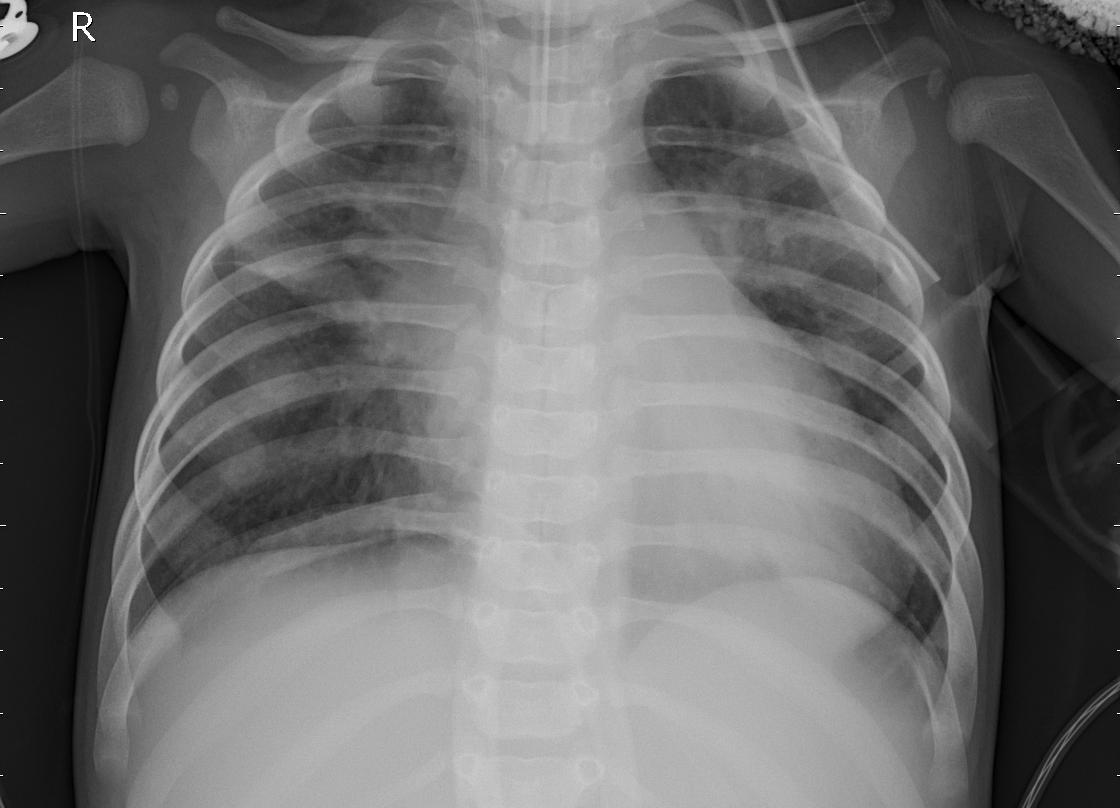

In [41]:
from PIL import Image
Image.open('person147_bacteria_706.jpeg')

In [50]:
im = Image.open("NORMAL2-IM-0246-0001-0001.jpeg")

print (im.size)

(1168, 824)
